In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [26]:
import imgaug as ia
import imgaug.augmenters as iaa
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [27]:
df = pd.read_pickle('LSWMD.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


In [28]:
df.head()

waferMap  dieSize lotName  \
0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0    lot1   
1  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0    lot1   
2  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0    lot1   
3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0    lot1   
4  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0    lot1   

   waferIndex trianTestLabel failureType  
0         1.0   [[Training]]    [[none]]  
1         2.0   [[Training]]    [[none]]  
2         3.0   [[Training]]    [[none]]  
3         4.0   [[Training]]    [[none]]  
4         5.0   [[Training]]    [[none]]

In [29]:
df.tail()

waferMap  dieSize   lotName  \
811452  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...    600.0  lot47542   
811453  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...    600.0  lot47542   
811454  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...    600.0  lot47542   
811455  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...    600.0  lot47543   
811456  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...    600.0  lot47543   

        waferIndex trianTestLabel    failureType  
811452        23.0       [[Test]]  [[Edge-Ring]]  
811453        24.0       [[Test]]   [[Edge-Loc]]  
811454        25.0       [[Test]]  [[Edge-Ring]]  
811455         1.0             []             []  
811456         2.0             []             []

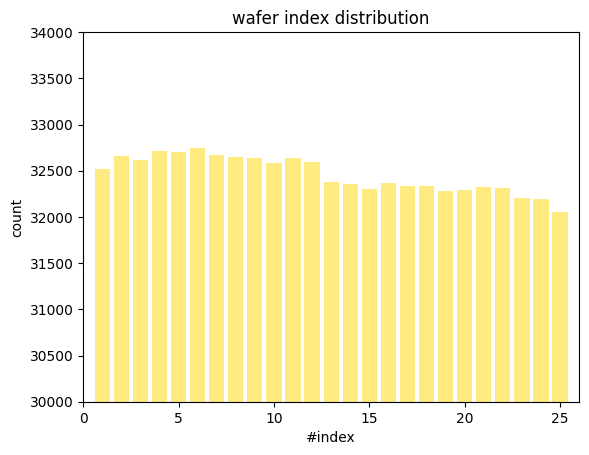

In [30]:
unique_index = np.unique(df.waferIndex, return_counts=True)
plt.bar(unique_index[0], unique_index[1], color='gold', align='center', alpha=0.5)
plt.title('wafer index distribution')
plt.xlabel('#index')
plt.ylabel('count')
plt.xlim(0, 26)
plt.ylim(30000, 34000)
plt.show()

In [31]:
def find_dim(x):
    dim0 = np.size(x, axis=0)
    dim1 = np.size(x, axis=1)
    return (dim0, dim1)

df['waferMapDim'] = df.waferMap.apply(find_dim)
df.sample(5)

waferMap  dieSize   lotName  \
332197  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   2489.0  lot20048   
383112  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   2393.0  lot22922   
199880  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   3036.0  lot12756   
562344  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,...    710.0  lot35344   
432708  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2,...    566.0  lot26190   

        waferIndex trianTestLabel    failureType waferMapDim  
332197         2.0             []             []    (59, 54)  
383112         8.0             []             []    (52, 59)  
199880        20.0   [[Training]]  [[Edge-Ring]]    (63, 62)  
562344        12.0             []             []    (32, 29)  
432708        14.0             []             []    (26, 28)

In [32]:
max(df['waferMapDim']), min(df['waferMapDim'])

((300, 202), (6, 21))

In [33]:
unique_waferDim = np.unique(df['waferMapDim'])
unique_waferDim.shape

(632,)

In [34]:
df['failureNum']=df.failureType
df['trainTestNum']=df.trianTestLabel

mapping_type={
    'Center':0,
    'Donut':1,
    'Edge-Loc':2,
    'Edge-Ring':3,
    'Loc':4,
    'Random':5,
    'Scratch':6,
    'Near-full':7,
    'none':8}
mapping_traintest={'Training':0,'Test':1}
df=df.replace({'failureNum':mapping_type, 'trainTestNum':mapping_traintest})

C:\Users\sdg02\anaconda3\envs\tensorflow2\Lib\site-packages\pandas\core\array_algos\replace.py:86: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  op = lambda x: operator.eq(x, b)


In [35]:
df_label = df[(df['failureNum']>=0) & (df['failureNum']<=8)]
df_label = df_label.reset_index()
df_pattern = df[(df['failureNum']>=0) & (df['failureNum']<=7)]
df_pattern = df_pattern.reset_index()
df_none = df[(df['failureNum']==8)]

# (총 데이터 수, 불량 데이터 수, 정상데이터 수)
df_label.shape[0], df_pattern.shape[0], df_none.shape[0]

(172950, 25519, 147431)

In [36]:
tol_wafers = df.shape[0]
tol_wafers

811457

C:\Users\sdg02\AppData\Local\Temp\ipykernel_21680\483028456.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels2)


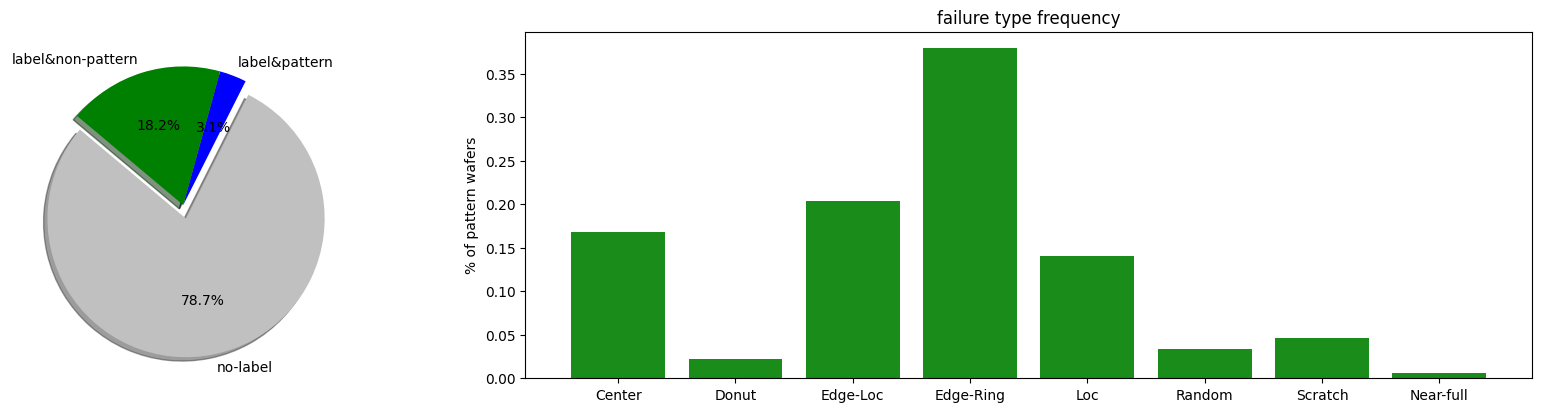

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import gridspec
fig = plt.figure(figsize=(20, 4.5)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2.5]) 
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

no_wafers=[tol_wafers-df_label.shape[0], df_pattern.shape[0], df_none.shape[0]]

colors = ['silver', 'blue', 'green']
explode = (0.1, 0, 0)  # explode 1st slice
labels = ['no-label','label&pattern','label&non-pattern']
ax1.pie(no_wafers, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

uni_pattern=np.unique(df_pattern.failureNum, return_counts=True)
labels2 = ['','Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full' , 'None']
ax2.bar(uni_pattern[0],uni_pattern[1]/df_pattern.shape[0], color='green', align='center', alpha=0.9)
ax2.set_title("failure type frequency")
ax2.set_ylabel("% of pattern wafers")
ax2.set_xticklabels(labels2)

plt.show()

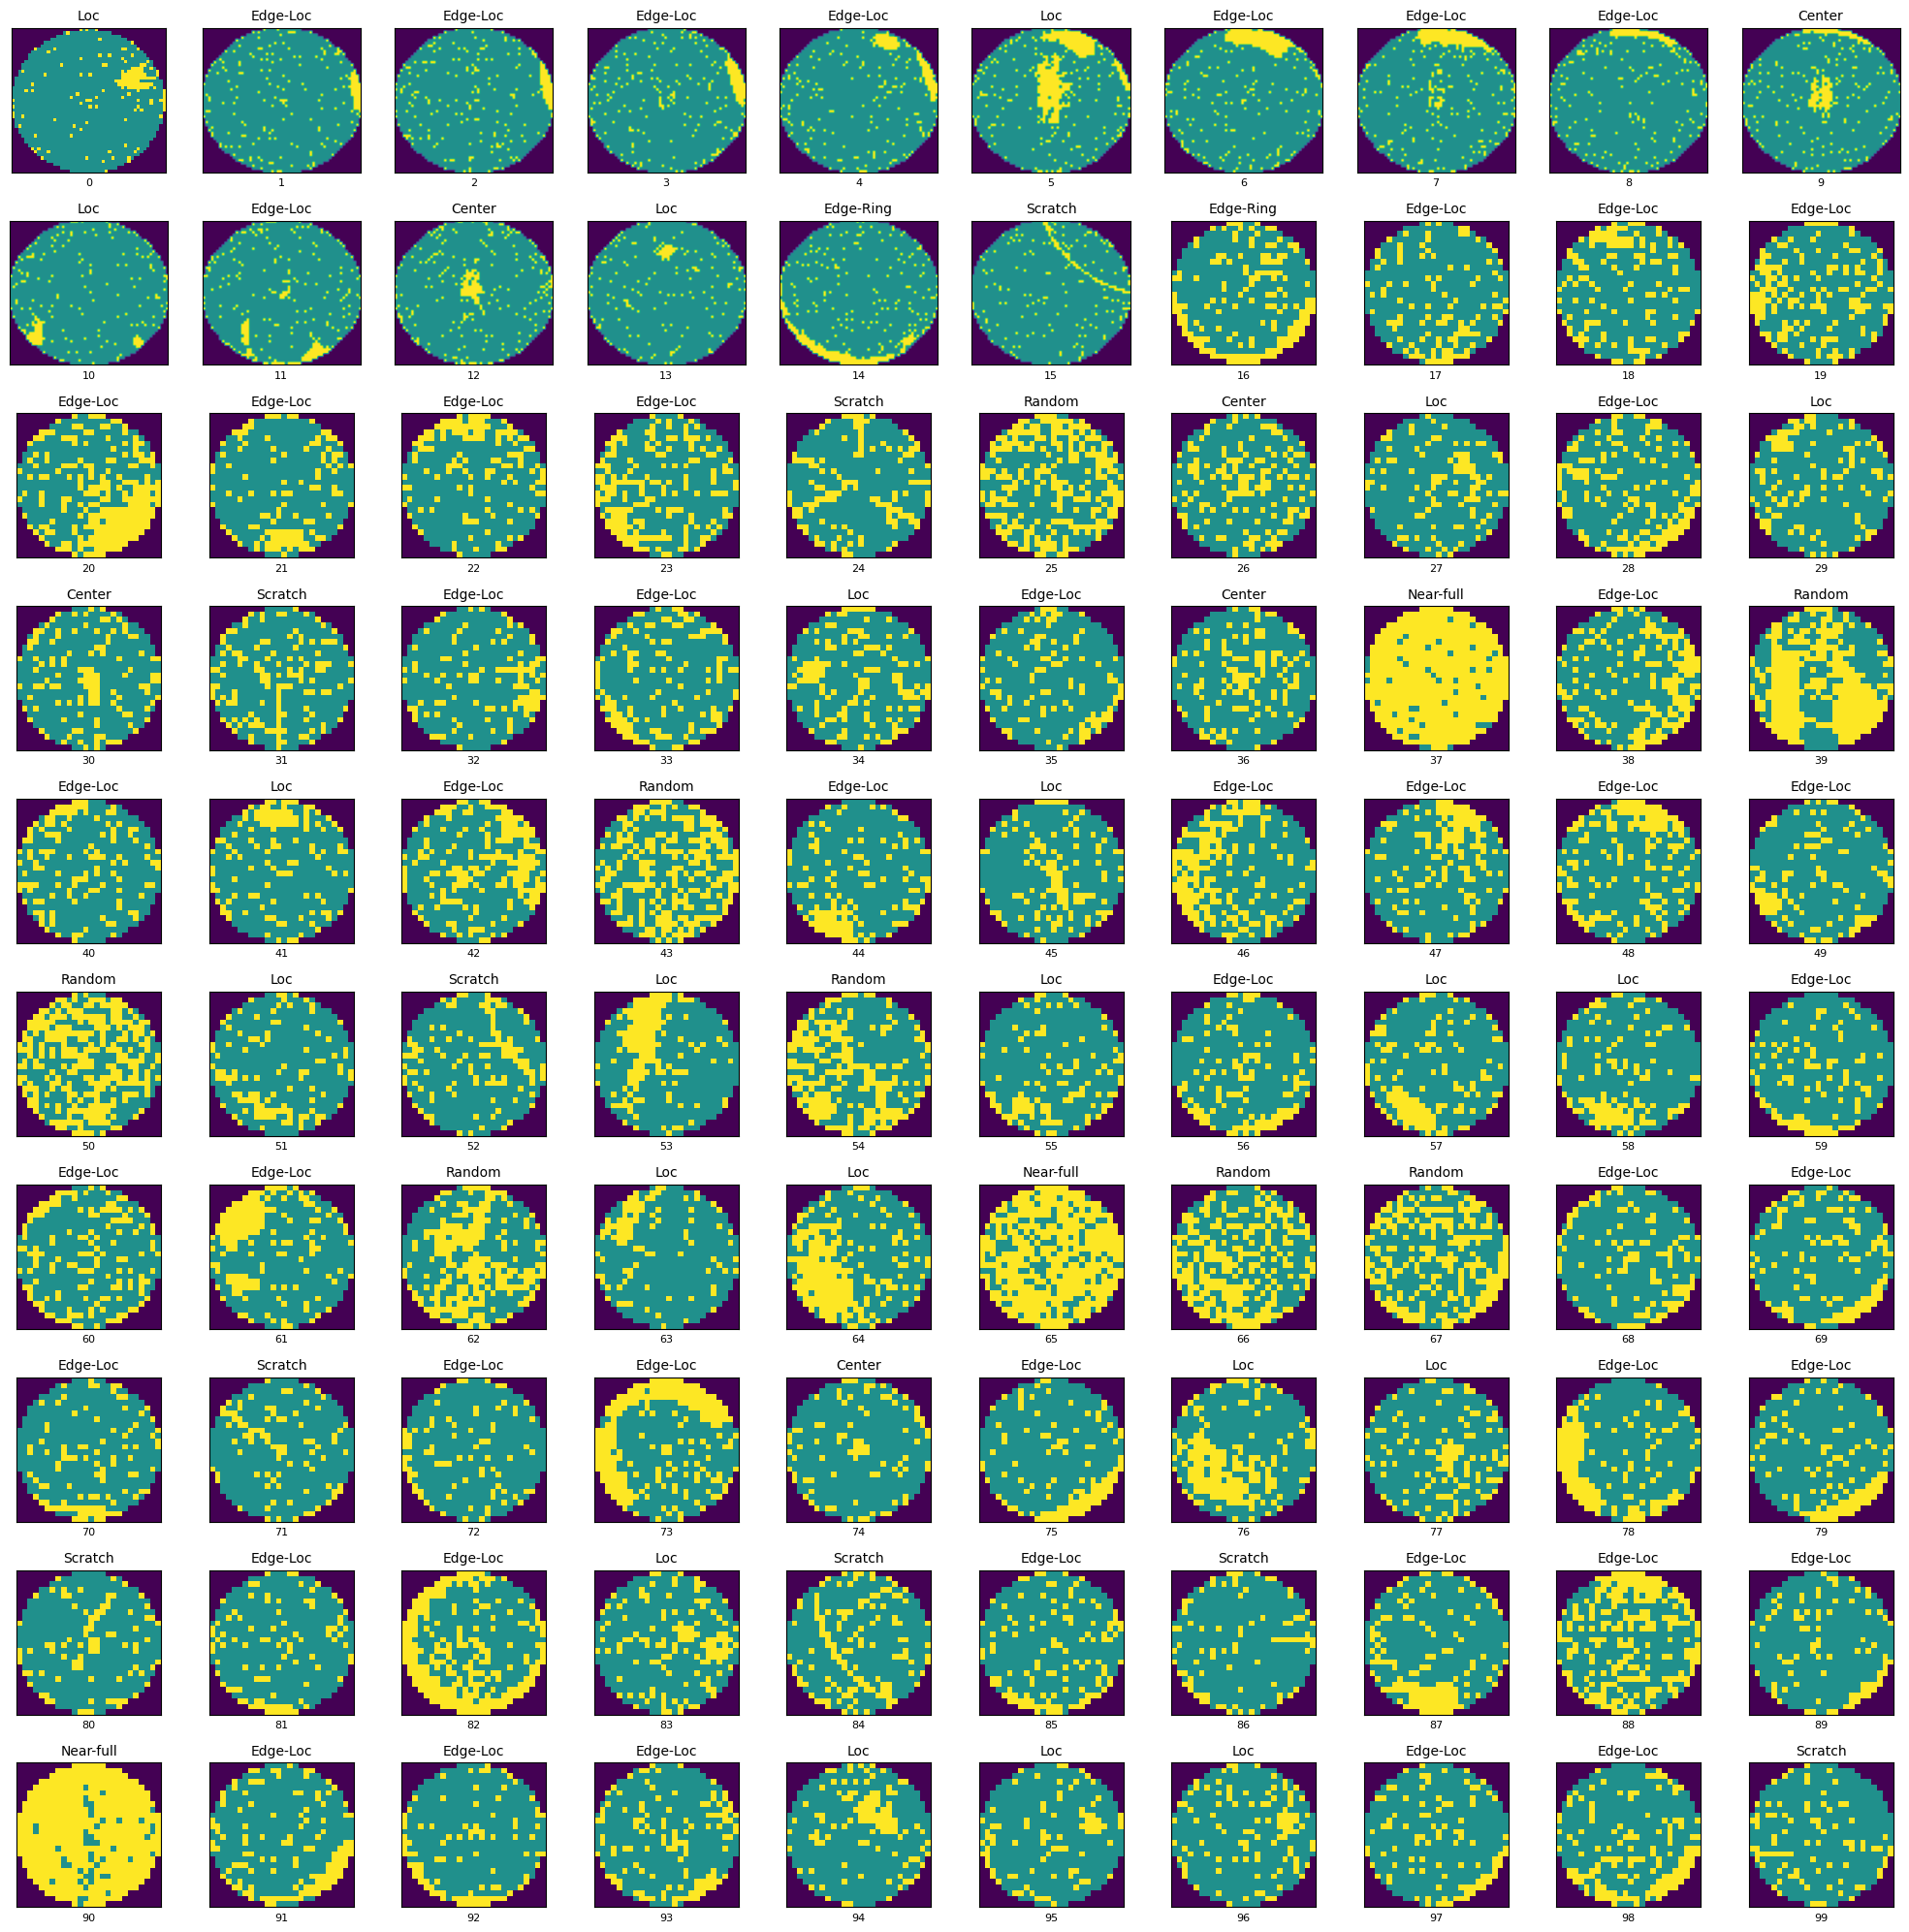

In [37]:
fig, ax = plt.subplots(nrows = 10, ncols = 10, figsize=(20, 20))
ax = ax.ravel(order='C')
for i in range(100):
    img = df_pattern.waferMap[i]
    ax[i].imshow(img)
    ax[i].set_title(df_pattern.failureType[i][0][0], fontsize=10)
    ax[i].set_xlabel(df_pattern.index[i], fontsize=8)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.tight_layout()
plt.show() 

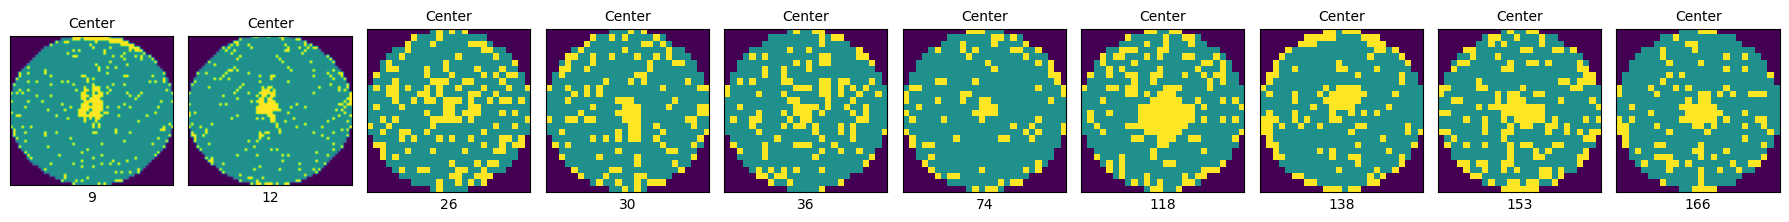

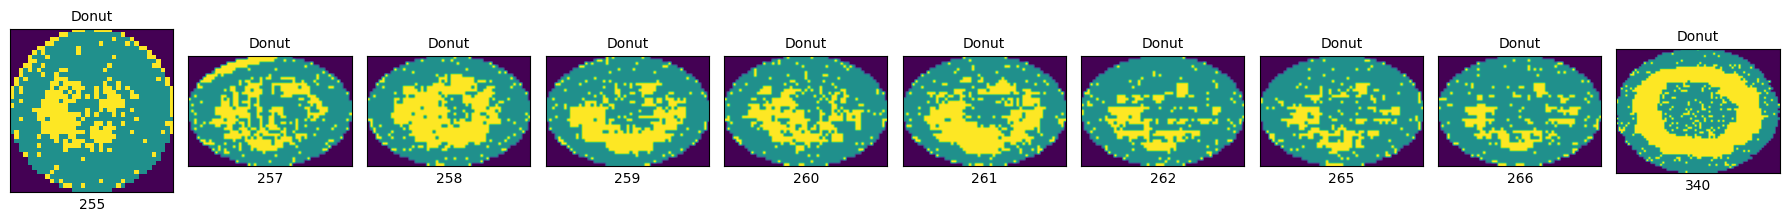

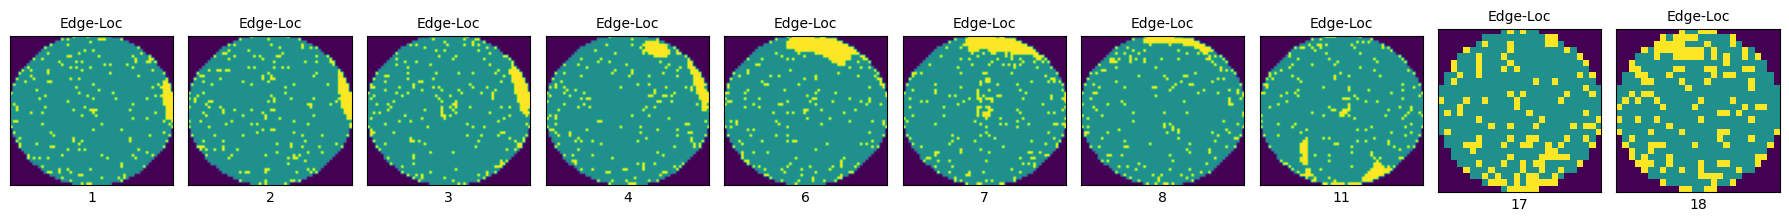

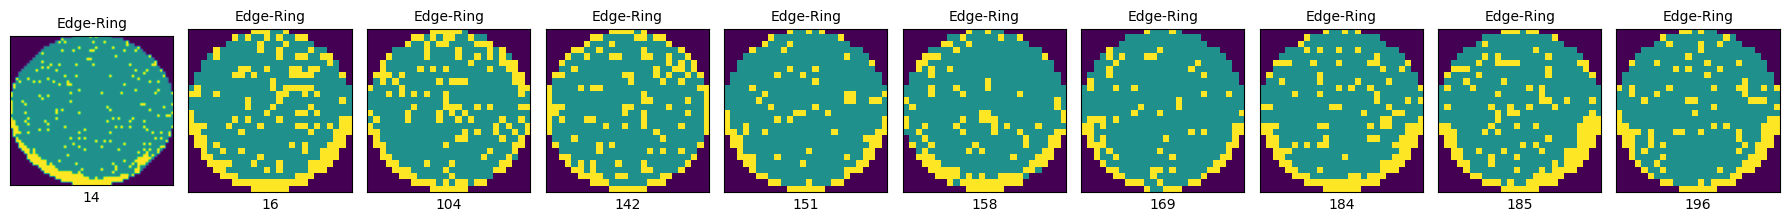

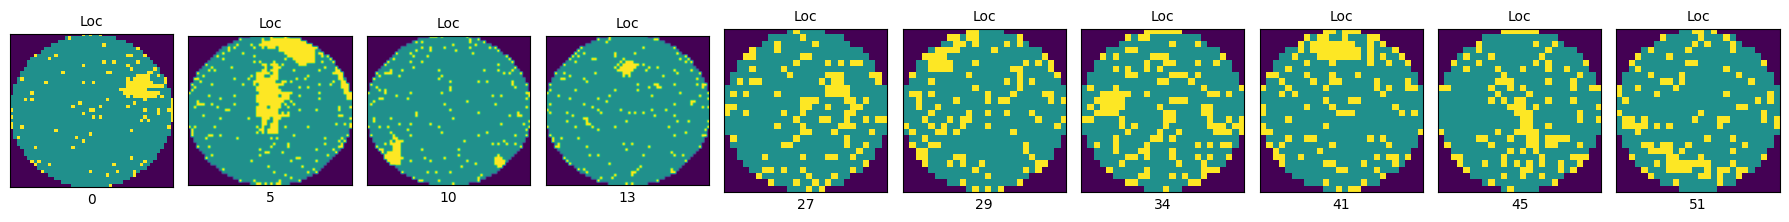

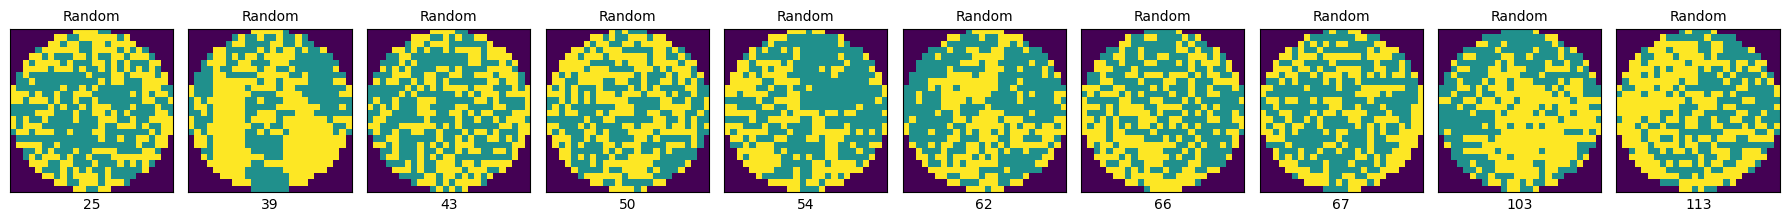

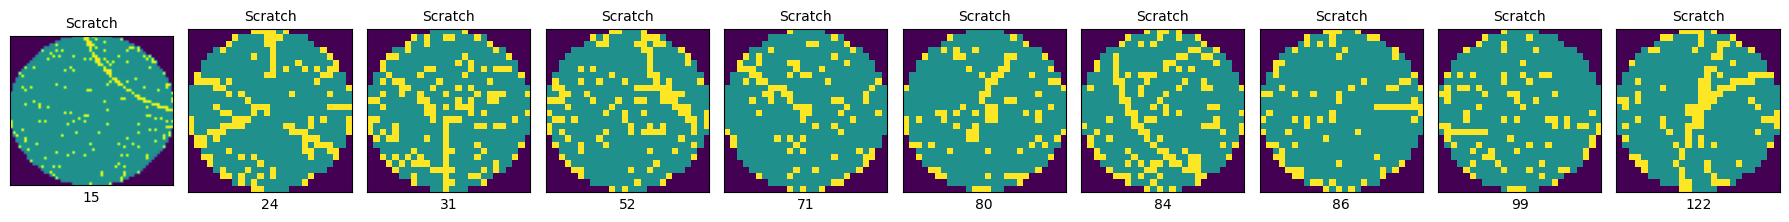

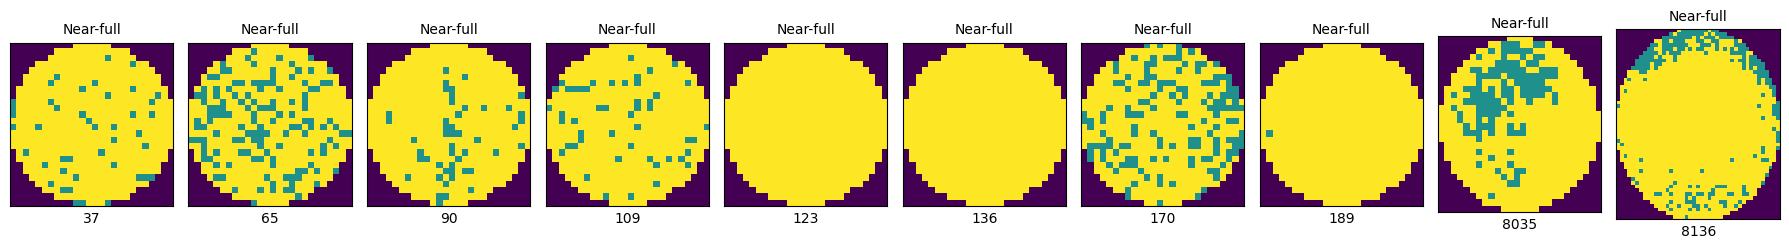

IndexError: index 0 is out of bounds for axis 0 with size 0

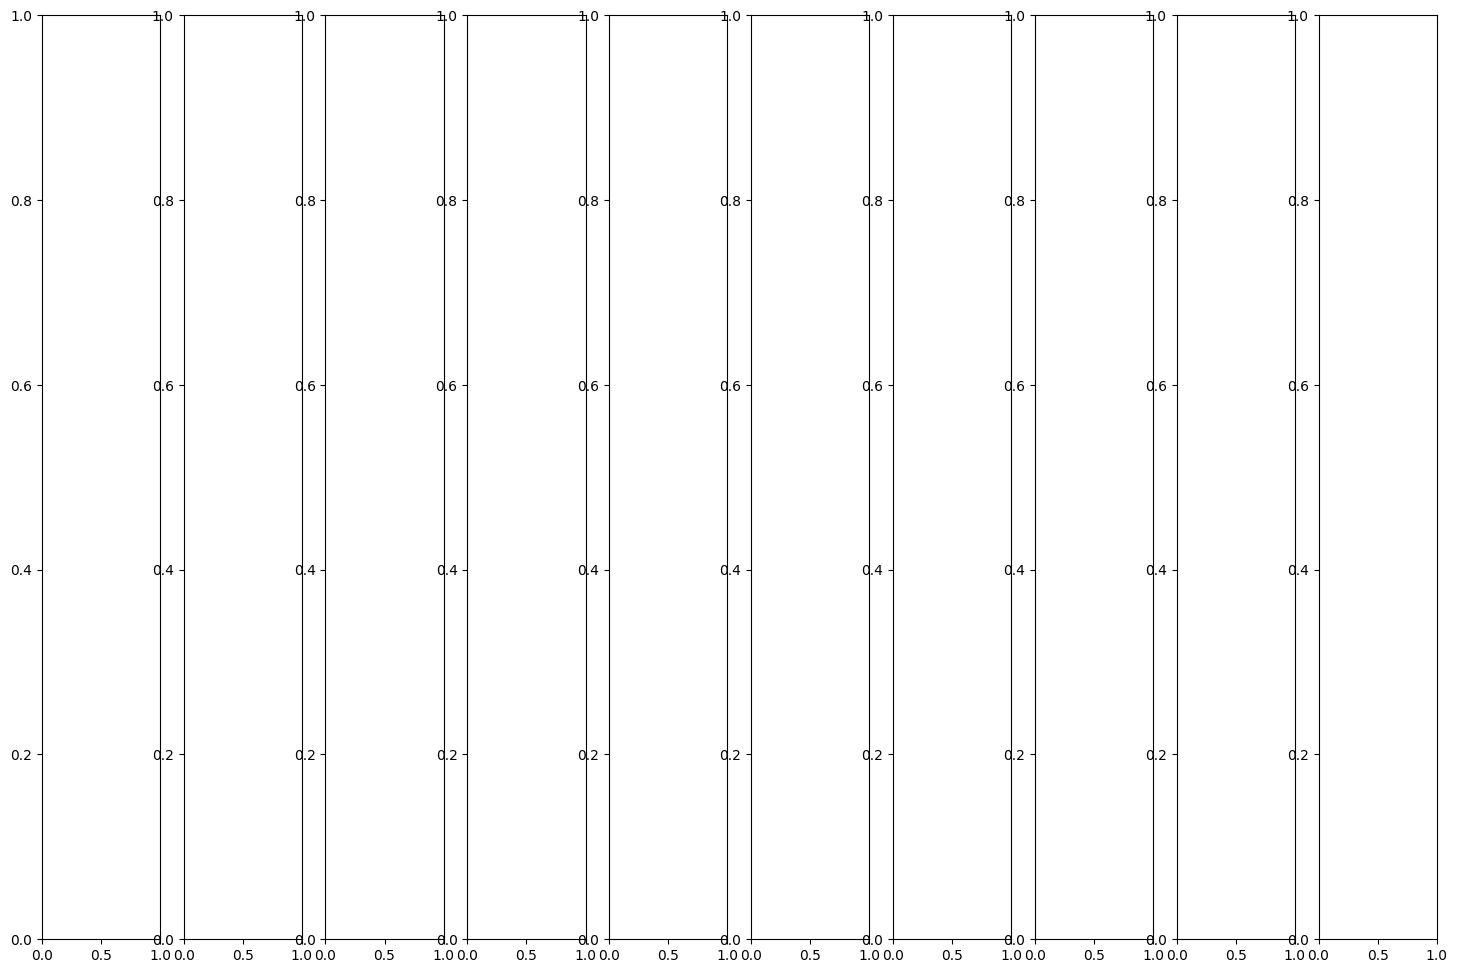

In [42]:
x = [0,1,2,3,4,5,6,7]
labels2 = ['Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full','none']

for k in x:
    fig, ax = plt.subplots(nrows = 1, ncols = 10, figsize=(18, 12))
    ax = ax.ravel(order='C')
    for j in [k]:
        img = df_pattern.waferMap[df_pattern.failureType==labels2[j]]
        for i in range(10):
            ax[i].imshow(img[img.index[i]])
            ax[i].set_title(df_pattern.failureType[img.index[i]][0][0], fontsize=10)
            ax[i].set_xlabel(df_pattern.index[img.index[i]], fontsize=10)
            ax[i].set_xticks([])
            ax[i].set_yticks([])
    plt.tight_layout()
    plt.show() 
    
fig, ax = plt.subplots(nrows = 1, ncols = 10, figsize=(18, 12))
ax = ax.ravel(order='C')
img = df_pattern.waferMap[df_pattern.failureType=='none']
for i in range(10):
    ax[i].imshow(img[img.index[i]])
    ax[i].set_title(df_pattern.failureType[img.index[i]][0][0], fontsize=10)
    ax[i].set_xlabel(df_pattern.index[img.index[i]], fontsize=10)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.tight_layout()
plt.show() 

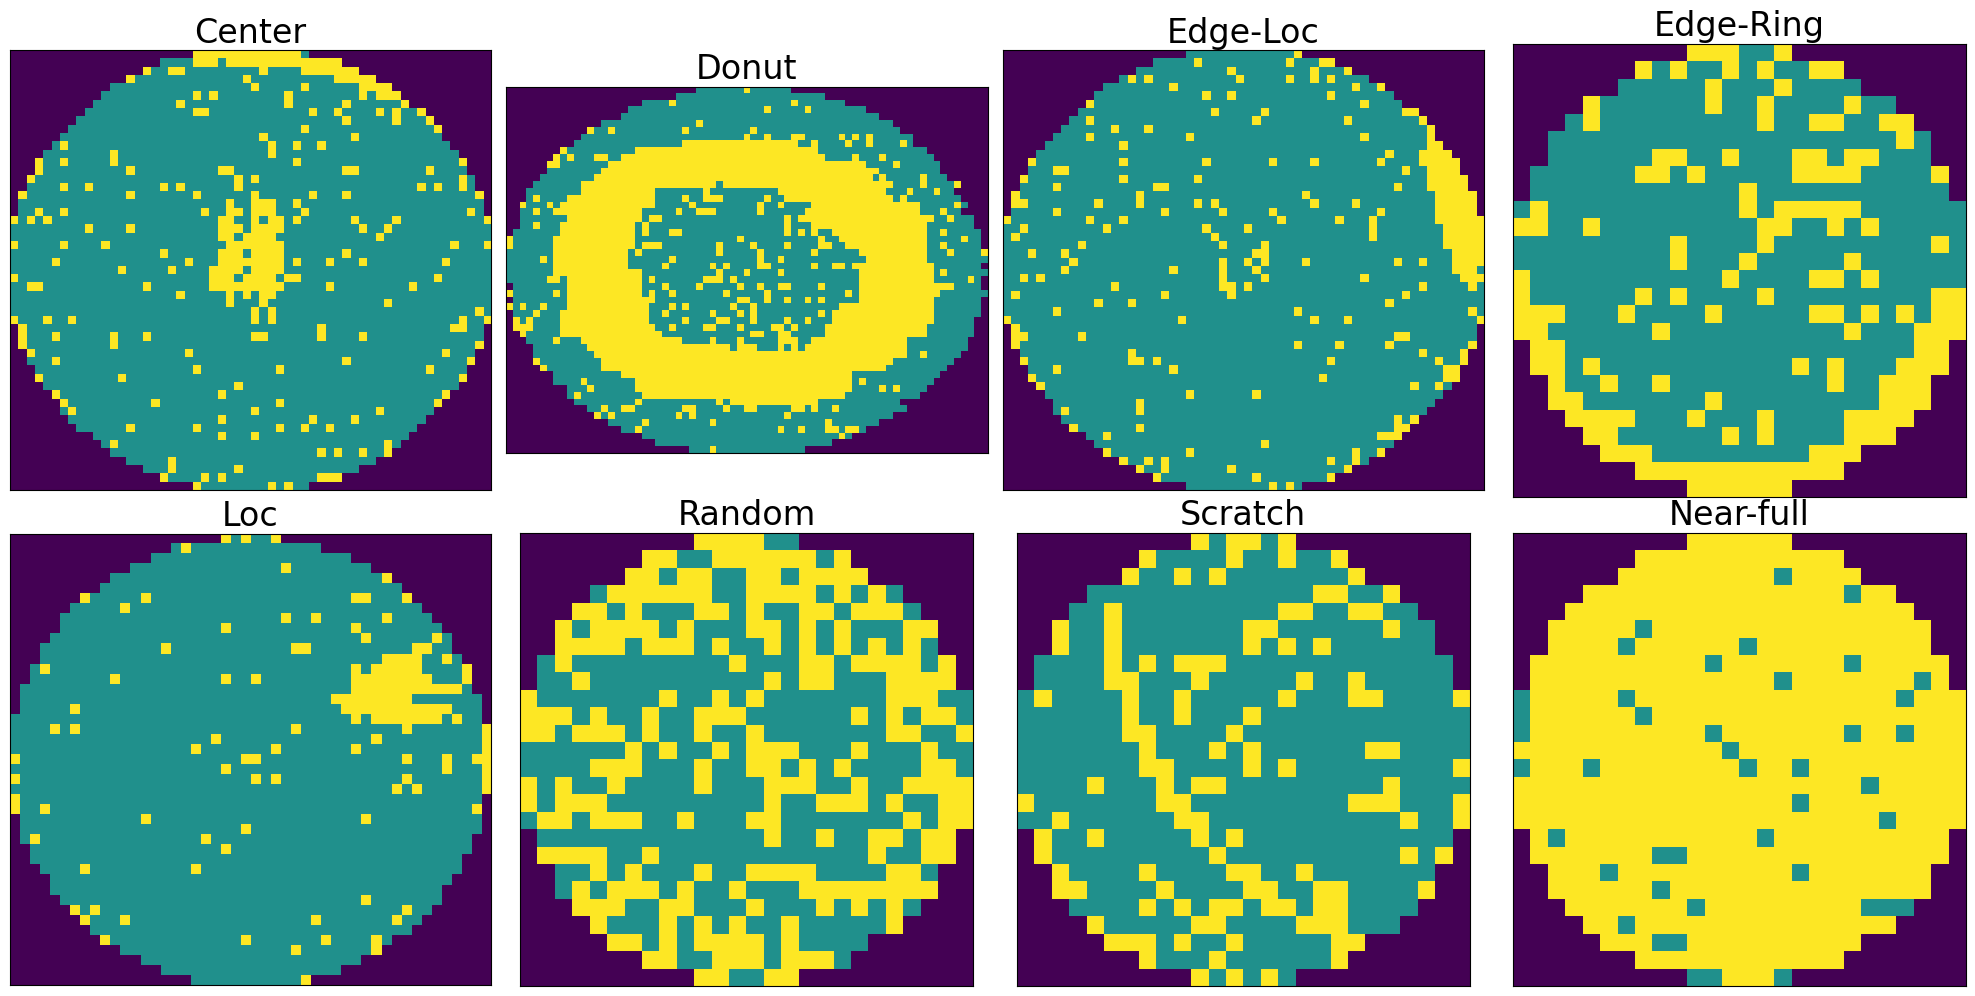

In [39]:
x = [9,340, 3, 16, 0, 25, 84, 37, 0]
labels2 = ['Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full','none']

#ind_def = {'Center': 9, 'Donut': 340, 'Edge-Loc': 3, 'Edge-Ring': 16, 'Loc': 0, 'Random': 25,  'Scratch': 84, 'Near-full': 37}
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize=(20, 10))
ax = ax.ravel(order='C')
for i in range(8):
    img = df_pattern.waferMap[x[i]]
    ax[i].imshow(img)
    ax[i].set_title(df_pattern.failureType[x[i]][0][0],fontsize=24)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.tight_layout()
plt.show() 

In [43]:
del df
del df_pattern
del df_none

In [44]:
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, MaxPool2D
from tensorflow.keras.layers import Flatten, Softmax, SpatialDropout2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [53]:
model = Sequential([
    # Input
    Input(shape=(224, 224, 3)),
    
    # block 1
    Conv2D(filters=16, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),

    # block 2
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),

    # block 3
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),

    # block 4
    Conv2D(filters=128, kernel_size=(2,2), activation='relu', padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=128, kernel_size=(2,2), activation='relu', padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),
    
    # block 5
    SpatialDropout2D(rate=0.2),
    MaxPool2D(pool_size=(2,2)),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dense(9, activation='softmax')
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 batch_normalization_8 (Batc  (None, 222, 222, 16)     64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 111, 111, 16)      2320      
                                                                 
 batch_normalization_9 (Batc  (None, 111, 111, 16)     64        
 hNormalization)                                                 
                                                      

In [54]:
import cv2

def reshape_images(images, height, width):
    reshaped_images = np.zeros((len(images), height, width, 3))
    for n in range(len(images)):
        for h in range(height):
            for w in range(width):
                reshaped_images[n, h, w, images[n][h][w]] = 1
    return reshaped_images

def augment_images(images, number=10000):
    seq = iaa.Sequential([
        iaa.Fliplr(0.5),
        iaa.Affine(
            scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
            translate_percent={"x": (-0.05, 0.05), "y": (-0.05, 0.05)},
            rotate=(-180, 180),
            shear=(-8, 8)
        ),
    ], random_order=True)
    
    images_input = np.random.choice(images, number) if number else images
    images_expanded = []
    for image in images_input:
        images_expanded.append(image)
    images_expanded = np.array(images_expanded)
    images_augmented = seq(images=images_expanded)
    return images_augmented

In [55]:
import gc
gc.collect()

2823

In [44]:
class_num = 9
dsize = (224, 224)
count_per_class_test = 20
count_per_class = 80

x_test, y_test = [], []
for failureNum in range(class_num):
    extracted = df_label[df_label['failureNum'] == failureNum].sample(count_per_class_test, replace=True).waferMap
    resized = extracted.apply(lambda x:cv2.resize(x, dsize=dsize, interpolation=cv2.INTER_AREA))
    del extracted
    augmented = np.array(augment_images(resized))
    reshaped = reshape_images(augmented, dsize[1], dsize[0])
    del augmented

    labels = np.zeros((count_per_class_test, class_num))
    for i in range(count_per_class_test):
        labels[i][failureNum] = 1
        
    x_test.extend(reshaped)
    y_test.extend(labels)
x_test = np.array(x_test)
y_test = np.array(y_test)

histories = []
for j in range(100):
    x_train, y_train = [], []
    for failureNum in range(class_num):
        extracted = df_label[df_label['failureNum'] == failureNum].sample(count_per_class, replace=True).waferMap
        resized = extracted.apply(lambda x:cv2.resize(x, dsize=dsize, interpolation=cv2.INTER_AREA))
        del extracted
        augmented = np.array(augment_images(resized))
        reshaped = reshape_images(augmented, dsize[1], dsize[0])
        del augmented

        labels = np.zeros((count_per_class, class_num))
        for i in range(count_per_class):
            labels[i][failureNum] = 1

        x_train.extend(reshaped)
        y_train.extend(labels)
#     x_train, x_test, y_train, y_test = train_test_split(np.array(x), np.array(y), test_size=0.3)
    
    history = model.fit(np.array(x_train), np.array(y_train), validation_data=(x_test, y_test), epochs=20, batch_size=100)
    histories.append(history)

Epoch 1/20
8/8 [==============================] - 16s 2s/step - loss: 8.3169 - accuracy: 0.2667 - val_loss: 12.0287 - val_accuracy: 0.2000
Epoch 2/20
8/8 [==============================] - 13s 2s/step - loss: 2.3340 - accuracy: 0.4681 - val_loss: 2.1687 - val_accuracy: 0.2111
Epoch 3/20
8/8 [==============================] - 13s 2s/step - loss: 1.4909 - accuracy: 0.5194 - val_loss: 2.3607 - val_accuracy: 0.2778
Epoch 4/20
8/8 [==============================] - 13s 2s/step - loss: 1.0605 - accuracy: 0.6250 - val_loss: 1.7789 - val_accuracy: 0.3056
Epoch 5/20
8/8 [==============================] - 12s 2s/step - loss: 0.8021 - accuracy: 0.7208 - val_loss: 1.6585 - val_accuracy: 0.3556
Epoch 6/20
8/8 [==============================] - 13s 2s/step - loss: 0.5622 - accuracy: 0.7986 - val_loss: 1.4672 - val_accuracy: 0.4333
Epoch 7/20
8/8 [==============================] - 13s 2s/step - loss: 0.4190 - accuracy: 0.8667 - val_loss: 1.3620 - val_accuracy: 0.4833
Epoch 8/20
8/8 [=================

8/8 [==============================] - 13s 2s/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.1123 - val_accuracy: 0.7278
Epoch 20/20
8/8 [==============================] - 12s 2s/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.0965 - val_accuracy: 0.7444
Epoch 1/20
8/8 [==============================] - 13s 2s/step - loss: 0.9180 - accuracy: 0.7569 - val_loss: 1.2157 - val_accuracy: 0.6389
Epoch 2/20
8/8 [==============================] - 13s 2s/step - loss: 0.5003 - accuracy: 0.8347 - val_loss: 1.4876 - val_accuracy: 0.6444
Epoch 3/20
8/8 [==============================] - 13s 2s/step - loss: 0.2038 - accuracy: 0.9431 - val_loss: 1.4860 - val_accuracy: 0.6667
Epoch 4/20
8/8 [==============================] - 13s 2s/step - loss: 0.1243 - accuracy: 0.9653 - val_loss: 1.4897 - val_accuracy: 0.6444
Epoch 5/20
8/8 [==============================] - 13s 2s/step - loss: 0.1061 - accuracy: 0.9778 - val_loss: 1.3198 - val_accuracy: 0.7111
Epoch 6/20
8/8 [============================

8/8 [==============================] - 13s 2s/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.9814 - val_accuracy: 0.7667
Epoch 18/20
8/8 [==============================] - 13s 2s/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 1.0378 - val_accuracy: 0.7611
Epoch 19/20
8/8 [==============================] - 13s 2s/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.0367 - val_accuracy: 0.7722
Epoch 20/20
8/8 [==============================] - 13s 2s/step - loss: 0.0030 - accuracy: 0.9986 - val_loss: 1.0113 - val_accuracy: 0.7667
Epoch 1/20
8/8 [==============================] - 13s 2s/step - loss: 0.9774 - accuracy: 0.7681 - val_loss: 0.9579 - val_accuracy: 0.7611
Epoch 2/20
8/8 [==============================] - 12s 2s/step - loss: 0.3634 - accuracy: 0.8917 - val_loss: 0.8021 - val_accuracy: 0.7611
Epoch 3/20
8/8 [==============================] - 13s 2s/step - loss: 0.1979 - accuracy: 0.9333 - val_loss: 0.8267 - val_accuracy: 0.7833
Epoch 4/20
8/8 [==========================

8/8 [==============================] - 13s 2s/step - loss: 0.0076 - accuracy: 0.9986 - val_loss: 0.9501 - val_accuracy: 0.8000
Epoch 16/20
8/8 [==============================] - 13s 2s/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.9050 - val_accuracy: 0.7944
Epoch 17/20
8/8 [==============================] - 13s 2s/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.8976 - val_accuracy: 0.8056
Epoch 18/20
8/8 [==============================] - 13s 2s/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.8969 - val_accuracy: 0.8056
Epoch 19/20
8/8 [==============================] - 13s 2s/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.8869 - val_accuracy: 0.8000
Epoch 20/20
8/8 [==============================] - 13s 2s/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.8719 - val_accuracy: 0.8111
Epoch 1/20
8/8 [==============================] - 13s 2s/step - loss: 0.7490 - accuracy: 0.8069 - val_loss: 0.8301 - val_accuracy: 0.7944
Epoch 2/20
8/8 [========================

8/8 [==============================] - 14s 2s/step - loss: 0.0112 - accuracy: 0.9944 - val_loss: 0.9235 - val_accuracy: 0.7889
Epoch 14/20
8/8 [==============================] - 13s 2s/step - loss: 0.0090 - accuracy: 0.9958 - val_loss: 0.9562 - val_accuracy: 0.7833
Epoch 15/20
8/8 [==============================] - 13s 2s/step - loss: 0.0111 - accuracy: 0.9972 - val_loss: 1.1832 - val_accuracy: 0.7833
Epoch 16/20
8/8 [==============================] - 13s 2s/step - loss: 0.0067 - accuracy: 0.9986 - val_loss: 1.2013 - val_accuracy: 0.7667
Epoch 17/20
8/8 [==============================] - 13s 2s/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 1.0490 - val_accuracy: 0.7722
Epoch 18/20
8/8 [==============================] - 13s 2s/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.9572 - val_accuracy: 0.7944
Epoch 19/20
8/8 [==============================] - 13s 2s/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.9304 - val_accuracy: 0.8167
Epoch 20/20
8/8 [======================

8/8 [==============================] - 34s 4s/step - loss: 0.0037 - accuracy: 0.9986 - val_loss: 1.0361 - val_accuracy: 0.7833
Epoch 12/20
8/8 [==============================] - 35s 4s/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 1.0796 - val_accuracy: 0.7889
Epoch 13/20
8/8 [==============================] - 35s 4s/step - loss: 0.0127 - accuracy: 0.9986 - val_loss: 0.7179 - val_accuracy: 0.8167
Epoch 14/20
8/8 [==============================] - 35s 4s/step - loss: 0.0047 - accuracy: 0.9986 - val_loss: 0.6206 - val_accuracy: 0.8556
Epoch 15/20
8/8 [==============================] - 35s 4s/step - loss: 0.0052 - accuracy: 0.9986 - val_loss: 0.6242 - val_accuracy: 0.8500
Epoch 16/20
8/8 [==============================] - 34s 4s/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.6370 - val_accuracy: 0.8333
Epoch 17/20
8/8 [==============================] - 35s 4s/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.6229 - val_accuracy: 0.8556
Epoch 18/20
8/8 [======================

8/8 [==============================] - 15s 2s/step - loss: 0.0437 - accuracy: 0.9958 - val_loss: 0.7135 - val_accuracy: 0.8333
Epoch 10/20
8/8 [==============================] - 15s 2s/step - loss: 0.0054 - accuracy: 0.9986 - val_loss: 0.8621 - val_accuracy: 0.8222
Epoch 11/20
8/8 [==============================] - 15s 2s/step - loss: 0.0158 - accuracy: 0.9931 - val_loss: 0.8916 - val_accuracy: 0.8000
Epoch 12/20
8/8 [==============================] - 15s 2s/step - loss: 0.0119 - accuracy: 0.9972 - val_loss: 0.8849 - val_accuracy: 0.8056
Epoch 13/20
8/8 [==============================] - 15s 2s/step - loss: 0.0047 - accuracy: 0.9986 - val_loss: 0.8707 - val_accuracy: 0.7889
Epoch 14/20
8/8 [==============================] - 15s 2s/step - loss: 0.0165 - accuracy: 0.9986 - val_loss: 0.8451 - val_accuracy: 0.8111
Epoch 15/20
8/8 [==============================] - 15s 2s/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.8255 - val_accuracy: 0.8056
Epoch 16/20
8/8 [======================

8/8 [==============================] - 16s 2s/step - loss: 0.0118 - accuracy: 0.9986 - val_loss: 0.8003 - val_accuracy: 0.8611
Epoch 8/20
8/8 [==============================] - 15s 2s/step - loss: 0.0248 - accuracy: 0.9958 - val_loss: 0.7372 - val_accuracy: 0.8611
Epoch 9/20
8/8 [==============================] - 15s 2s/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.7396 - val_accuracy: 0.8611
Epoch 10/20
8/8 [==============================] - 15s 2s/step - loss: 0.0059 - accuracy: 0.9986 - val_loss: 0.7567 - val_accuracy: 0.8778
Epoch 11/20
8/8 [==============================] - 15s 2s/step - loss: 0.0062 - accuracy: 0.9986 - val_loss: 0.7848 - val_accuracy: 0.8778
Epoch 12/20
8/8 [==============================] - 15s 2s/step - loss: 0.0067 - accuracy: 0.9972 - val_loss: 0.7995 - val_accuracy: 0.8722
Epoch 13/20
8/8 [==============================] - 15s 2s/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.7705 - val_accuracy: 0.8722
Epoch 14/20
8/8 [========================

8/8 [==============================] - 15s 2s/step - loss: 0.0420 - accuracy: 0.9847 - val_loss: 0.9008 - val_accuracy: 0.8333
Epoch 6/20
8/8 [==============================] - 15s 2s/step - loss: 0.0306 - accuracy: 0.9958 - val_loss: 0.8850 - val_accuracy: 0.8556
Epoch 7/20
8/8 [==============================] - 15s 2s/step - loss: 0.0189 - accuracy: 0.9972 - val_loss: 0.8191 - val_accuracy: 0.8500
Epoch 8/20
8/8 [==============================] - 15s 2s/step - loss: 0.0108 - accuracy: 0.9986 - val_loss: 0.8416 - val_accuracy: 0.8389
Epoch 9/20
8/8 [==============================] - 15s 2s/step - loss: 0.0098 - accuracy: 0.9986 - val_loss: 0.8680 - val_accuracy: 0.8556
Epoch 10/20
8/8 [==============================] - 16s 2s/step - loss: 0.0202 - accuracy: 0.9944 - val_loss: 0.8271 - val_accuracy: 0.8611
Epoch 11/20
8/8 [==============================] - 16s 2s/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.7807 - val_accuracy: 0.8611
Epoch 12/20
8/8 [==========================

8/8 [==============================] - 15s 2s/step - loss: 0.1324 - accuracy: 0.9500 - val_loss: 0.9221 - val_accuracy: 0.8056
Epoch 4/20
8/8 [==============================] - 15s 2s/step - loss: 0.0912 - accuracy: 0.9611 - val_loss: 0.6208 - val_accuracy: 0.8278
Epoch 5/20
8/8 [==============================] - 15s 2s/step - loss: 0.0559 - accuracy: 0.9875 - val_loss: 0.5724 - val_accuracy: 0.8500
Epoch 6/20
8/8 [==============================] - 16s 2s/step - loss: 0.0189 - accuracy: 0.9944 - val_loss: 0.5974 - val_accuracy: 0.8389
Epoch 7/20
8/8 [==============================] - 16s 2s/step - loss: 0.0328 - accuracy: 0.9903 - val_loss: 0.6340 - val_accuracy: 0.8278
Epoch 8/20
8/8 [==============================] - 15s 2s/step - loss: 0.0144 - accuracy: 0.9972 - val_loss: 0.6570 - val_accuracy: 0.8389
Epoch 9/20
8/8 [==============================] - 15s 2s/step - loss: 0.0131 - accuracy: 0.9958 - val_loss: 0.6923 - val_accuracy: 0.8389
Epoch 10/20
8/8 [============================

8/8 [==============================] - 15s 2s/step - loss: 0.5524 - accuracy: 0.8694 - val_loss: 0.8394 - val_accuracy: 0.8833
Epoch 2/20
8/8 [==============================] - 15s 2s/step - loss: 0.1586 - accuracy: 0.9556 - val_loss: 0.7382 - val_accuracy: 0.8833
Epoch 3/20
8/8 [==============================] - 15s 2s/step - loss: 0.0914 - accuracy: 0.9667 - val_loss: 0.9020 - val_accuracy: 0.8556
Epoch 4/20
8/8 [==============================] - 16s 2s/step - loss: 0.0617 - accuracy: 0.9861 - val_loss: 0.9519 - val_accuracy: 0.8556
Epoch 5/20
8/8 [==============================] - 15s 2s/step - loss: 0.0160 - accuracy: 0.9986 - val_loss: 0.9633 - val_accuracy: 0.8500
Epoch 6/20
8/8 [==============================] - 15s 2s/step - loss: 0.0176 - accuracy: 0.9958 - val_loss: 0.9372 - val_accuracy: 0.8444
Epoch 7/20
8/8 [==============================] - 15s 2s/step - loss: 0.0098 - accuracy: 0.9958 - val_loss: 0.8900 - val_accuracy: 0.8722
Epoch 8/20
8/8 [=============================

8/8 [==============================] - 12s 2s/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.8670 - val_accuracy: 0.8444
Epoch 20/20
8/8 [==============================] - 12s 2s/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.9413 - val_accuracy: 0.8500
Epoch 1/20
8/8 [==============================] - 12s 2s/step - loss: 0.5849 - accuracy: 0.8708 - val_loss: 0.6943 - val_accuracy: 0.8667
Epoch 2/20
8/8 [==============================] - 12s 2s/step - loss: 0.2291 - accuracy: 0.9153 - val_loss: 0.8110 - val_accuracy: 0.8167
Epoch 3/20
8/8 [==============================] - 12s 2s/step - loss: 0.1072 - accuracy: 0.9667 - val_loss: 0.8035 - val_accuracy: 0.8611
Epoch 4/20
8/8 [==============================] - 12s 2s/step - loss: 0.0558 - accuracy: 0.9819 - val_loss: 0.7774 - val_accuracy: 0.8722
Epoch 5/20
8/8 [==============================] - 12s 2s/step - loss: 0.0170 - accuracy: 0.9986 - val_loss: 0.7535 - val_accuracy: 0.8722
Epoch 6/20
8/8 [============================

8/8 [==============================] - 13s 2s/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.8059 - val_accuracy: 0.8611
Epoch 18/20
8/8 [==============================] - 13s 2s/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.8240 - val_accuracy: 0.8667
Epoch 19/20
8/8 [==============================] - 13s 2s/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.8439 - val_accuracy: 0.8667
Epoch 20/20
8/8 [==============================] - 13s 2s/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.8517 - val_accuracy: 0.8500
Epoch 1/20
8/8 [==============================] - 13s 2s/step - loss: 0.7883 - accuracy: 0.8417 - val_loss: 1.6768 - val_accuracy: 0.8000
Epoch 2/20
8/8 [==============================] - 13s 2s/step - loss: 0.3342 - accuracy: 0.9167 - val_loss: 1.2075 - val_accuracy: 0.7778
Epoch 3/20
8/8 [==============================] - 13s 2s/step - loss: 0.1550 - accuracy: 0.9486 - val_loss: 0.8118 - val_accuracy: 0.8333
Epoch 4/20
8/8 [==========================

8/8 [==============================] - 13s 2s/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.5677 - val_accuracy: 0.8889
Epoch 16/20
8/8 [==============================] - 13s 2s/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.5671 - val_accuracy: 0.8778
Epoch 17/20
8/8 [==============================] - 12s 2s/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.5661 - val_accuracy: 0.8778
Epoch 18/20
8/8 [==============================] - 12s 2s/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.5634 - val_accuracy: 0.8778
Epoch 19/20
8/8 [==============================] - 13s 2s/step - loss: 0.0047 - accuracy: 0.9986 - val_loss: 0.5625 - val_accuracy: 0.8944
Epoch 20/20
8/8 [==============================] - 12s 2s/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 0.5850 - val_accuracy: 0.8889
Epoch 1/20
8/8 [==============================] - 13s 2s/step - loss: 0.5559 - accuracy: 0.8722 - val_loss: 0.6279 - val_accuracy: 0.8556
Epoch 2/20
8/8 [========================

8/8 [==============================] - 12s 2s/step - loss: 0.0113 - accuracy: 0.9972 - val_loss: 0.4499 - val_accuracy: 0.8889
Epoch 14/20
8/8 [==============================] - 12s 2s/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.4481 - val_accuracy: 0.8889
Epoch 15/20
8/8 [==============================] - 12s 2s/step - loss: 0.0089 - accuracy: 0.9986 - val_loss: 0.4527 - val_accuracy: 0.8944
Epoch 16/20
8/8 [==============================] - 12s 2s/step - loss: 0.0080 - accuracy: 0.9972 - val_loss: 0.4678 - val_accuracy: 0.8889
Epoch 17/20
8/8 [==============================] - 12s 2s/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.5047 - val_accuracy: 0.8889
Epoch 18/20
8/8 [==============================] - 13s 2s/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.5110 - val_accuracy: 0.8889
Epoch 19/20
8/8 [==============================] - 12s 2s/step - loss: 0.0024 - accuracy: 0.9986 - val_loss: 0.4944 - val_accuracy: 0.8833
Epoch 20/20
8/8 [======================

8/8 [==============================] - 12s 2s/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.4927 - val_accuracy: 0.9056
Epoch 12/20
8/8 [==============================] - 13s 2s/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.4742 - val_accuracy: 0.9111
Epoch 13/20
8/8 [==============================] - 13s 2s/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.4614 - val_accuracy: 0.9167
Epoch 14/20
8/8 [==============================] - 13s 2s/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.4426 - val_accuracy: 0.9111
Epoch 15/20
8/8 [==============================] - 12s 2s/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.4584 - val_accuracy: 0.9000
Epoch 16/20
8/8 [==============================] - 13s 2s/step - loss: 0.0183 - accuracy: 0.9931 - val_loss: 0.4445 - val_accuracy: 0.8944
Epoch 17/20
8/8 [==============================] - 13s 2s/step - loss: 0.0083 - accuracy: 0.9972 - val_loss: 0.5197 - val_accuracy: 0.9056
Epoch 18/20
8/8 [======================

8/8 [==============================] - 12s 2s/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.5350 - val_accuracy: 0.8778
Epoch 10/20
8/8 [==============================] - 12s 2s/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.5183 - val_accuracy: 0.8778
Epoch 11/20
8/8 [==============================] - 12s 2s/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.5015 - val_accuracy: 0.8889
Epoch 12/20
8/8 [==============================] - 12s 2s/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.5029 - val_accuracy: 0.8778
Epoch 13/20
8/8 [==============================] - 12s 2s/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.5096 - val_accuracy: 0.8833
Epoch 14/20
8/8 [==============================] - 12s 2s/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.5145 - val_accuracy: 0.8889
Epoch 15/20
8/8 [==============================] - 12s 2s/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.5189 - val_accuracy: 0.8833
Epoch 16/20
8/8 [======================

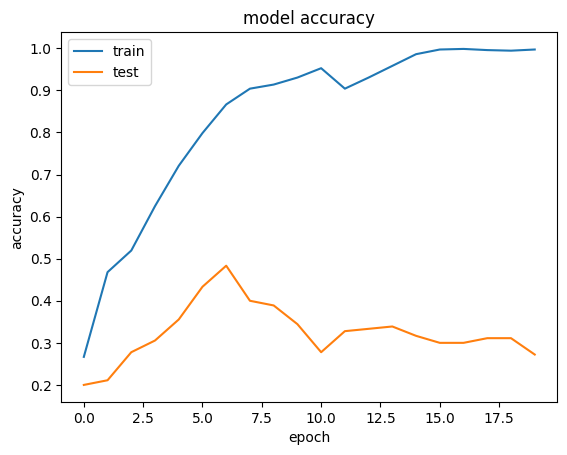

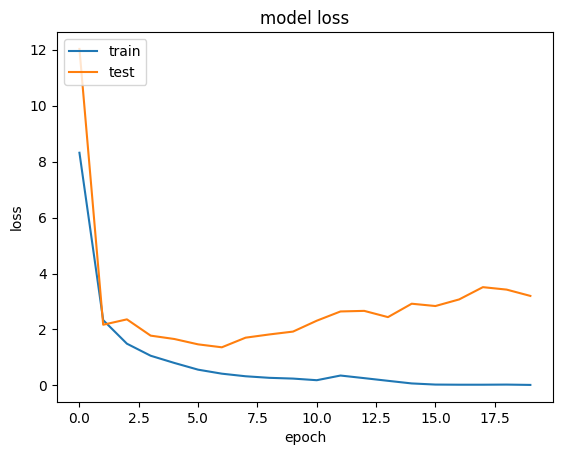

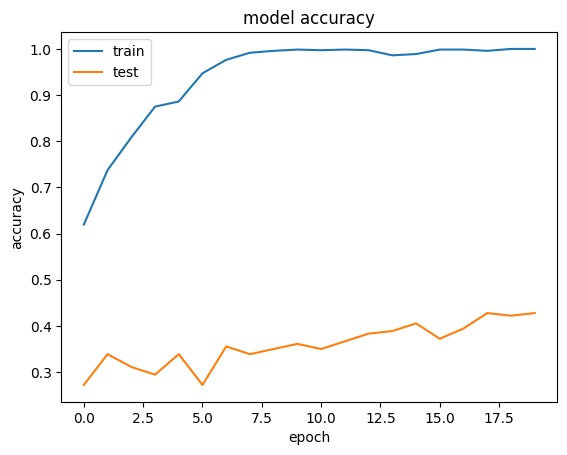

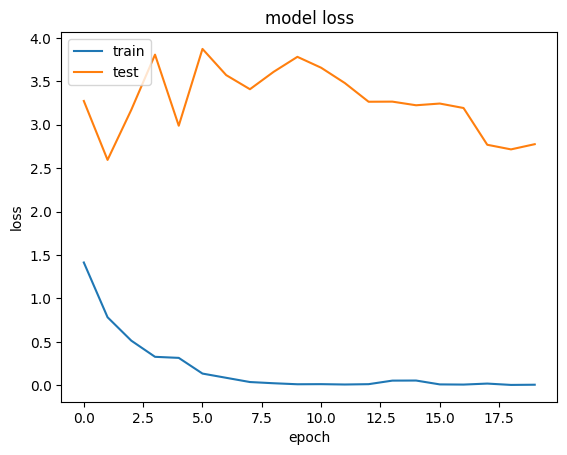

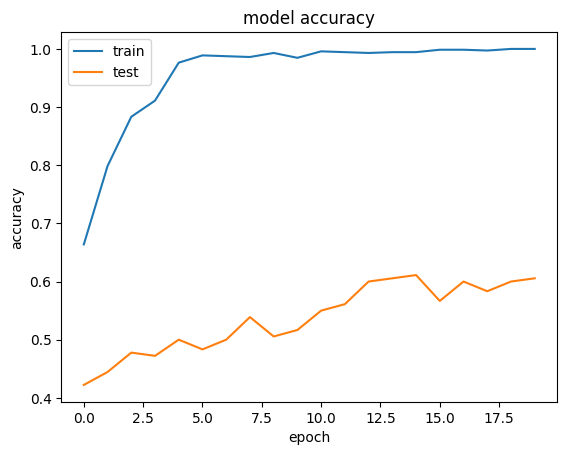

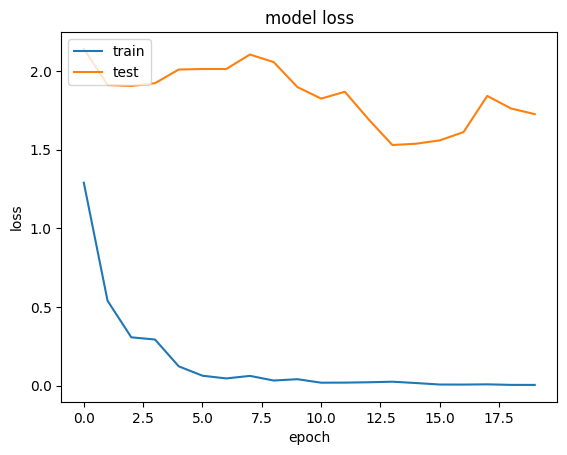

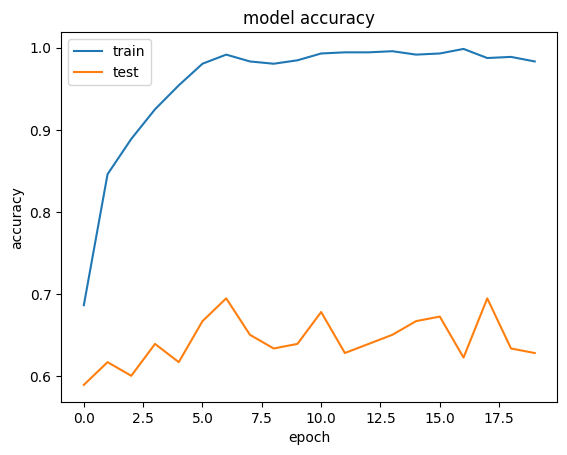

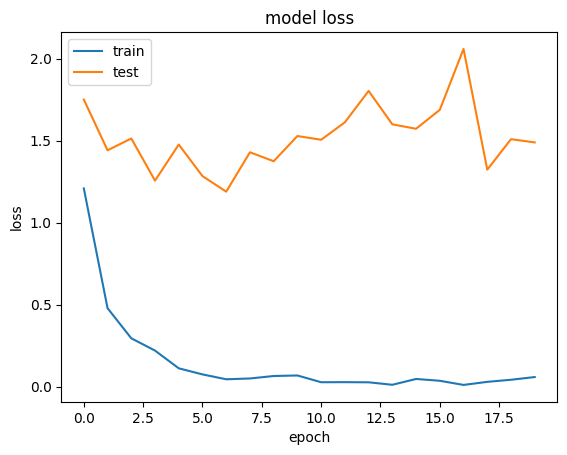

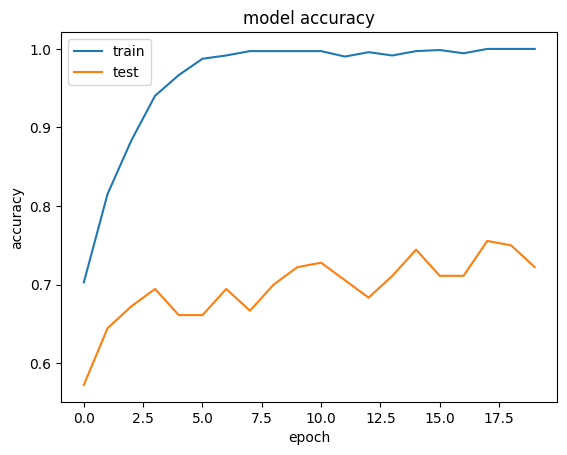

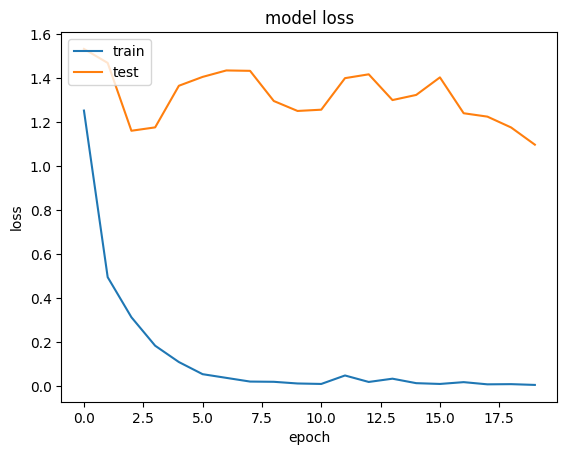

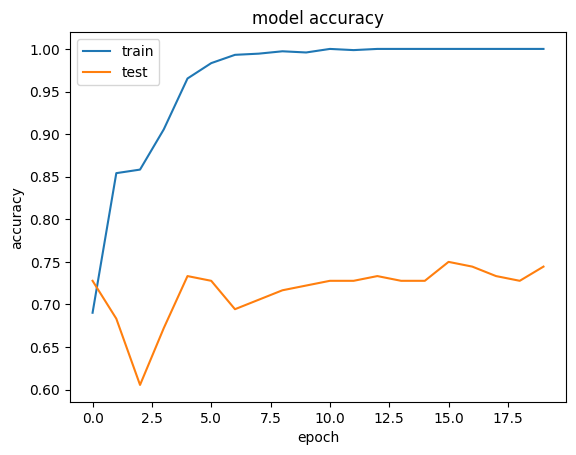

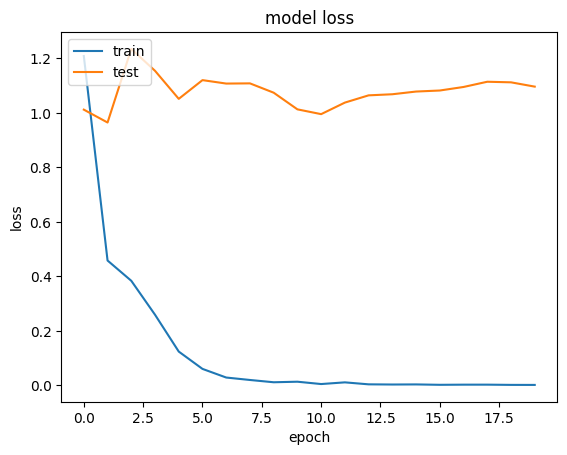

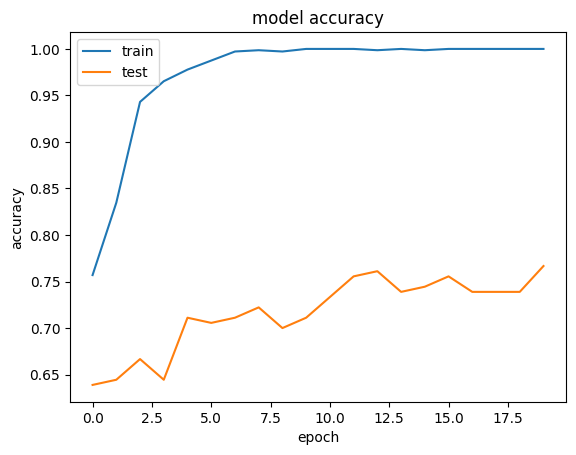

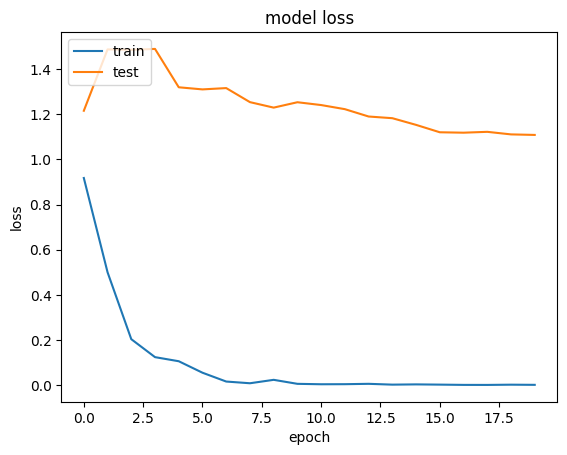

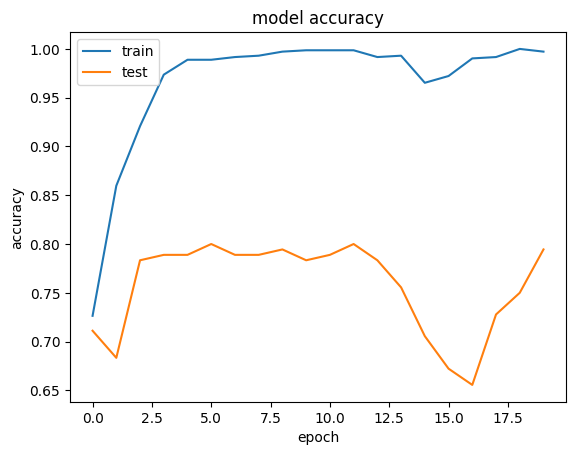

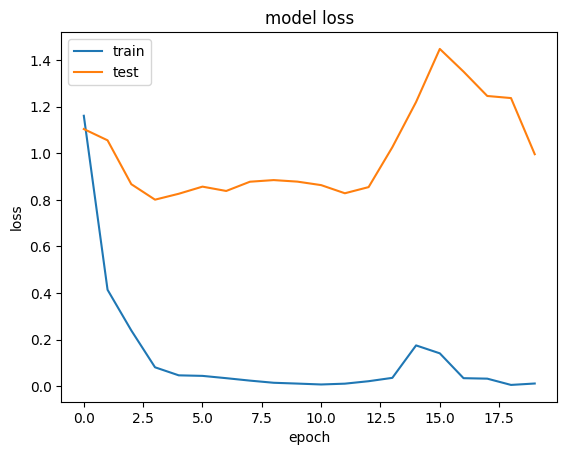

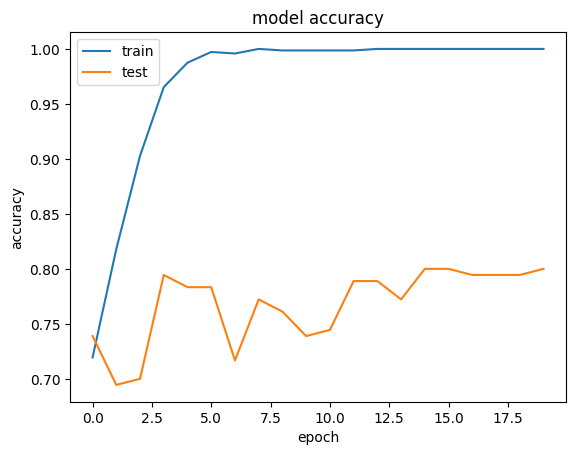

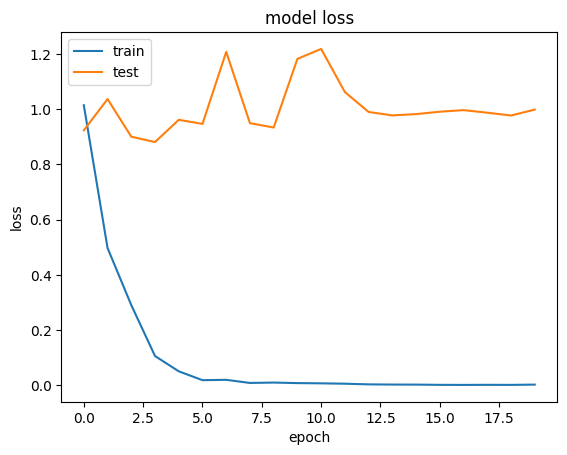

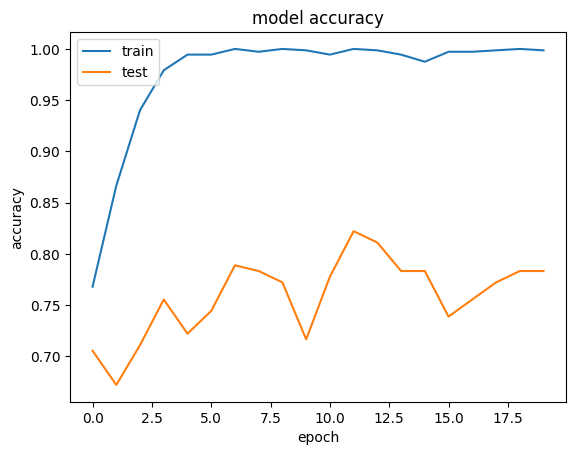

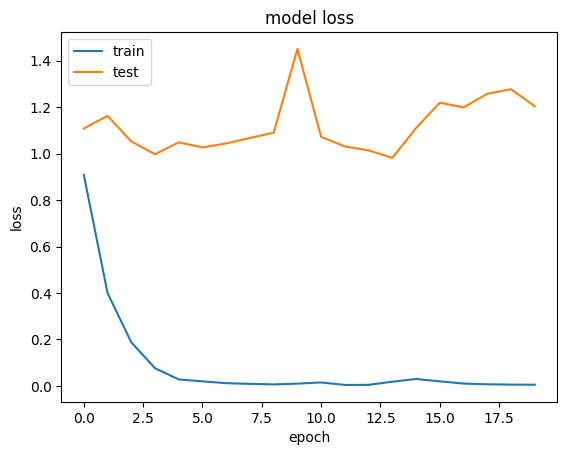

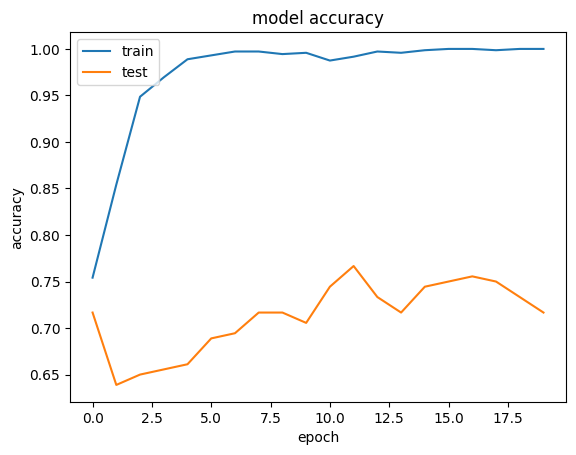

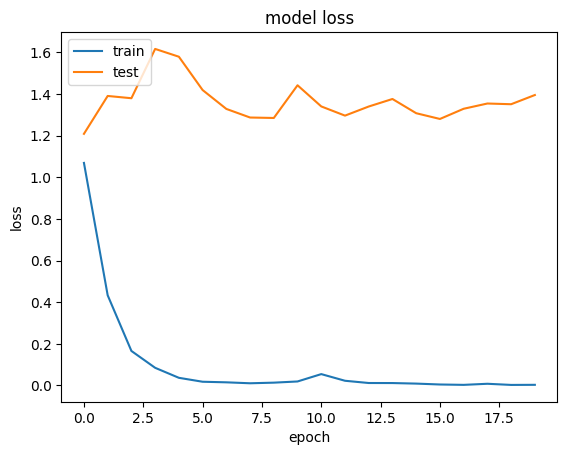

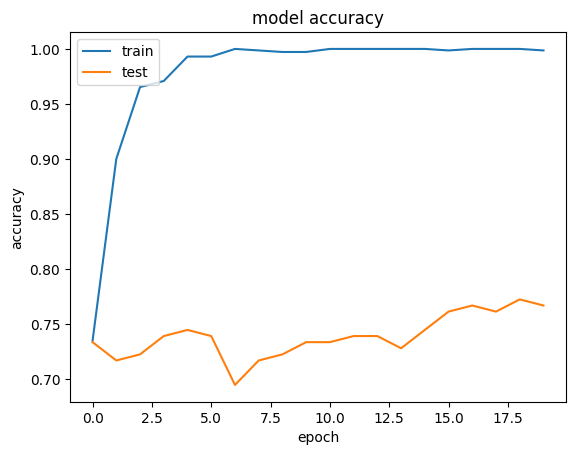

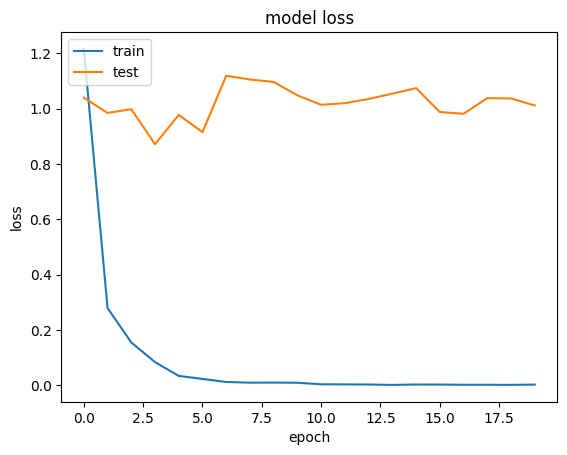

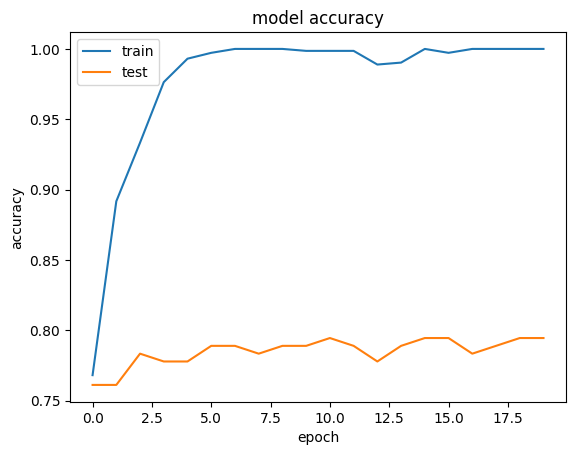

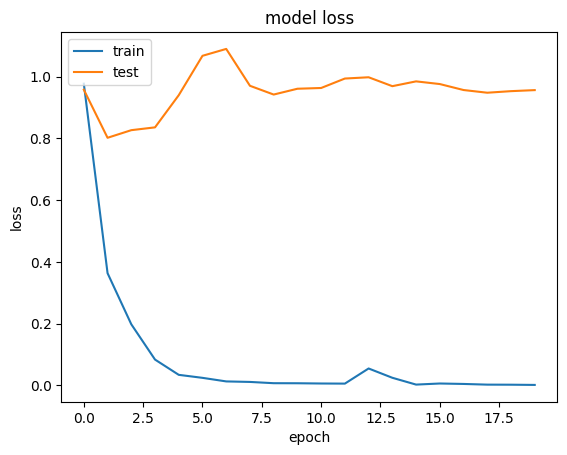

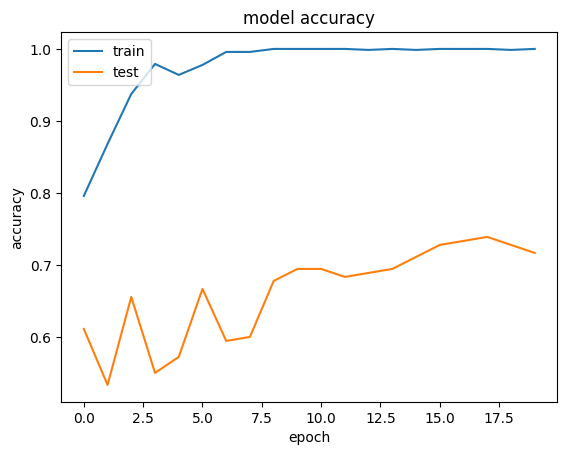

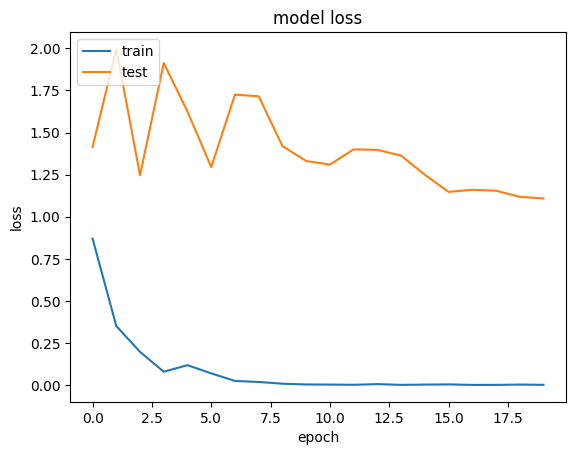

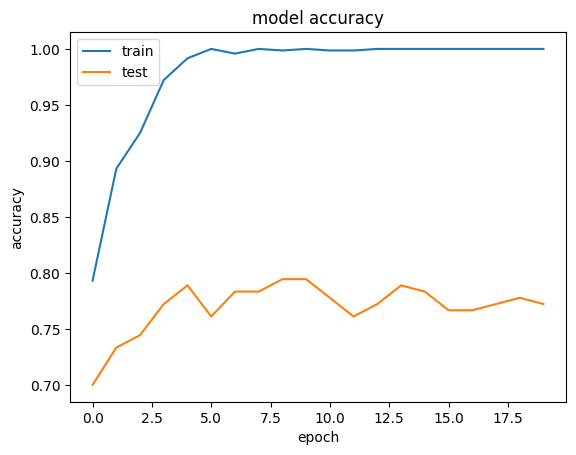

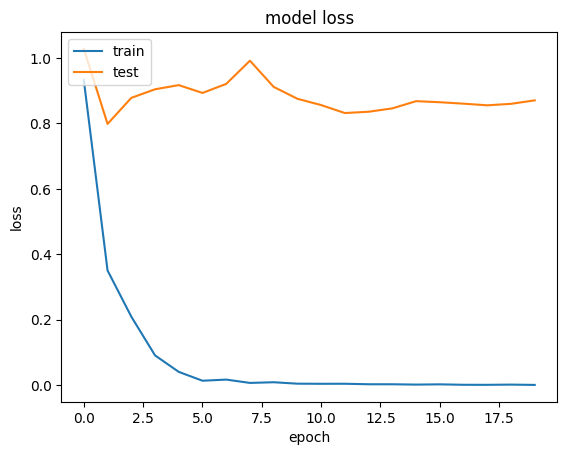

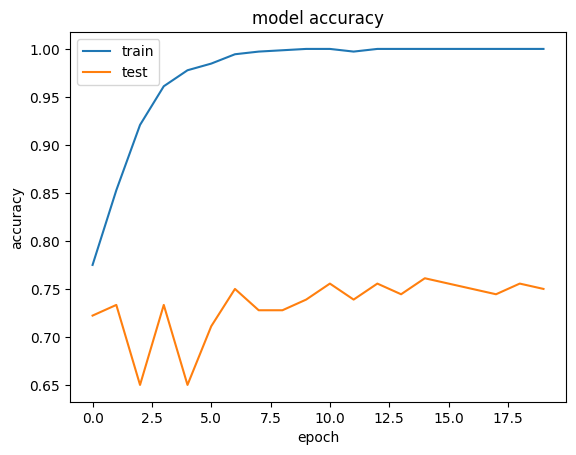

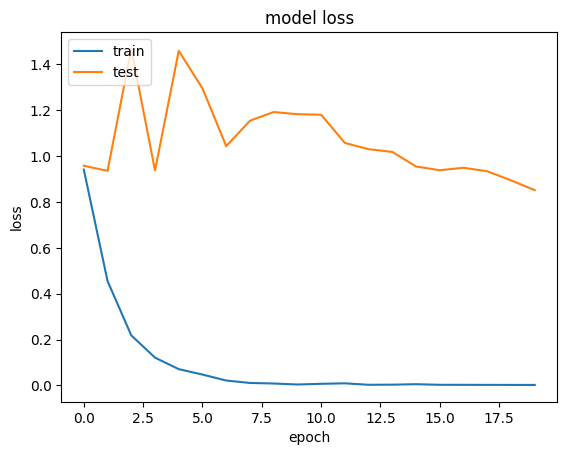

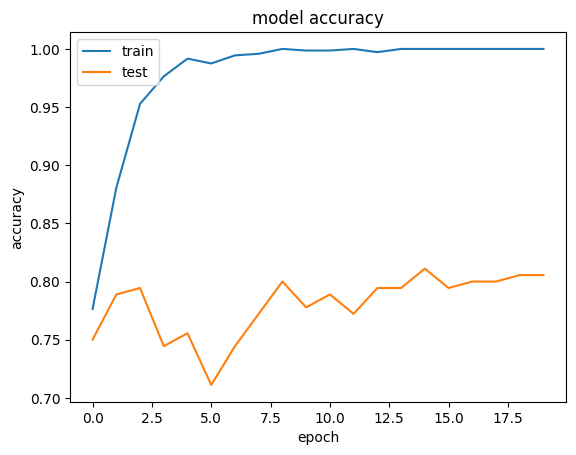

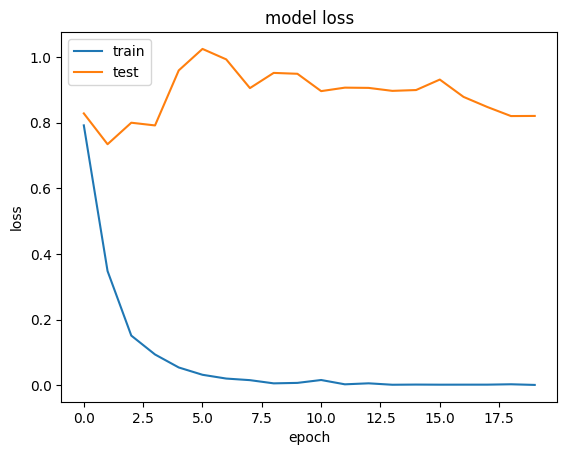

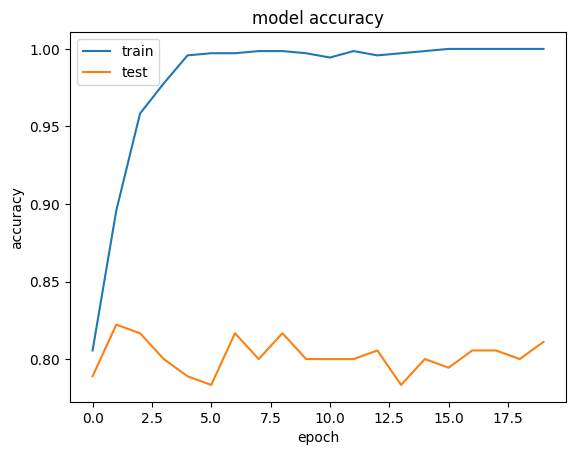

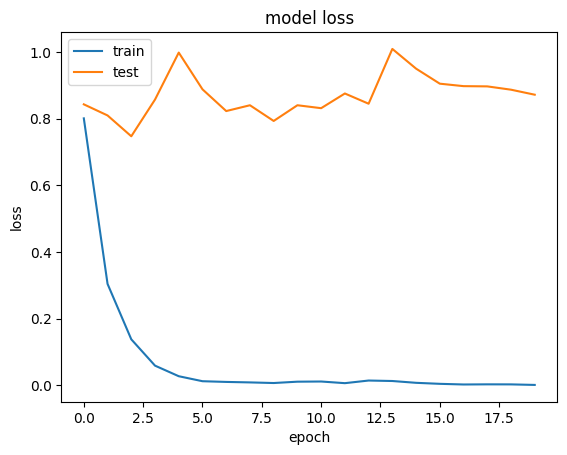

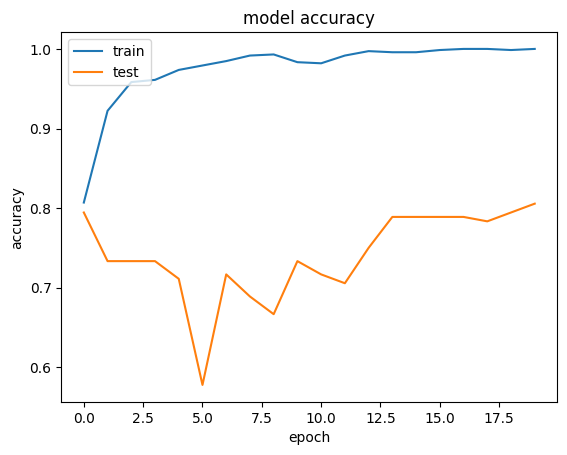

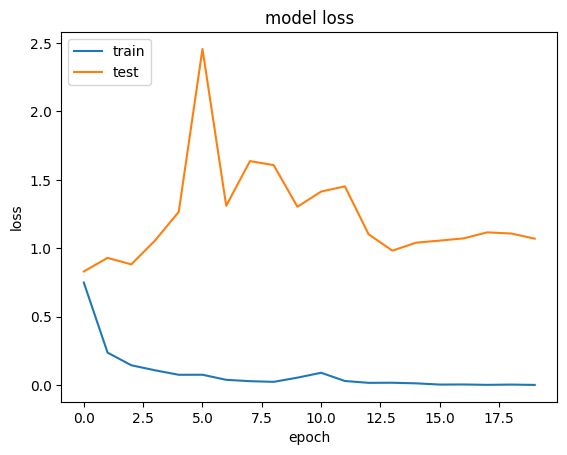

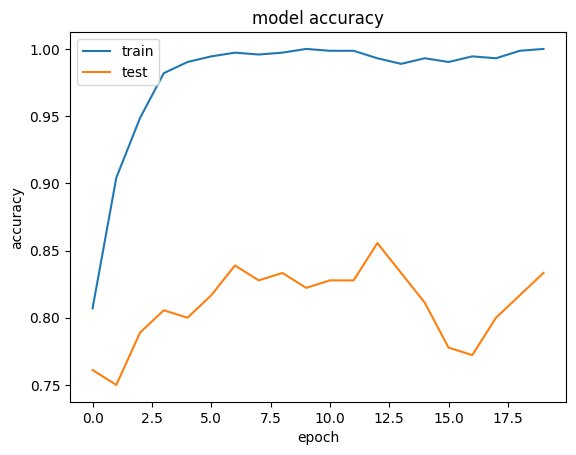

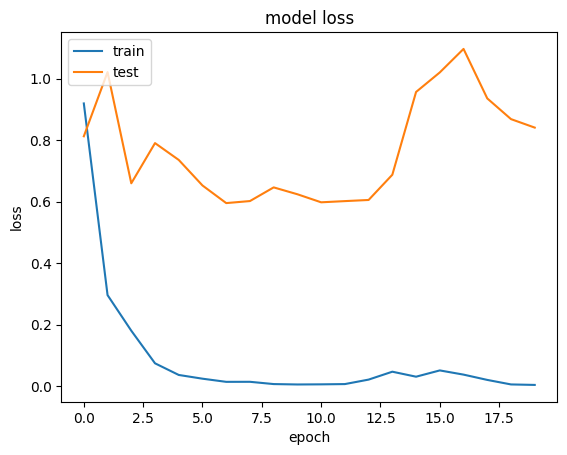

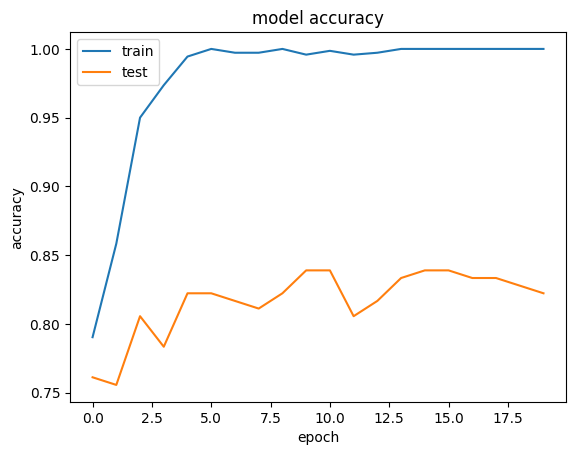

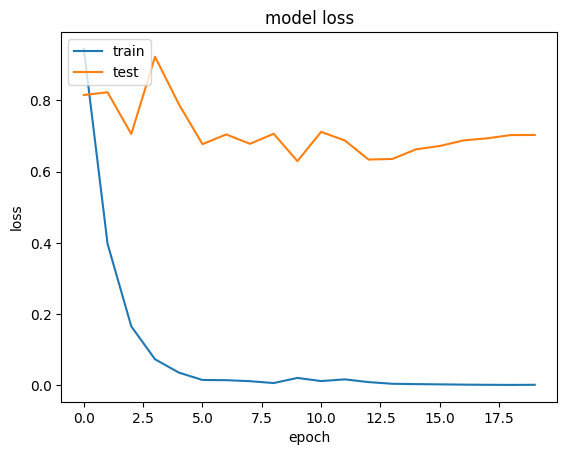

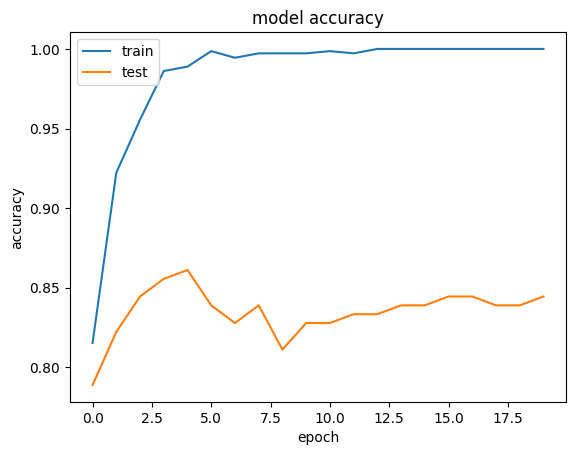

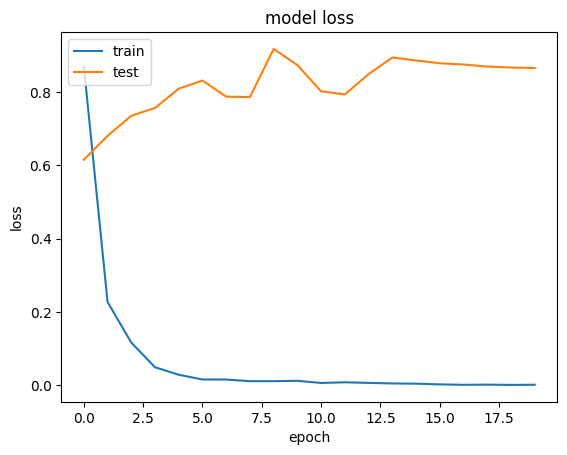

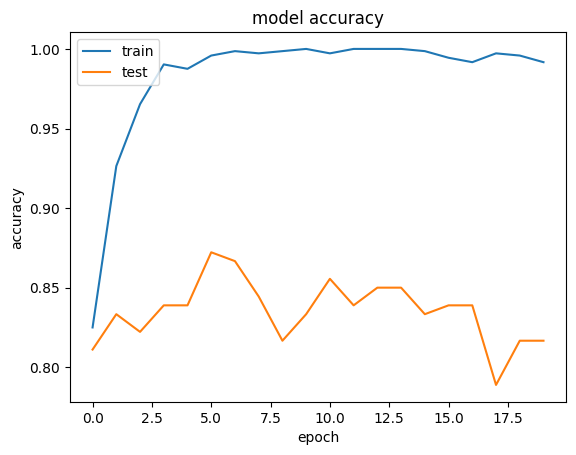

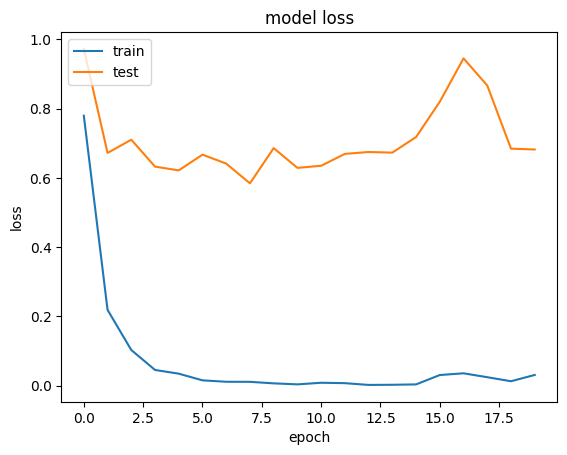

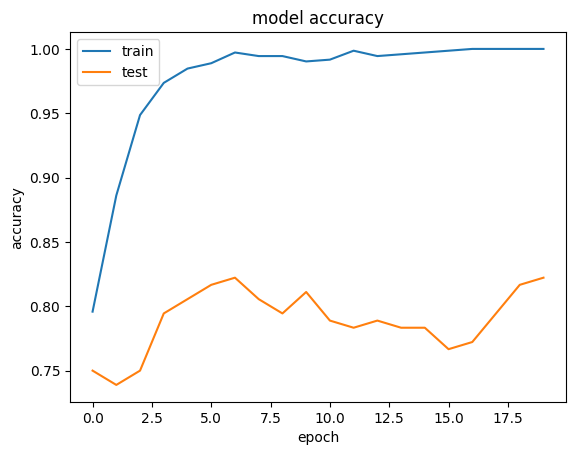

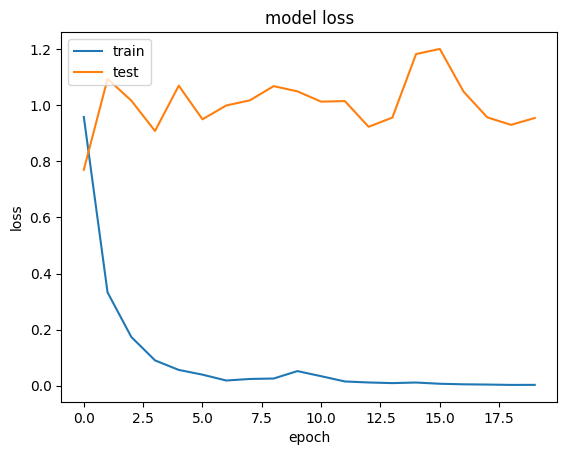

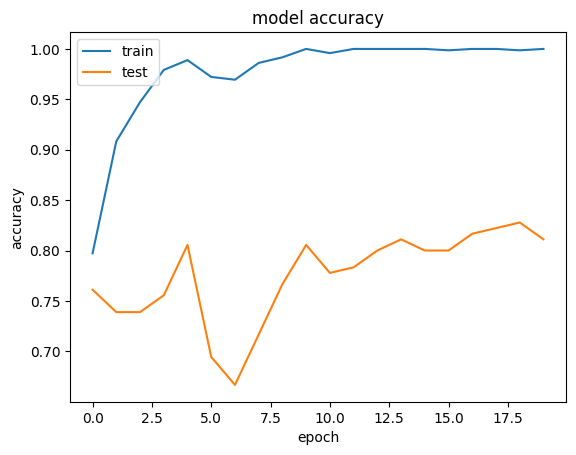

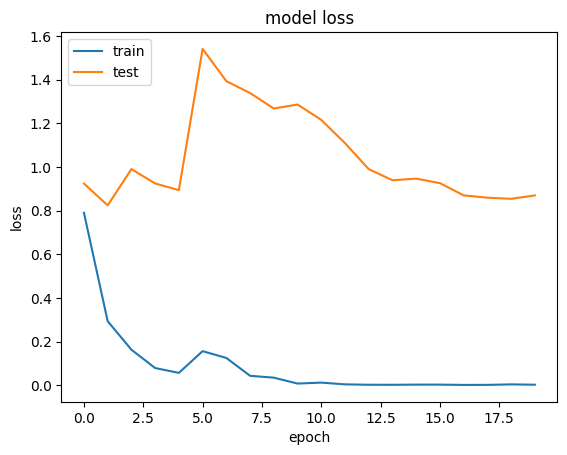

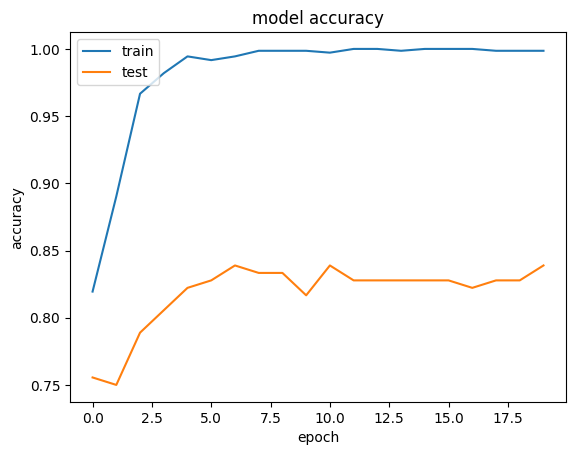

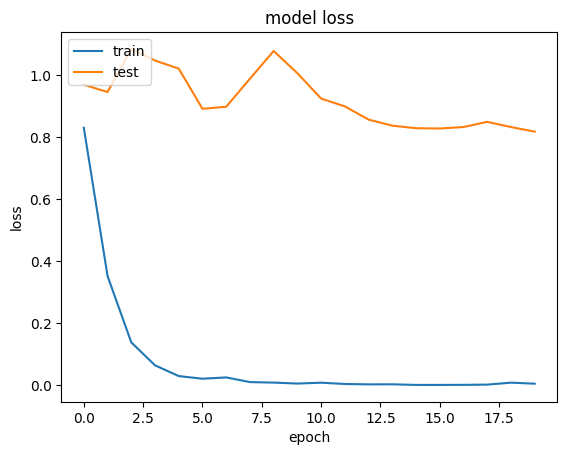

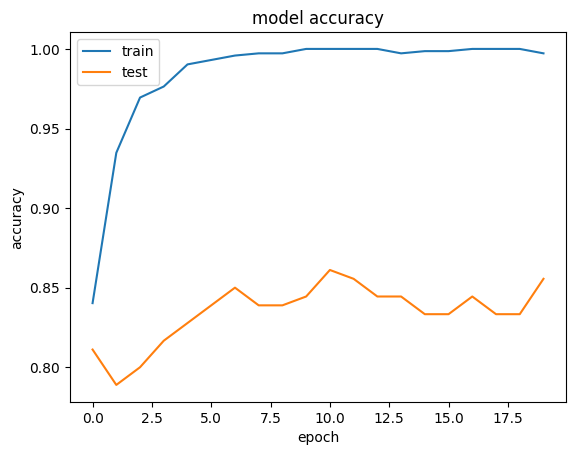

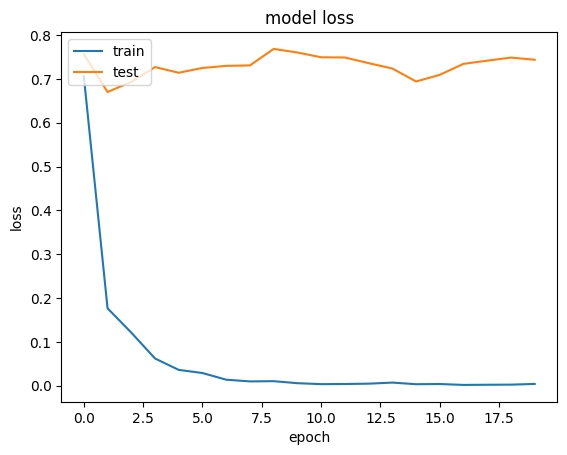

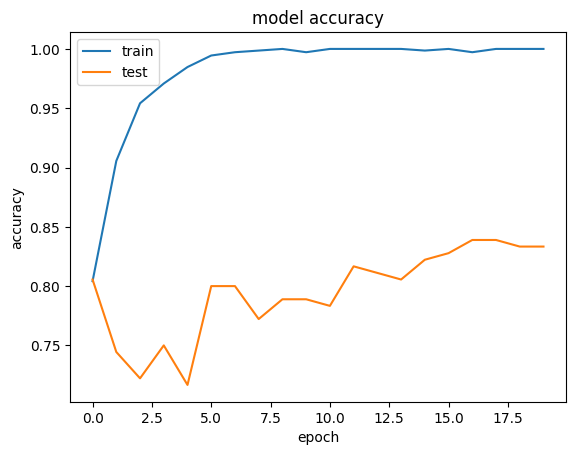

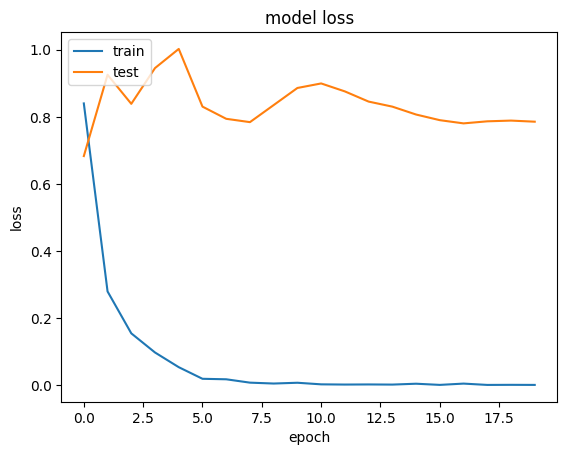

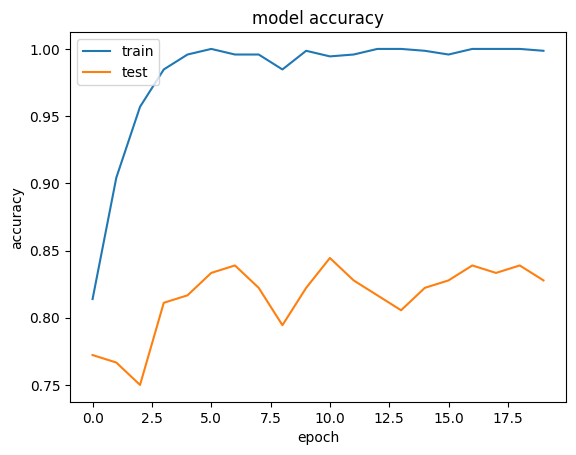

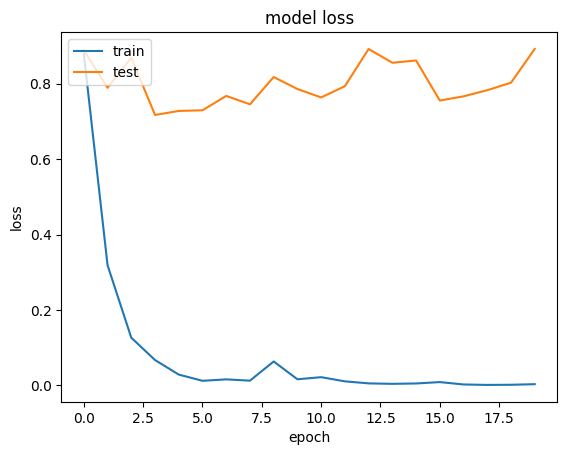

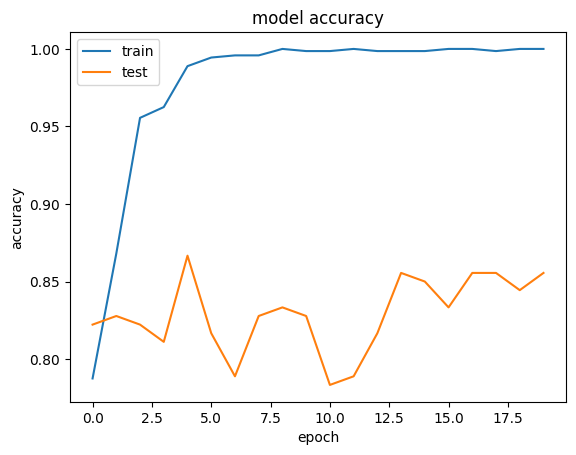

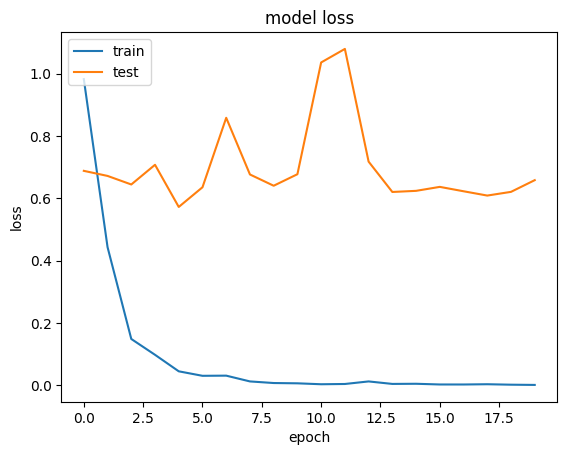

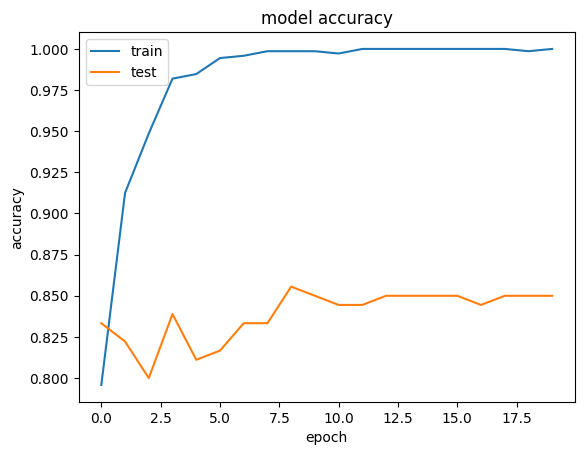

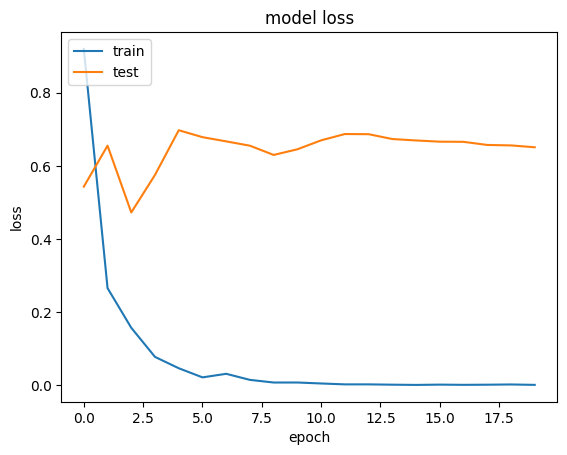

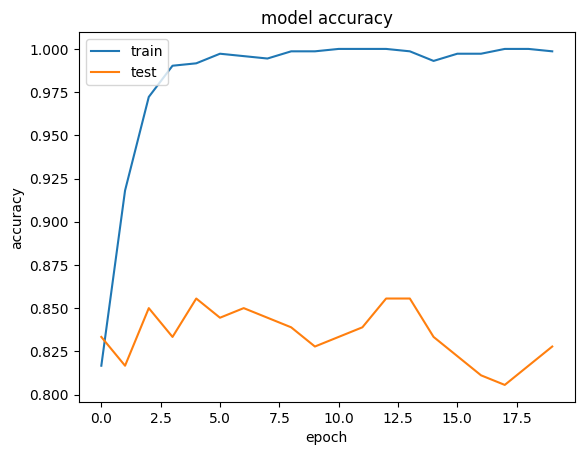

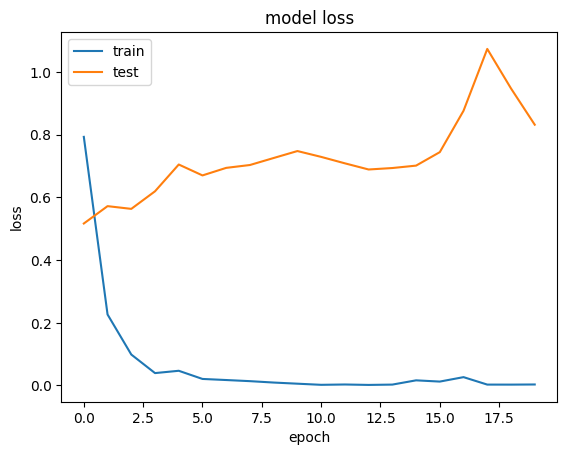

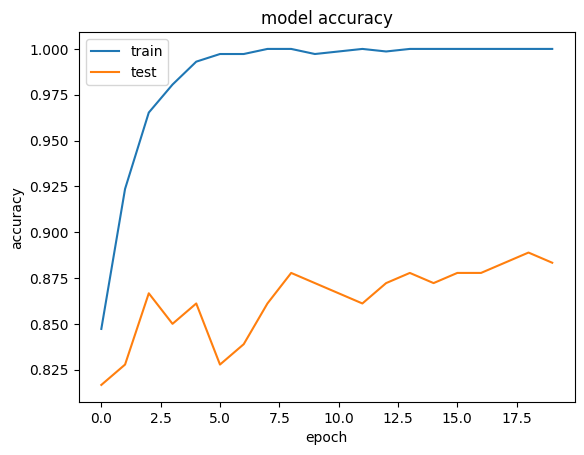

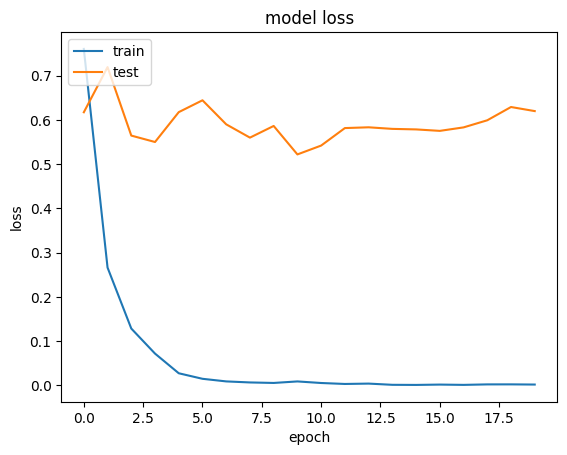

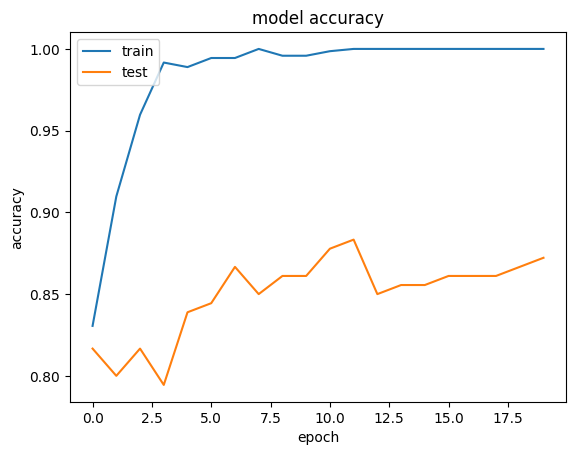

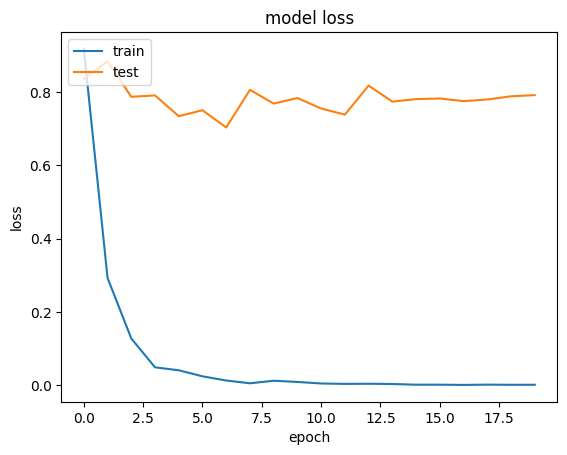

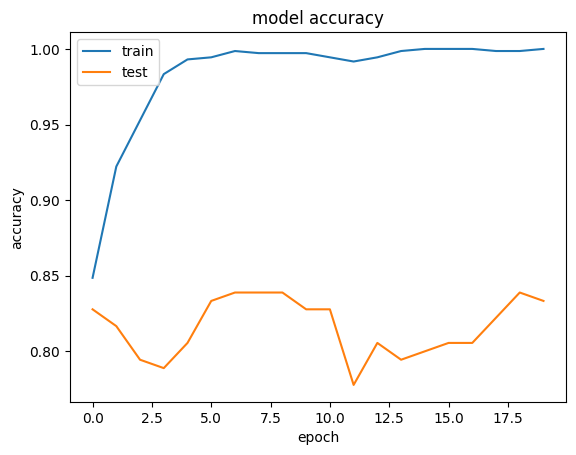

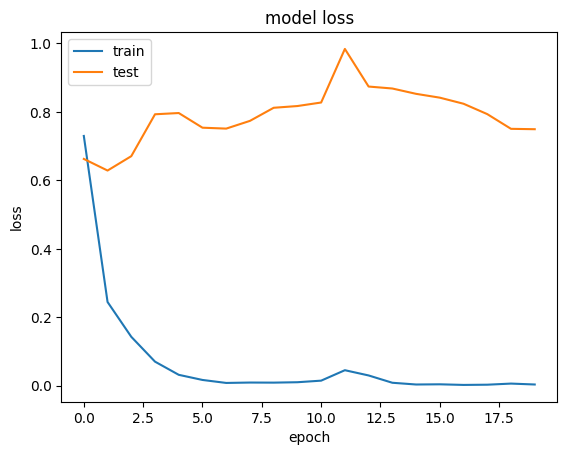

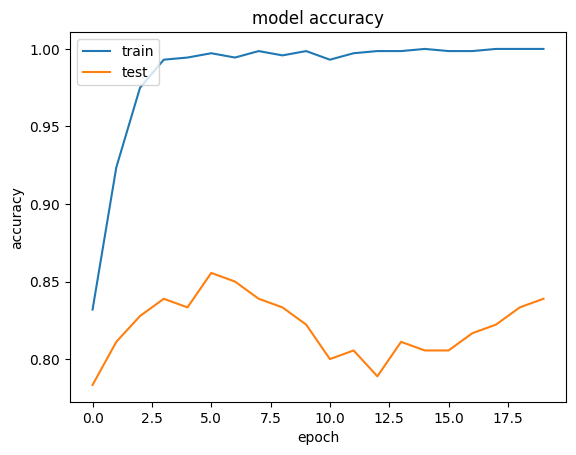

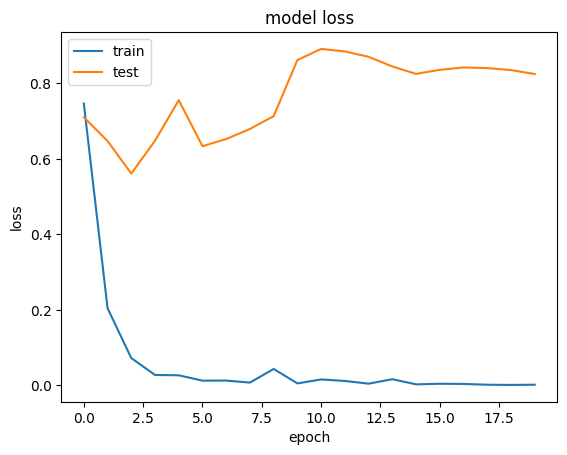

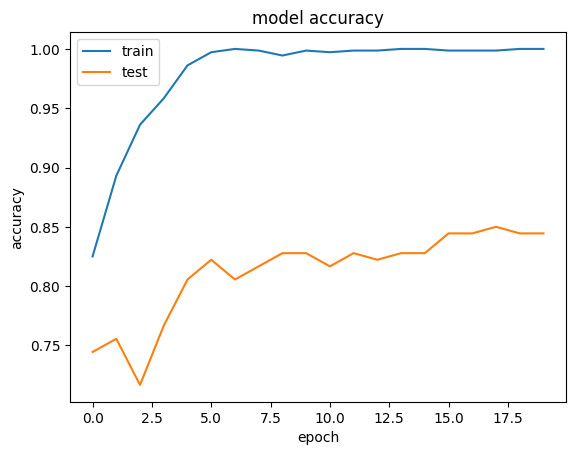

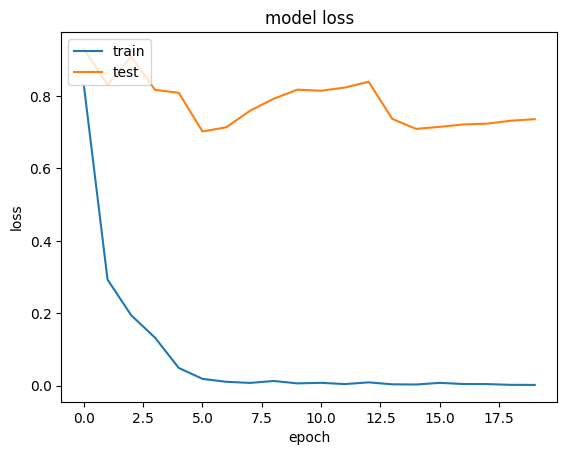

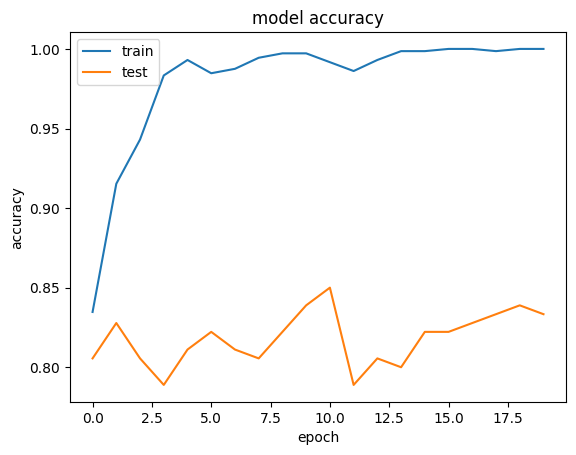

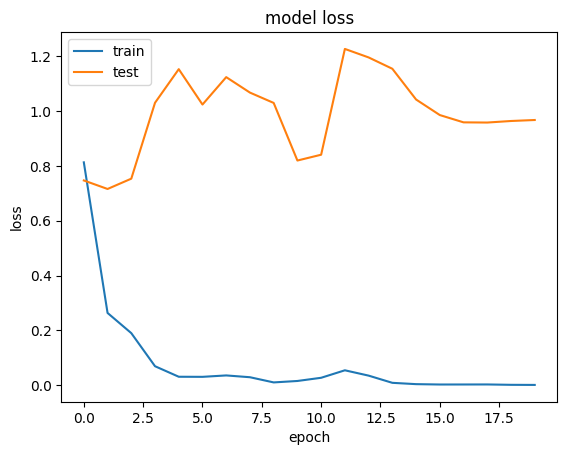

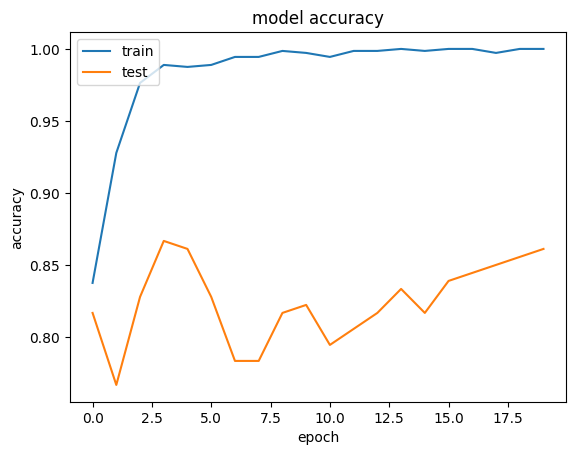

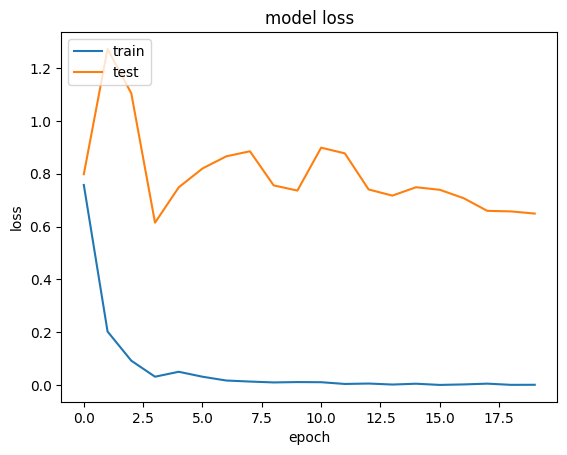

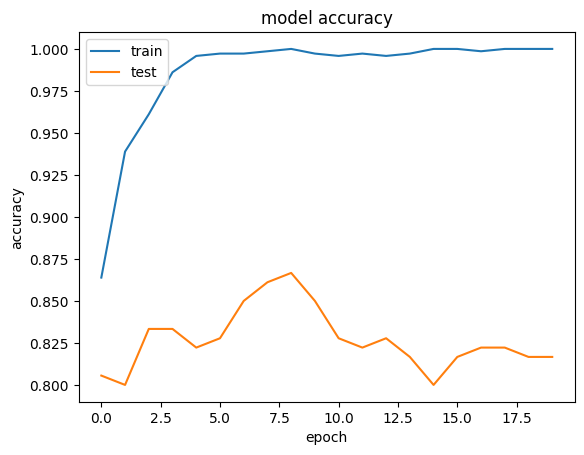

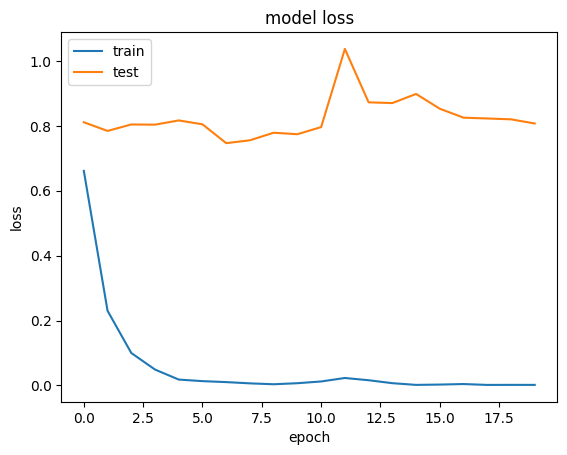

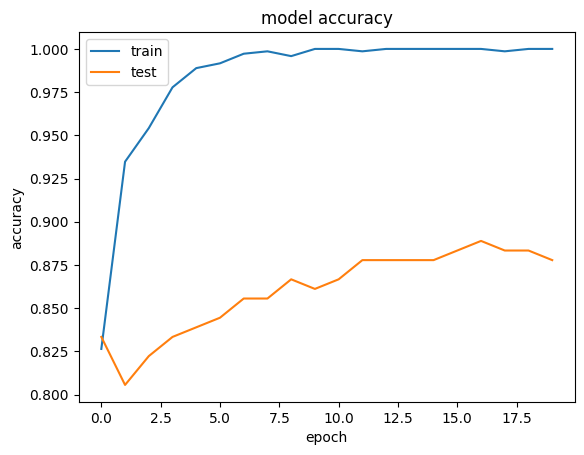

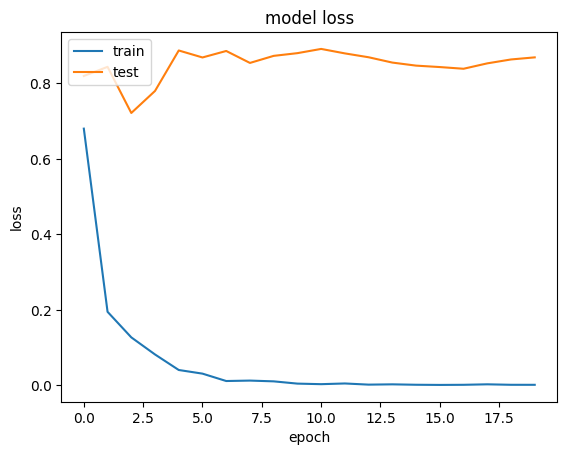

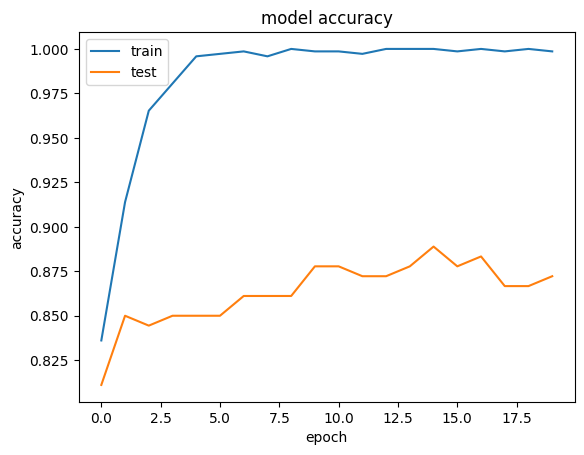

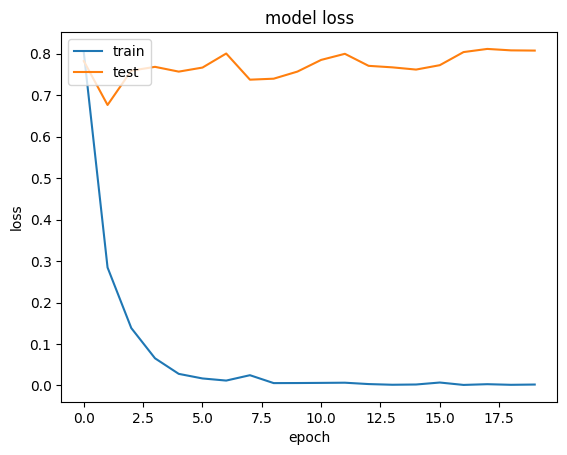

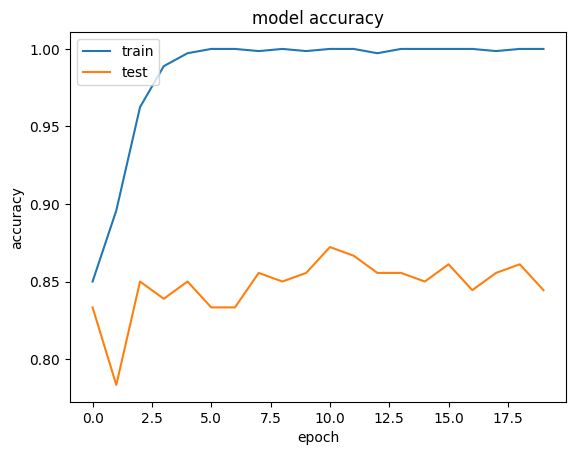

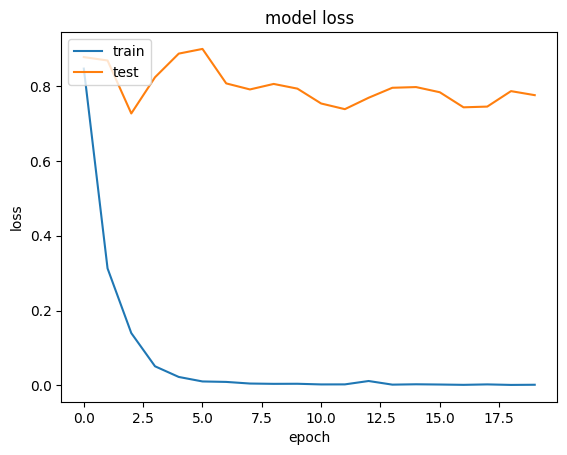

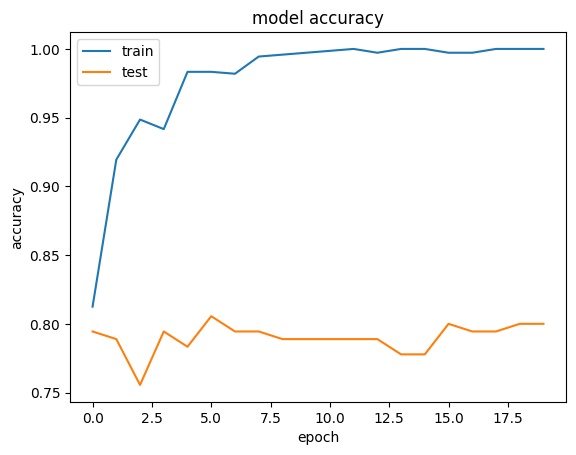

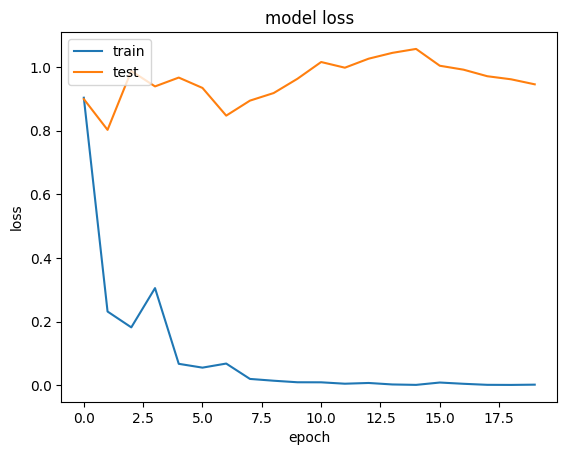

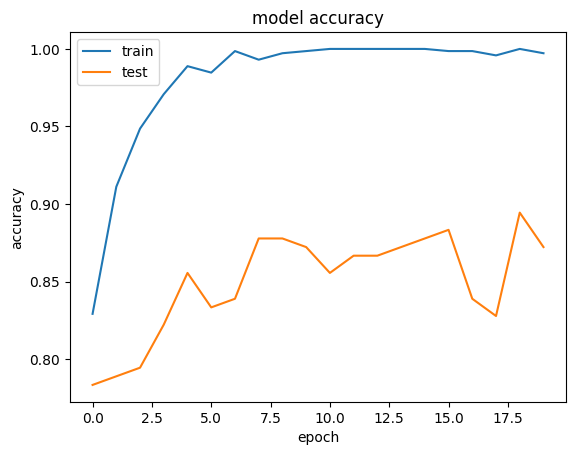

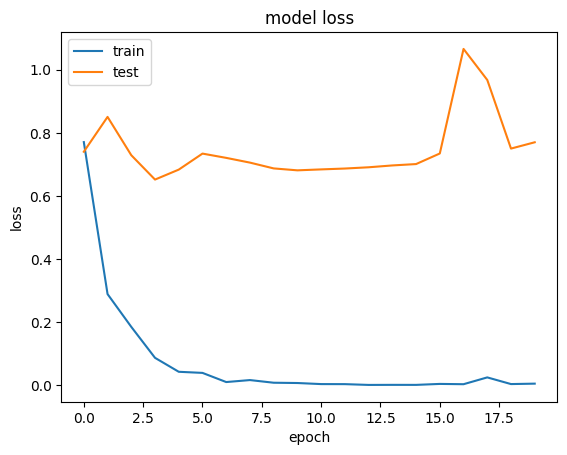

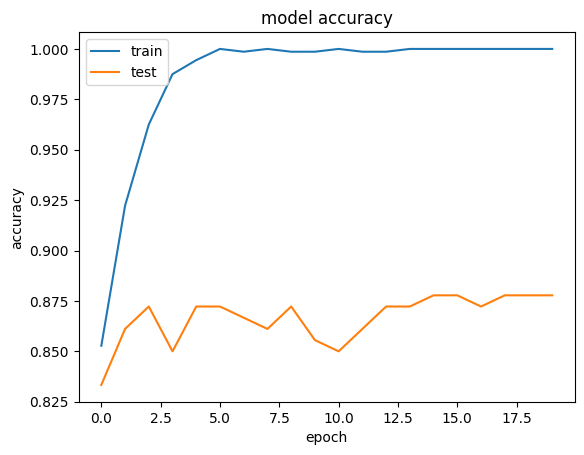

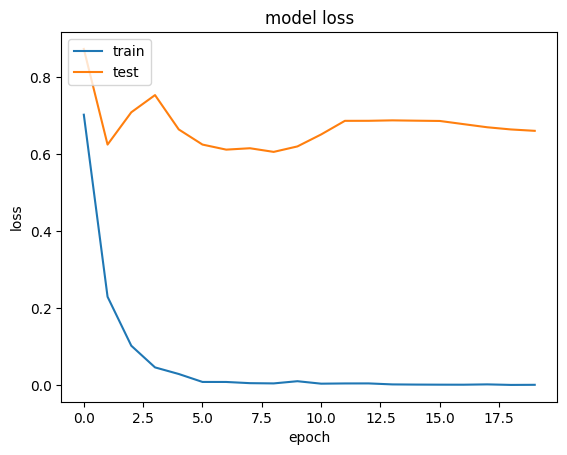

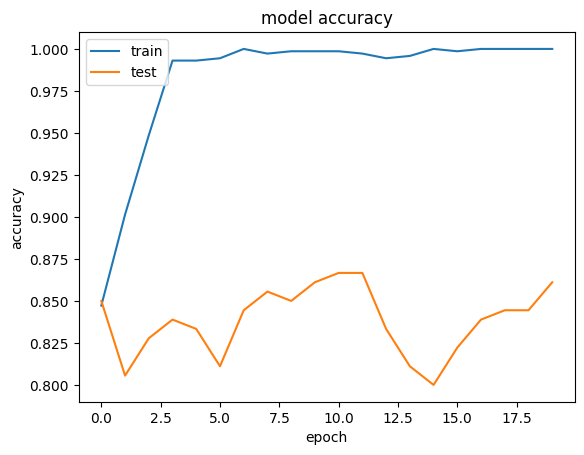

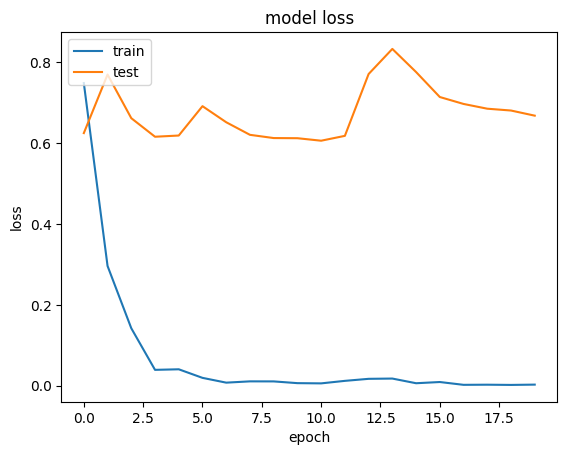

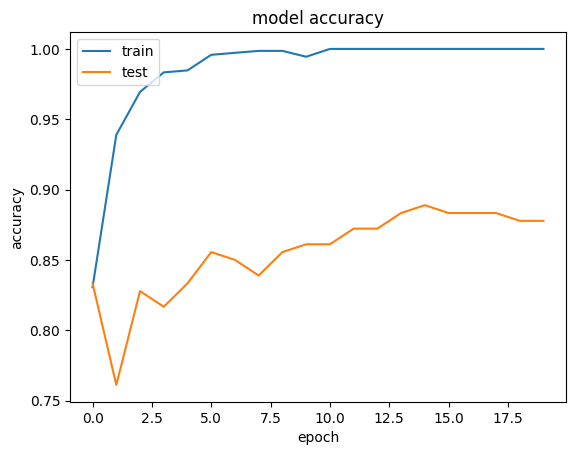

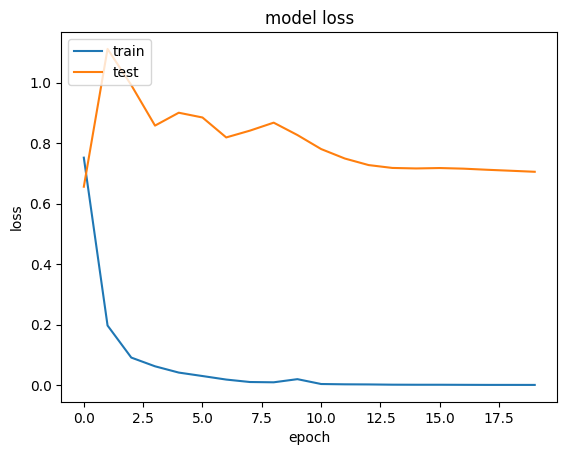

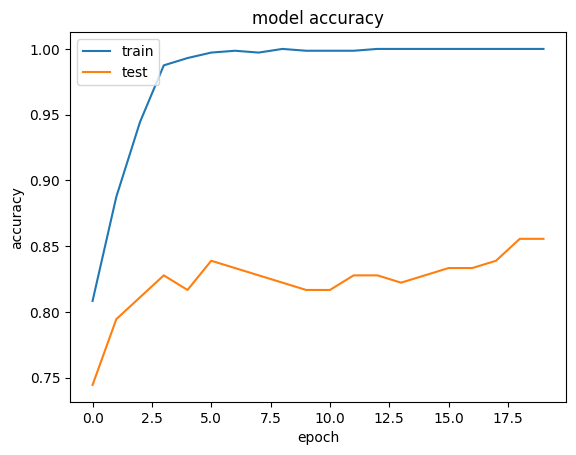

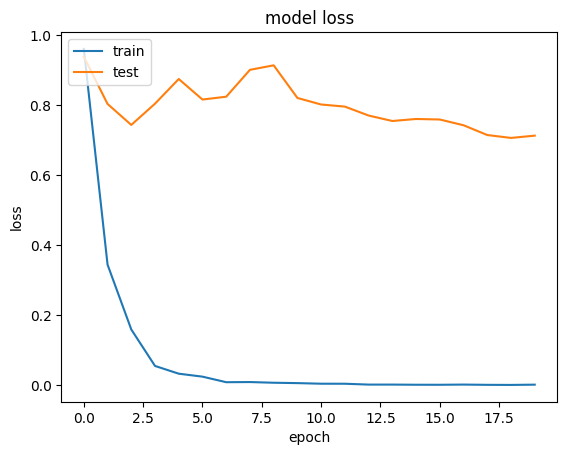

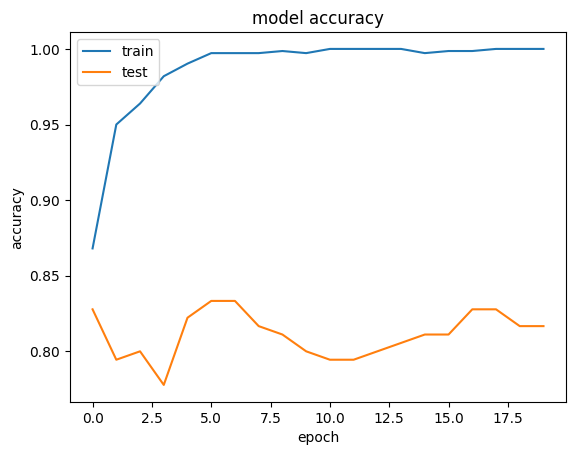

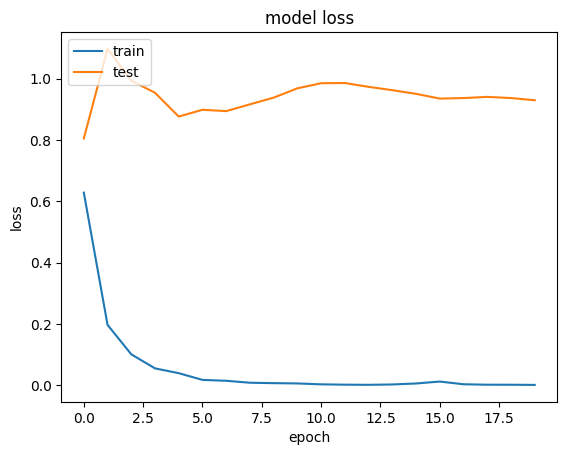

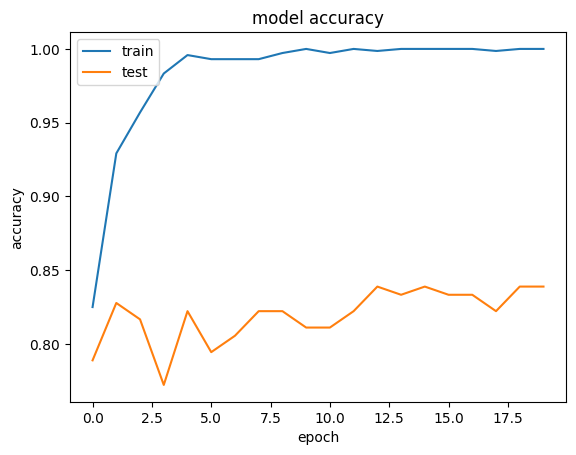

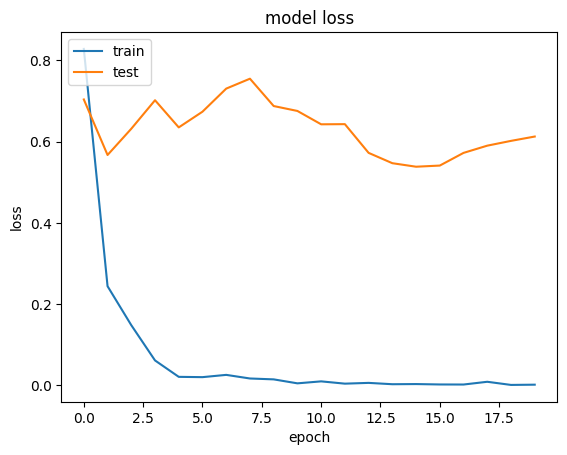

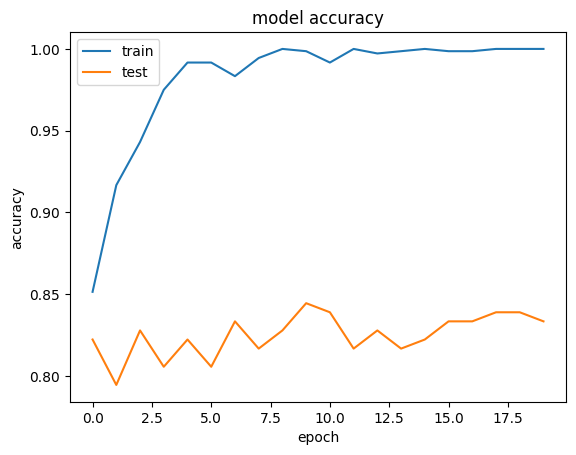

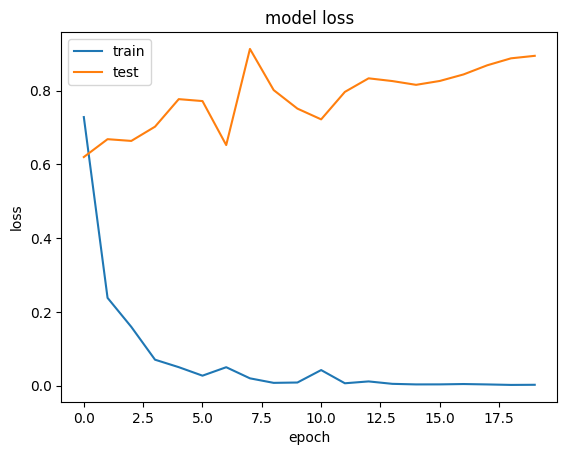

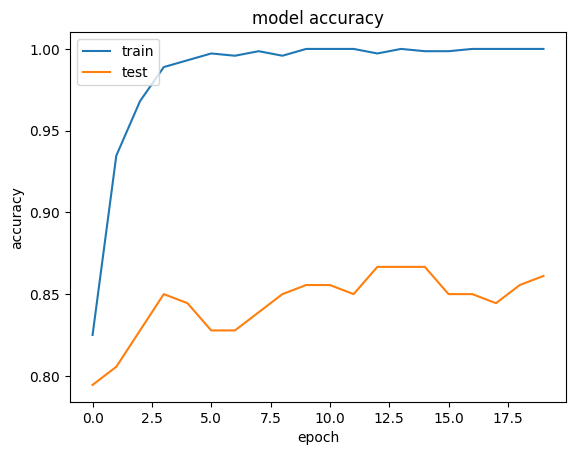

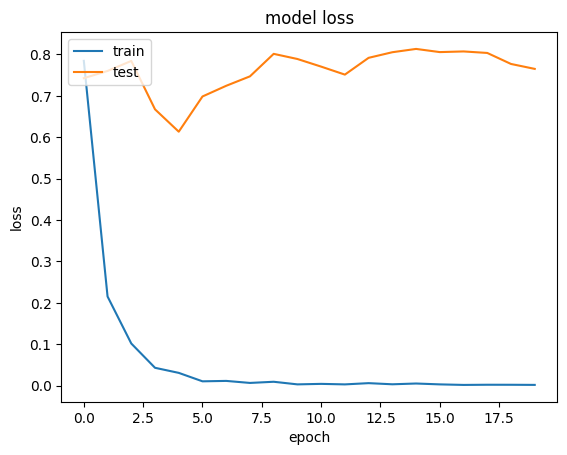

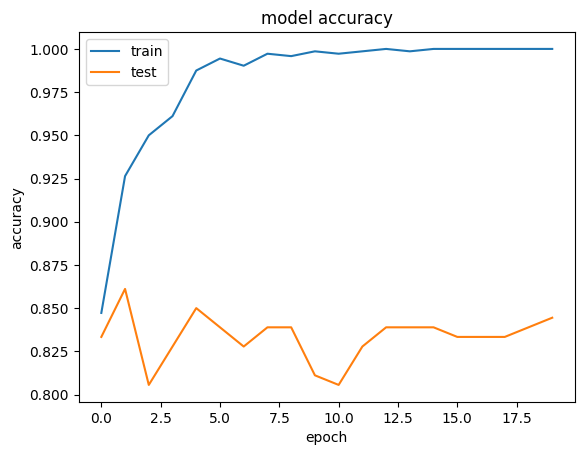

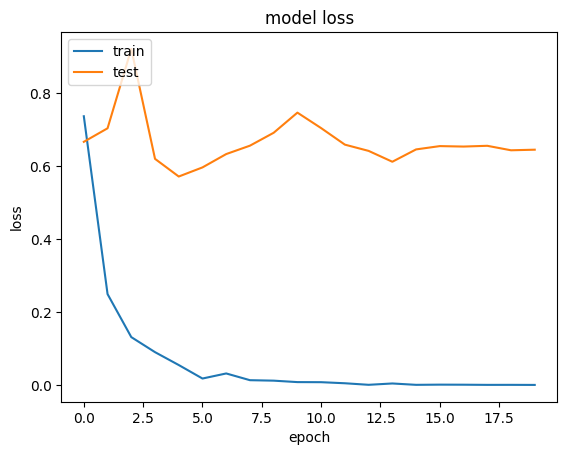

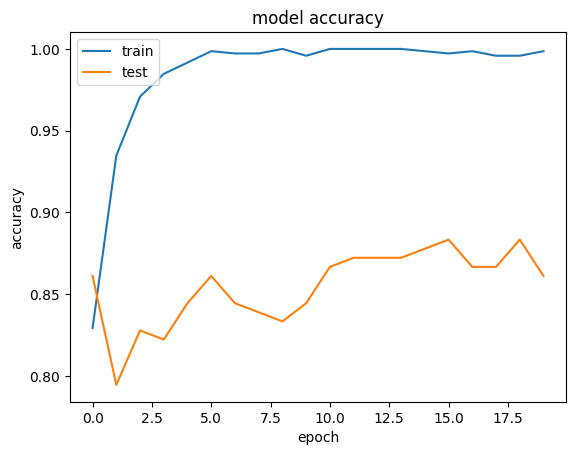

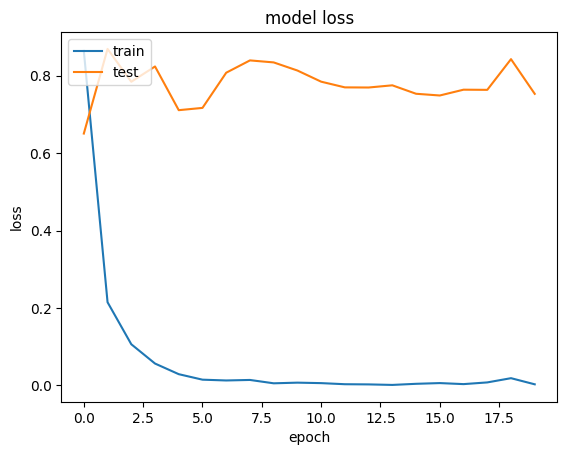

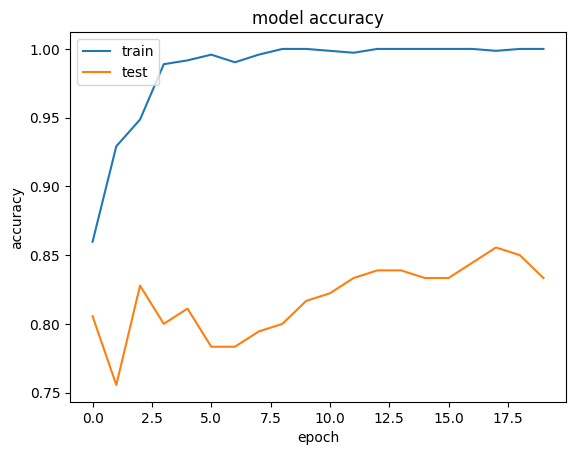

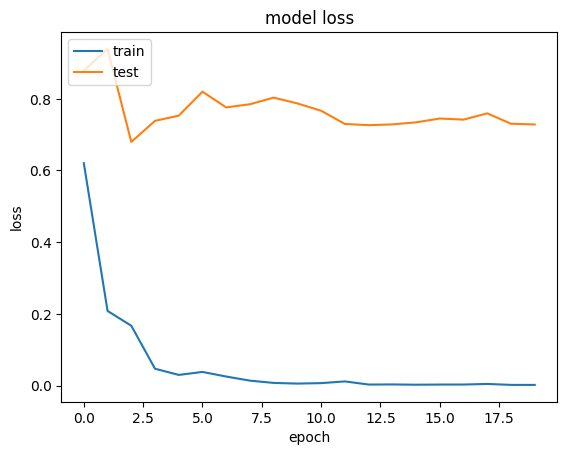

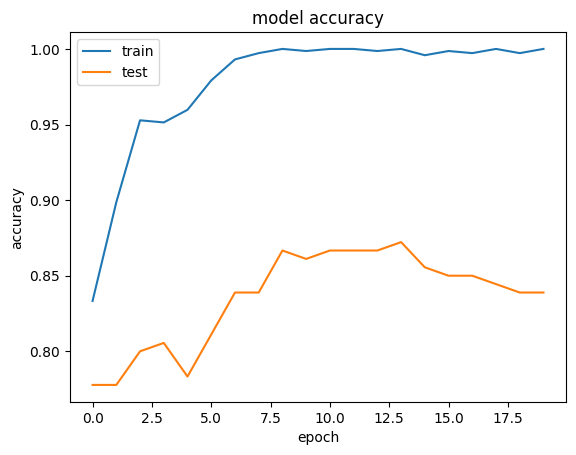

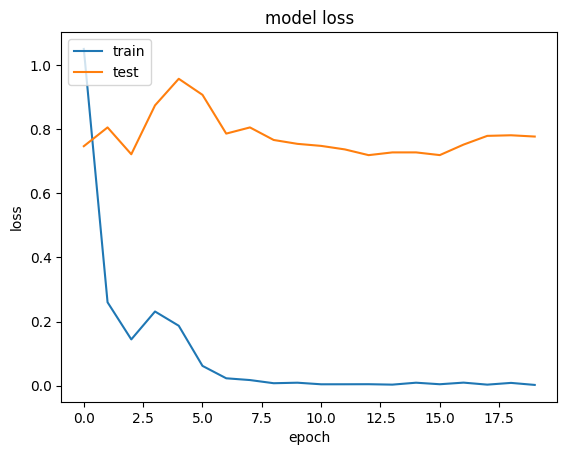

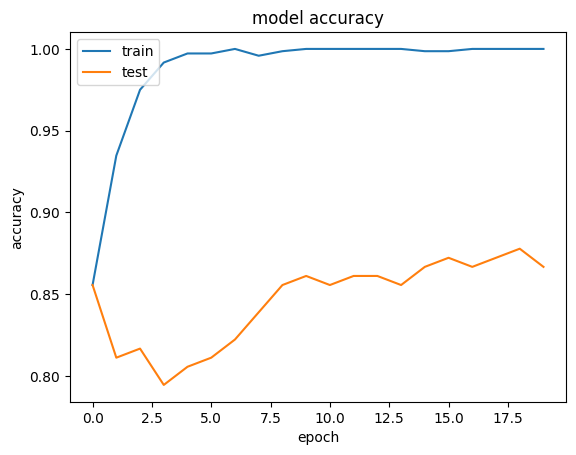

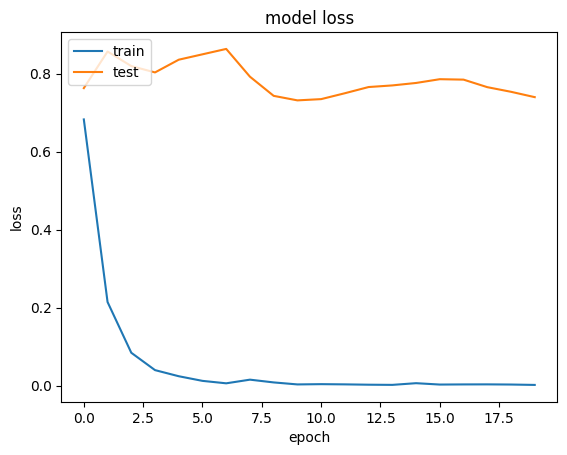

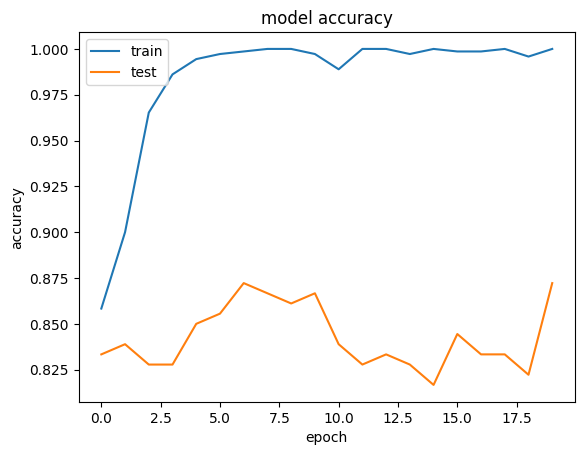

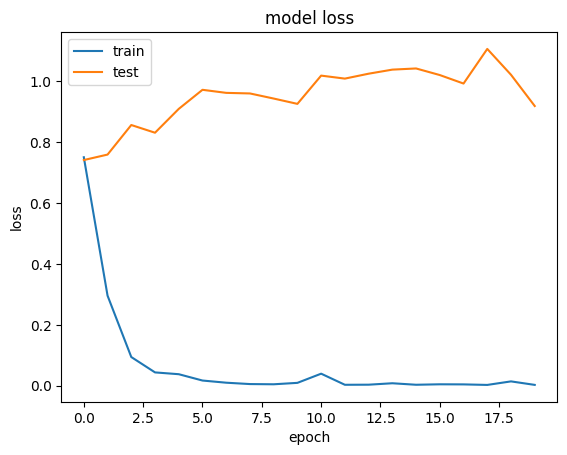

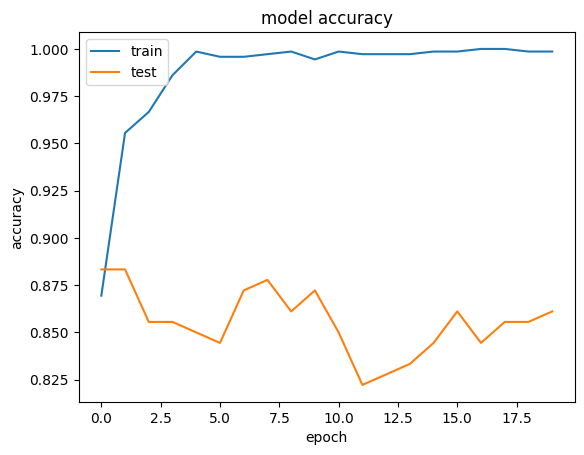

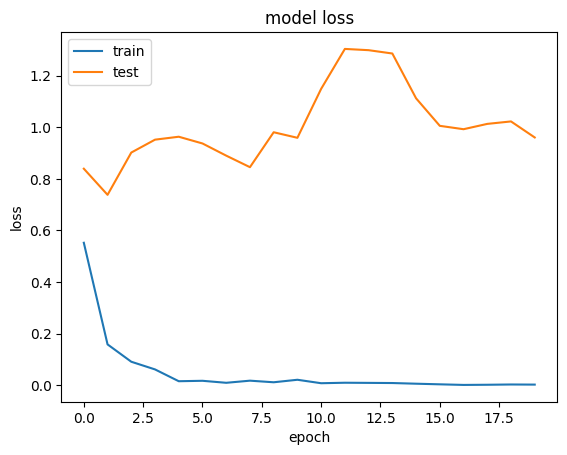

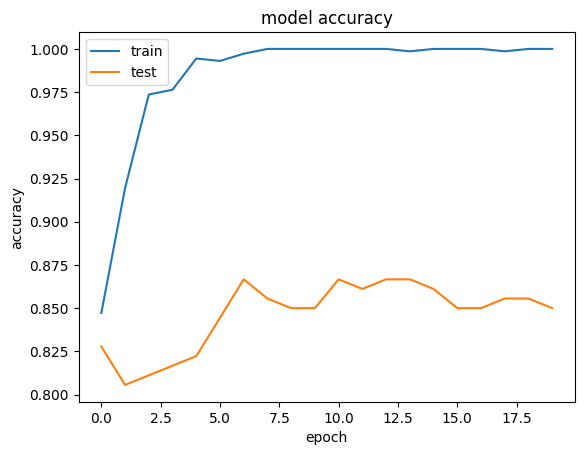

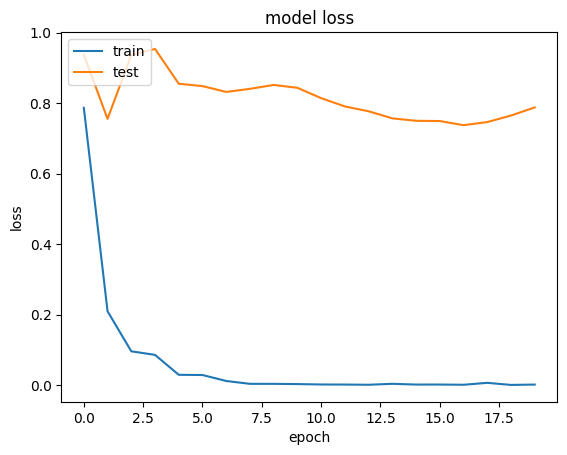

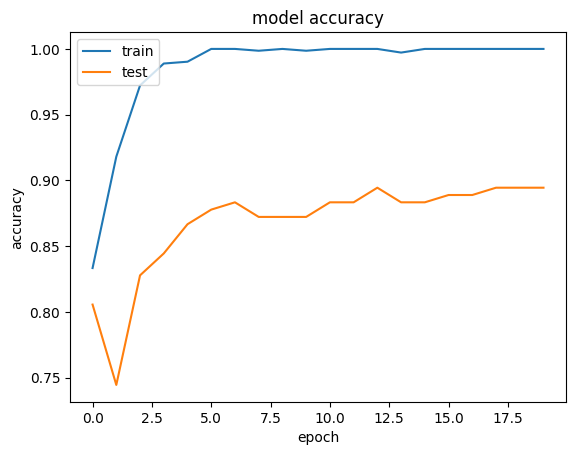

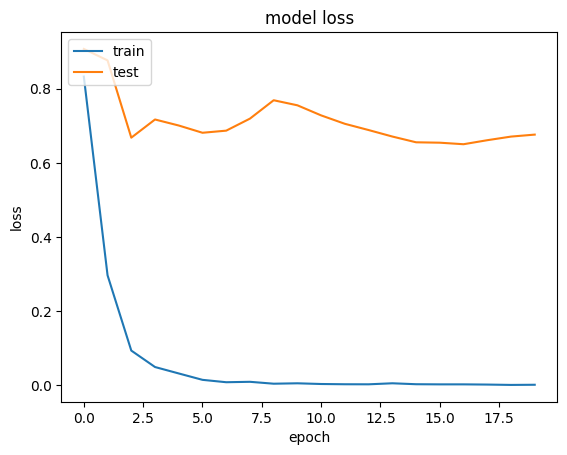

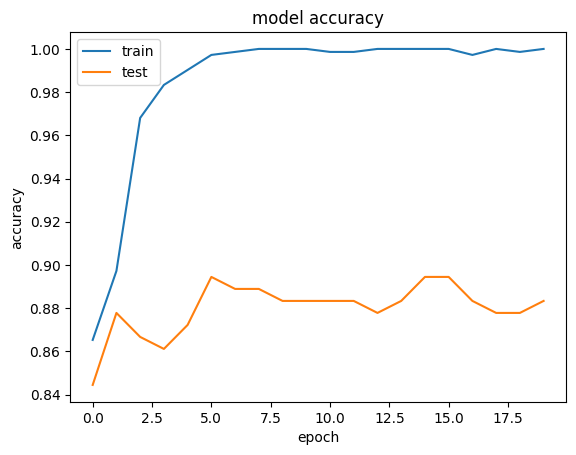

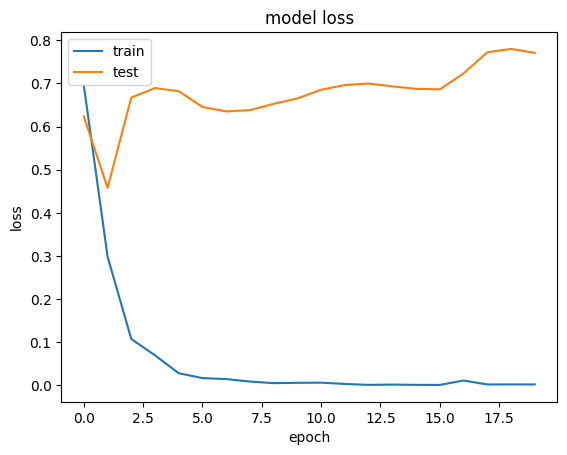

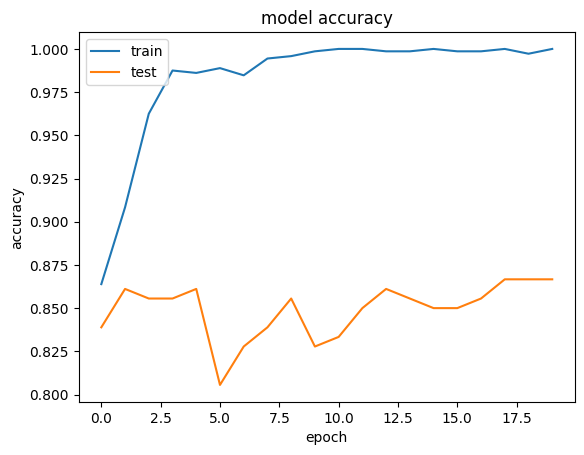

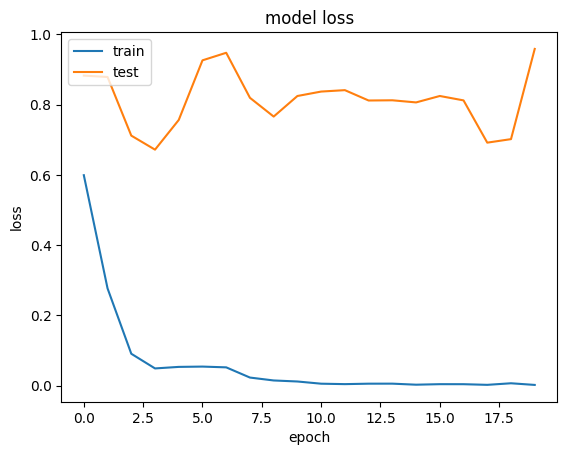

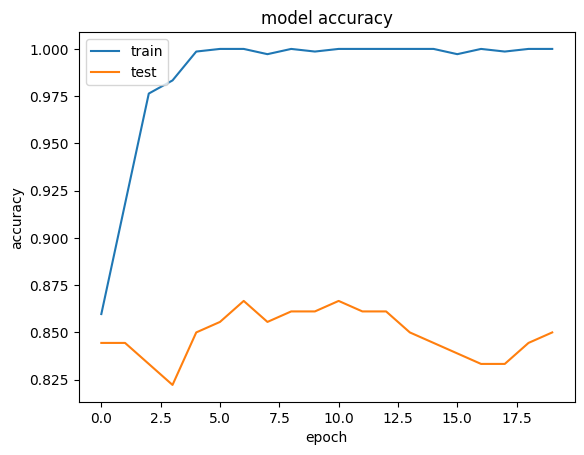

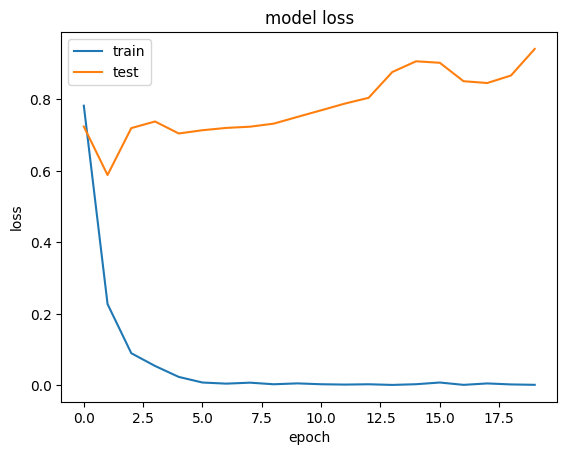

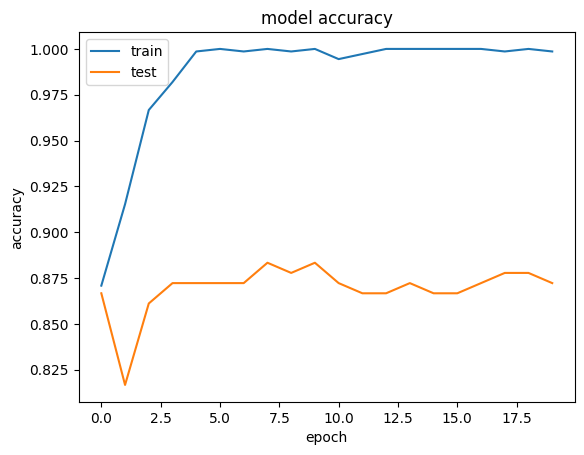

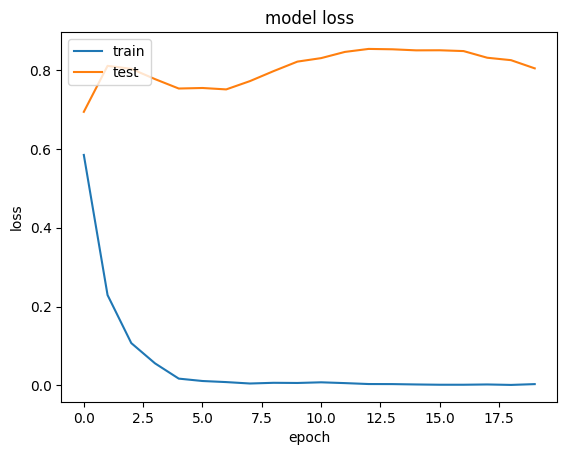

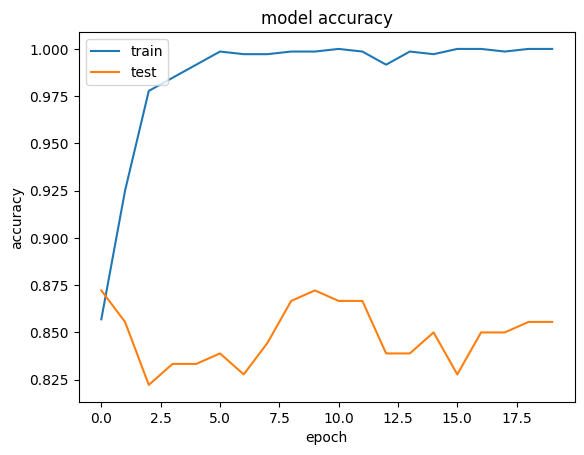

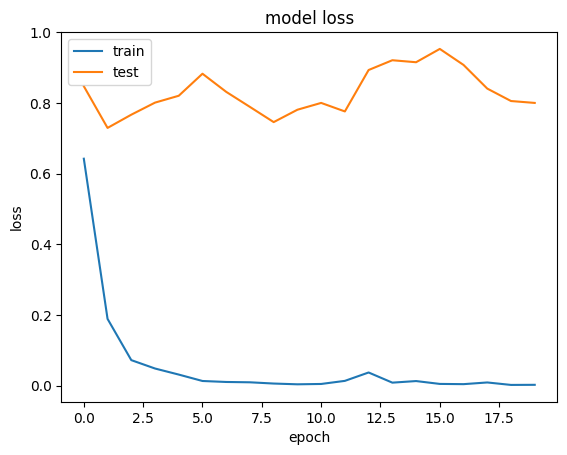

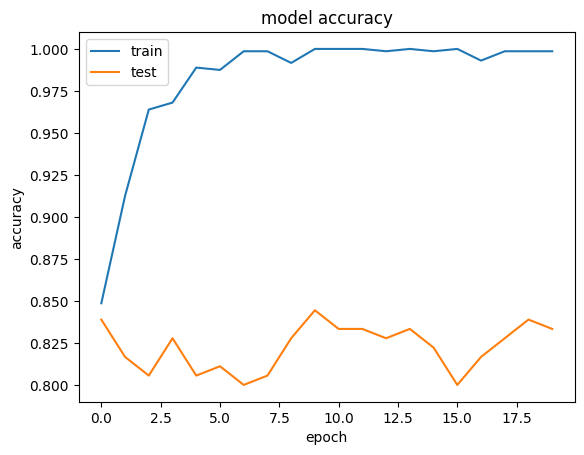

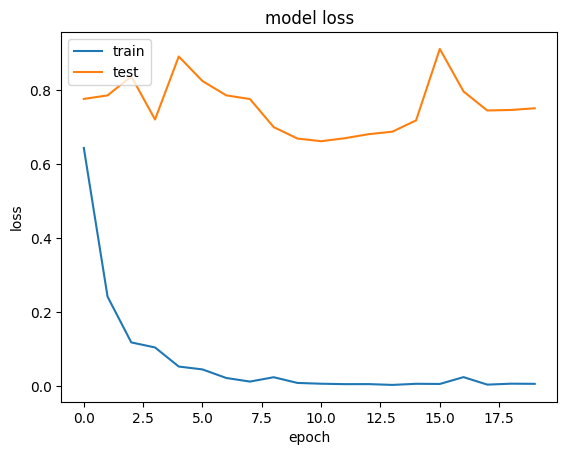

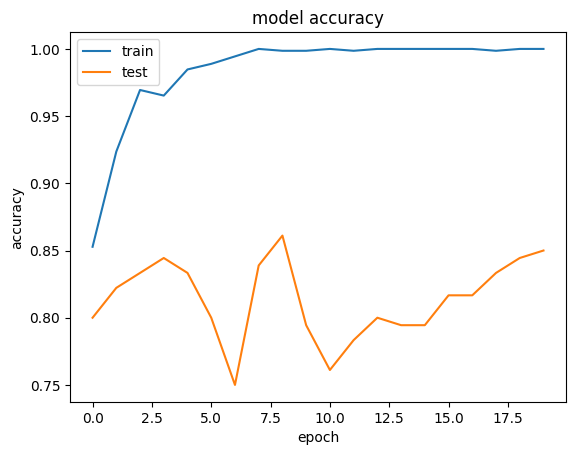

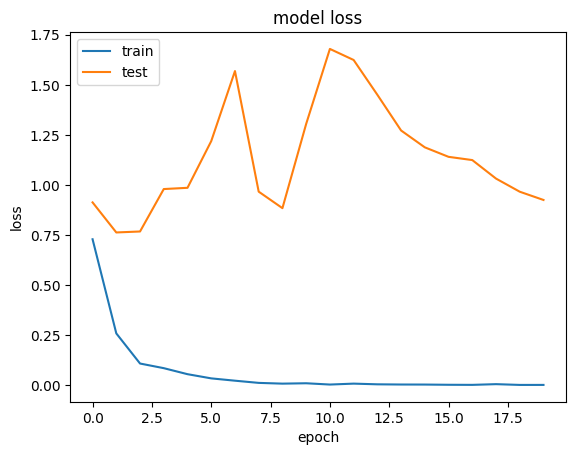

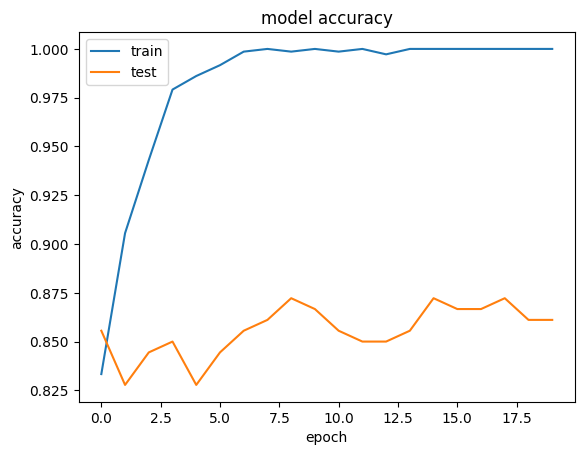

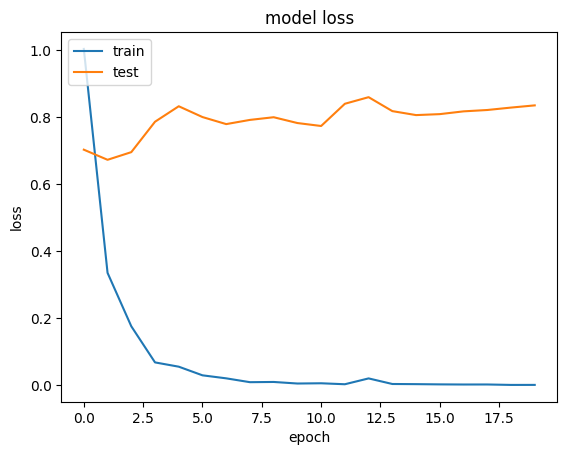

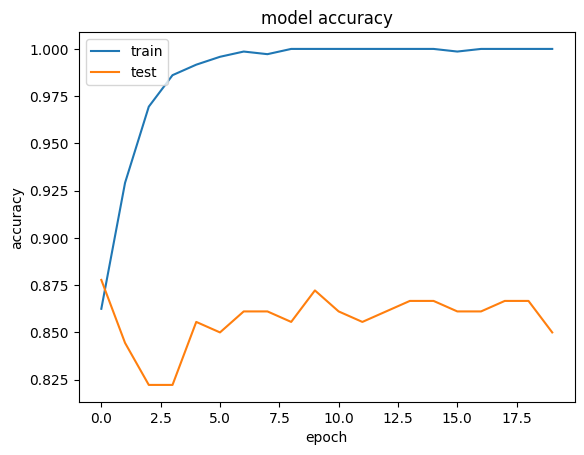

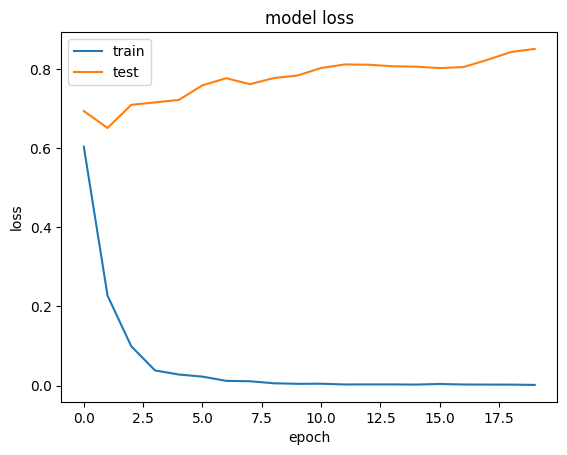

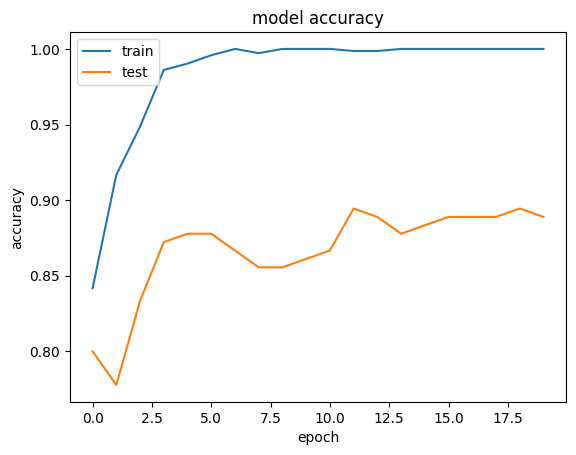

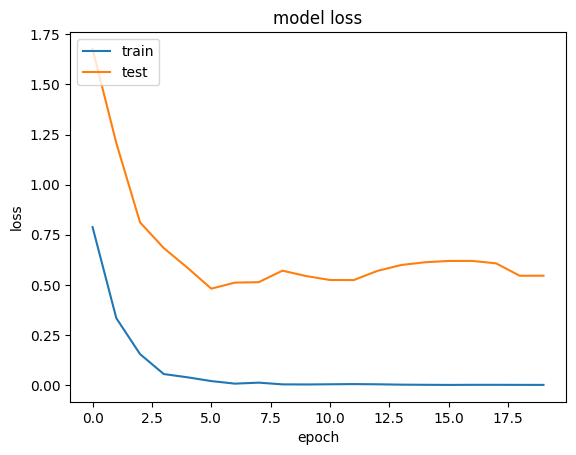

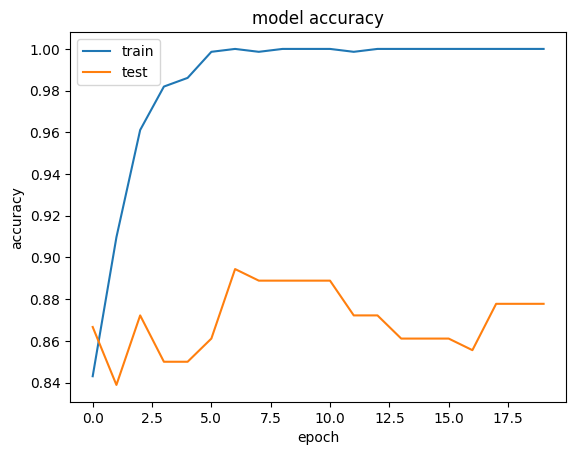

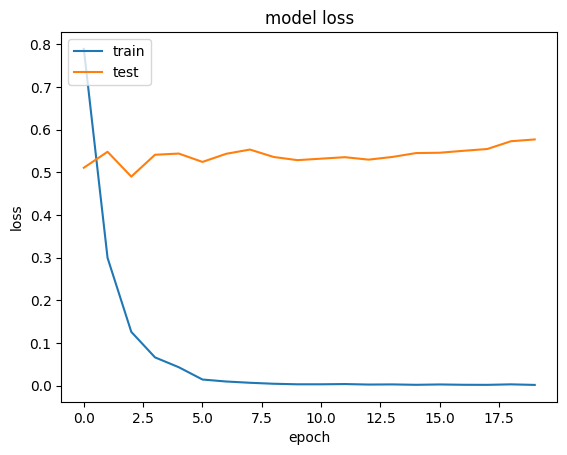

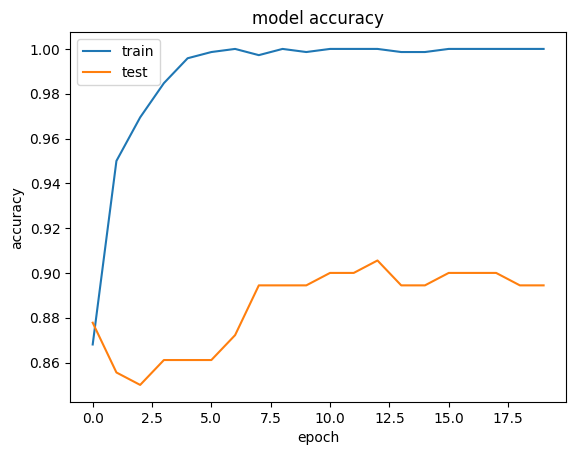

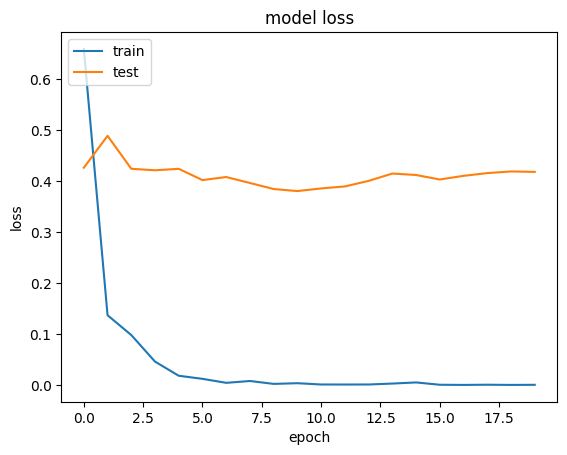

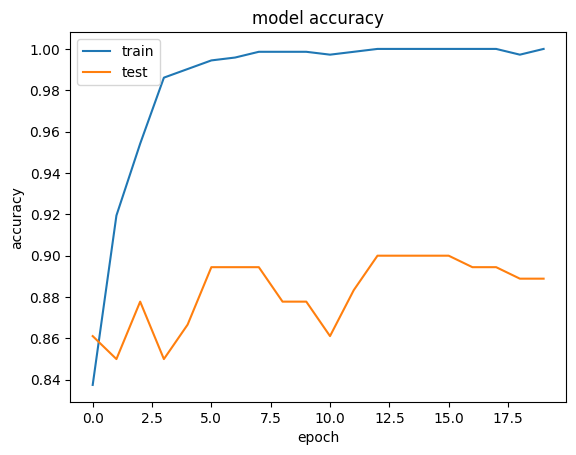

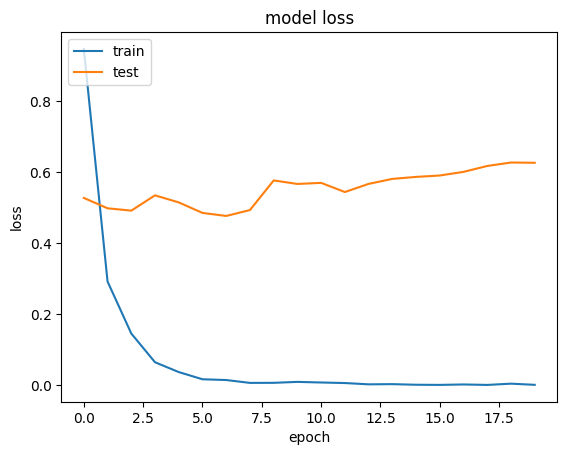

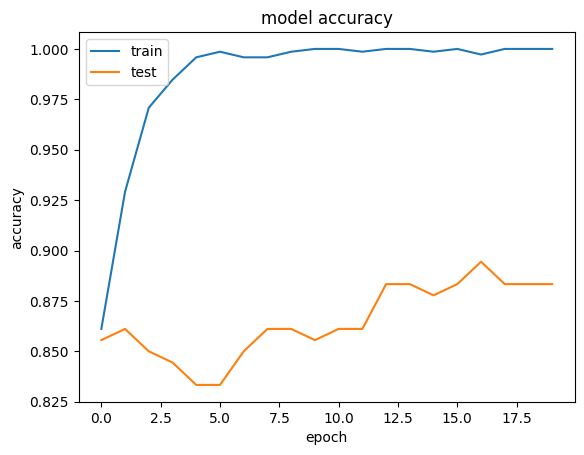

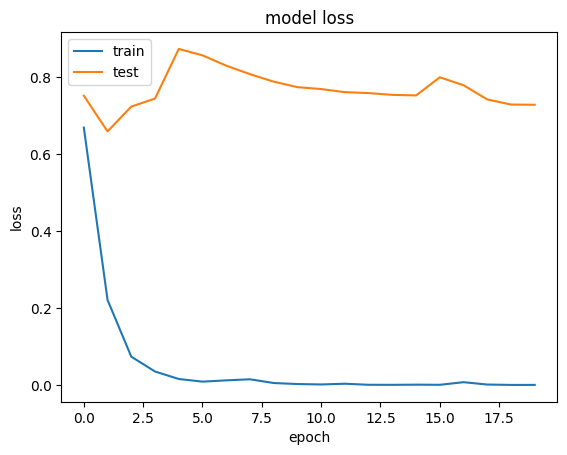

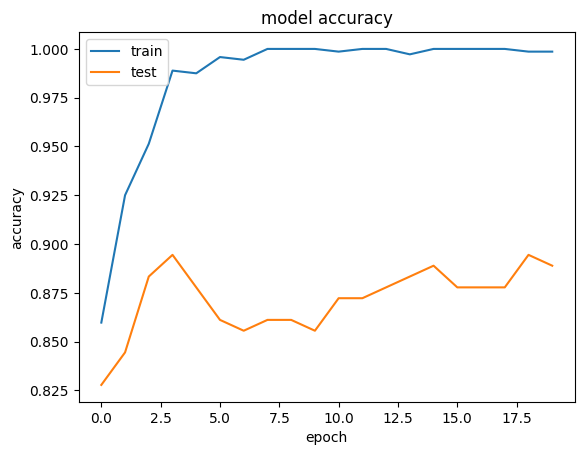

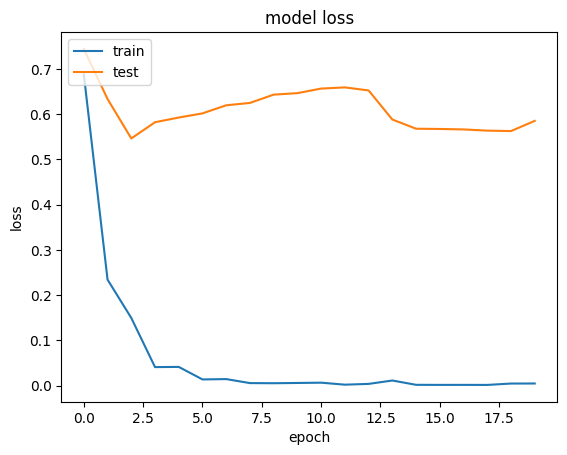

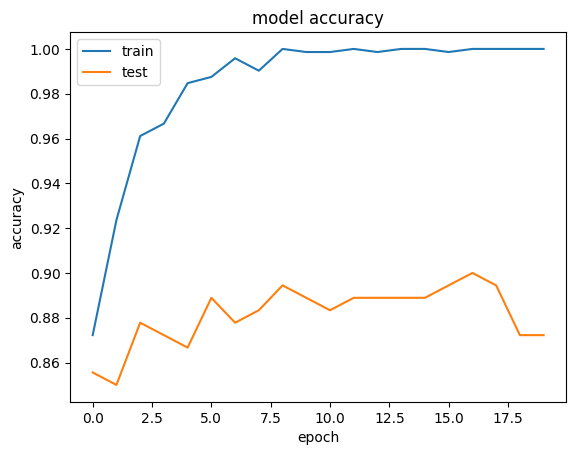

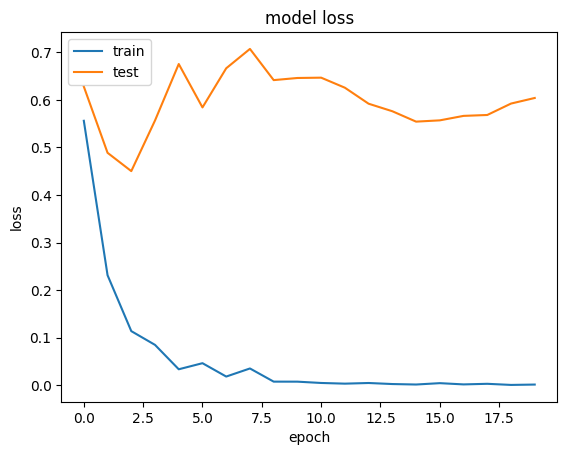

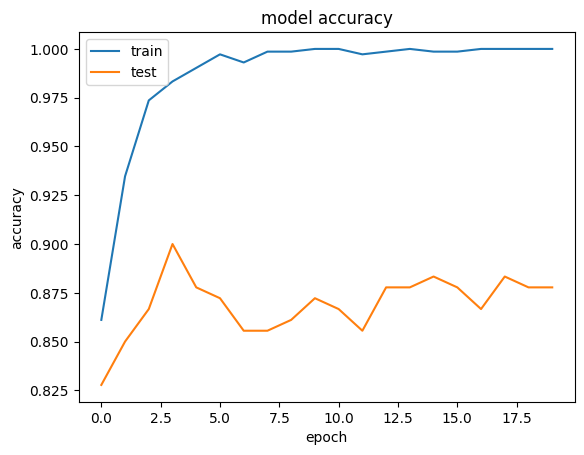

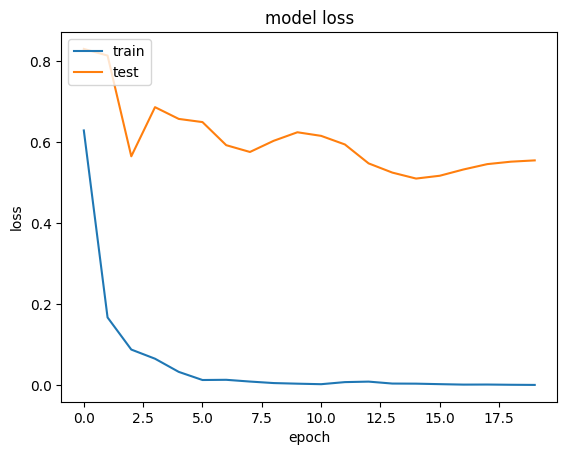

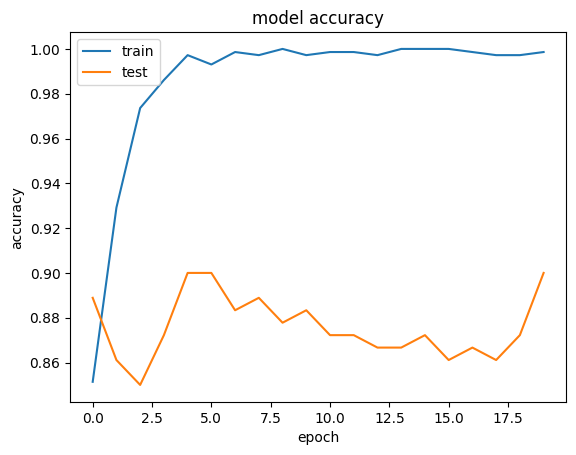

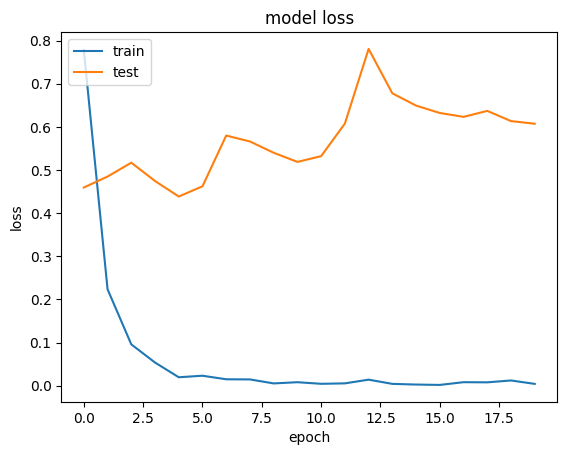

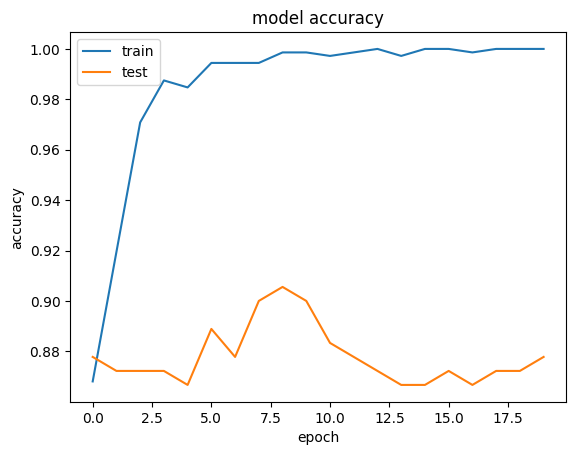

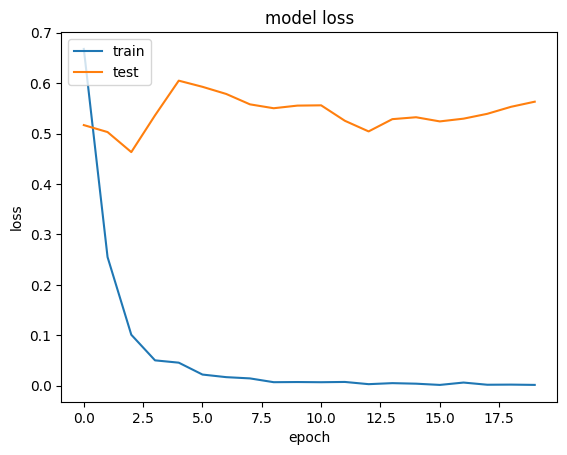

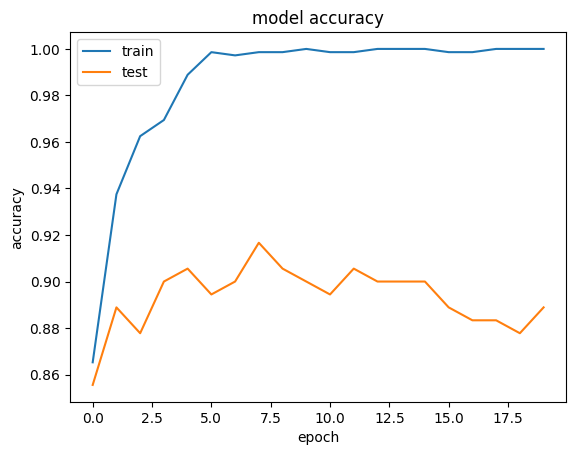

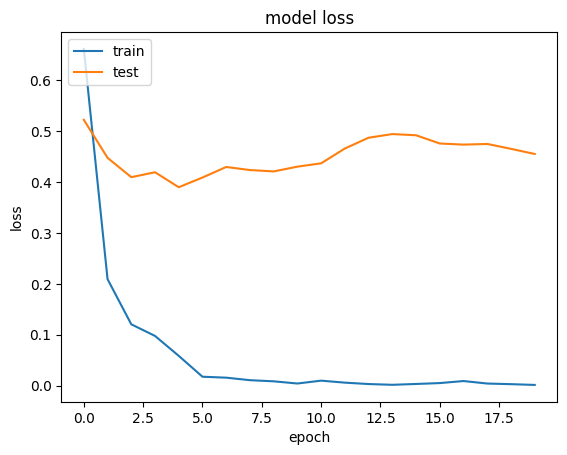

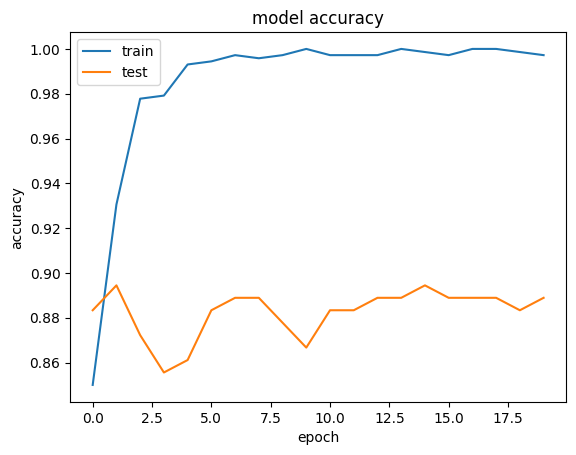

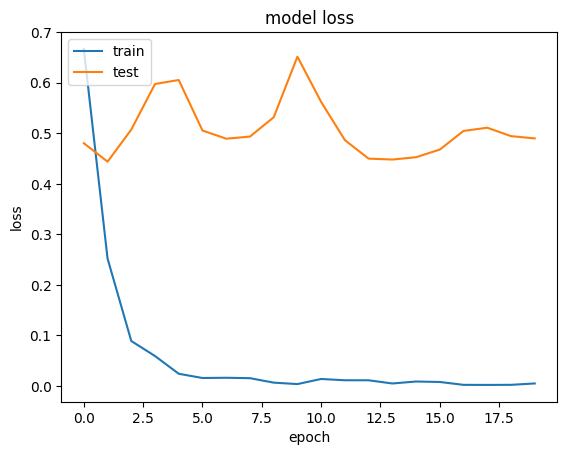

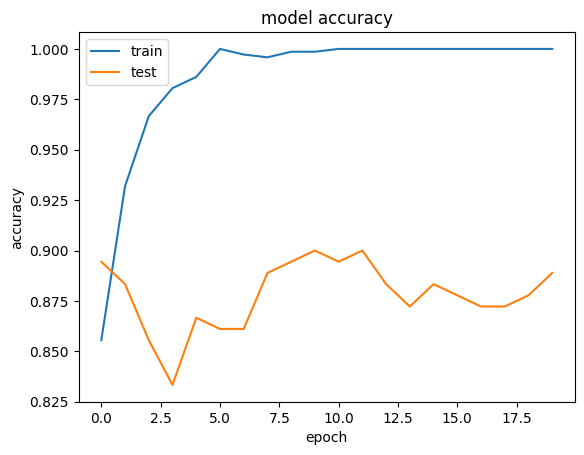

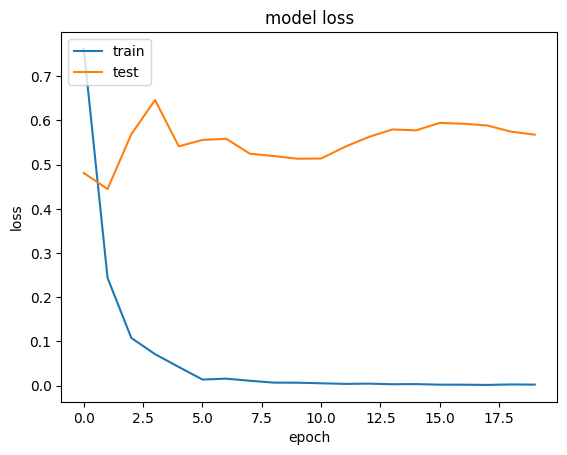

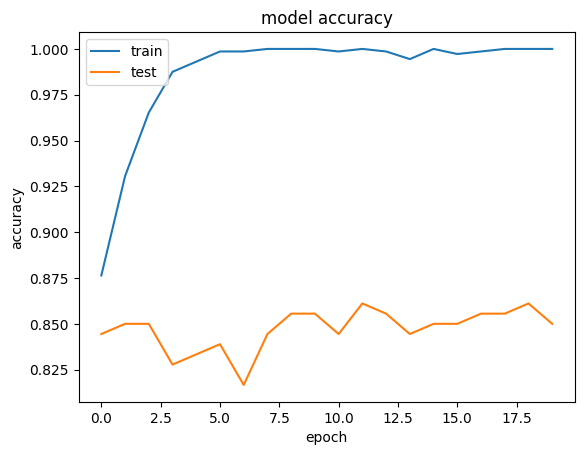

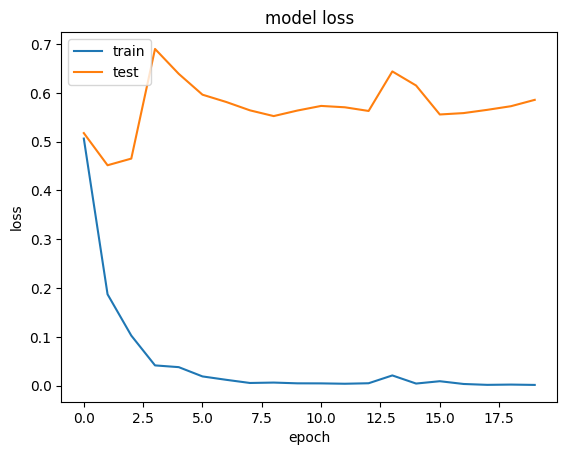

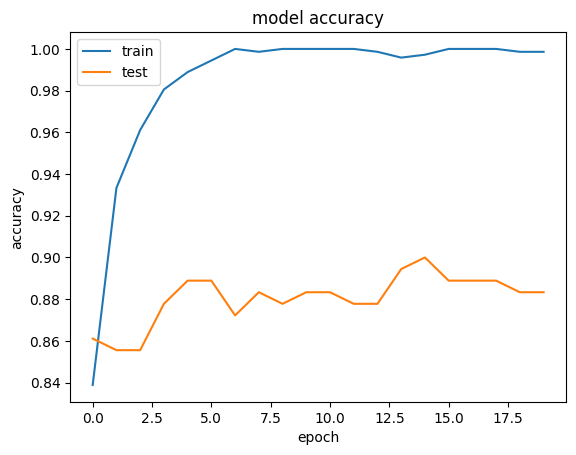

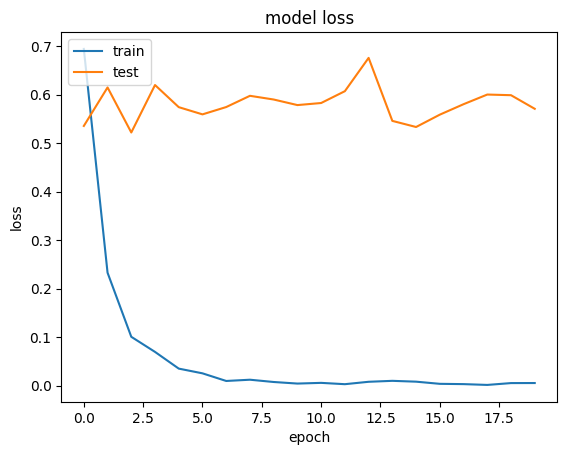

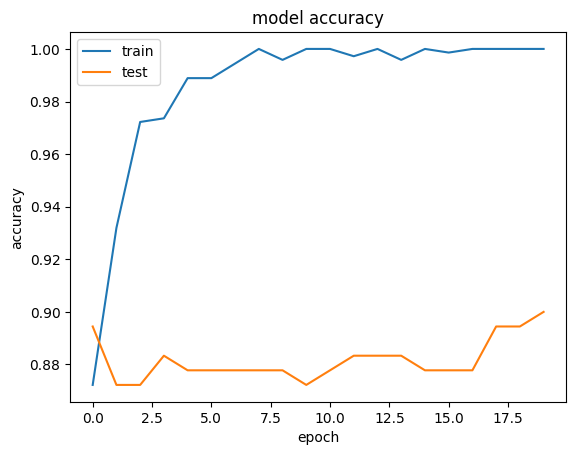

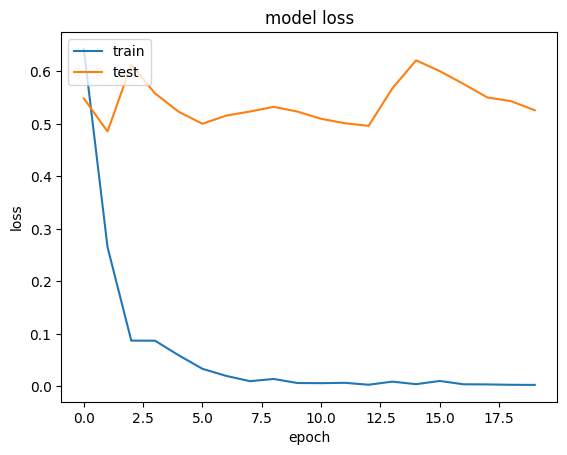

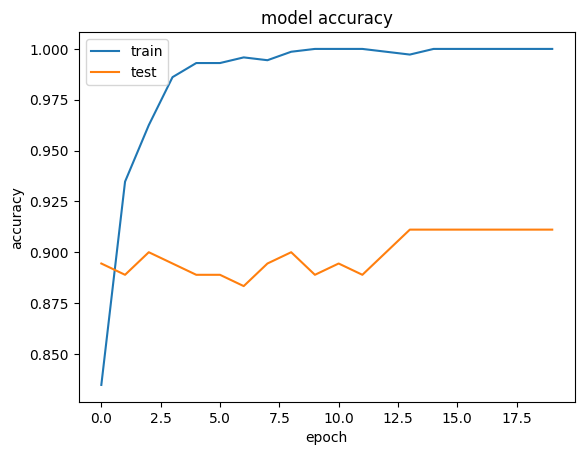

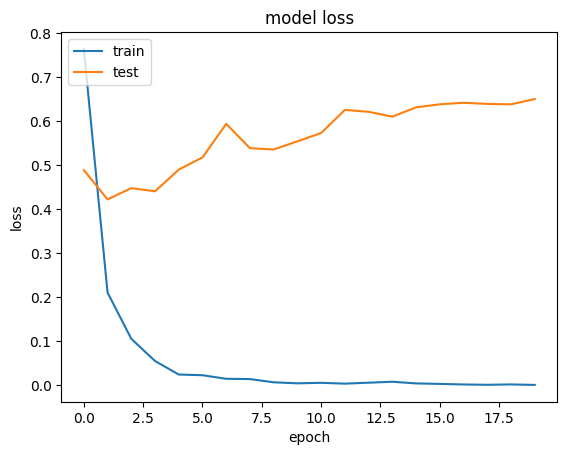

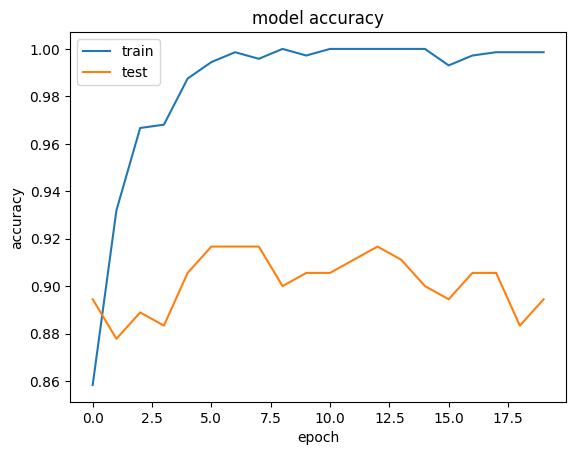

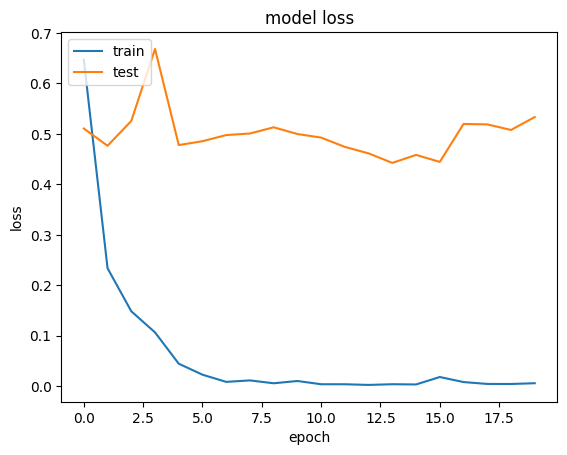

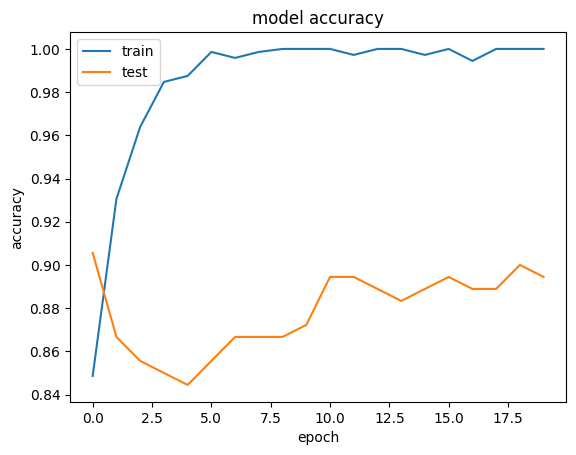

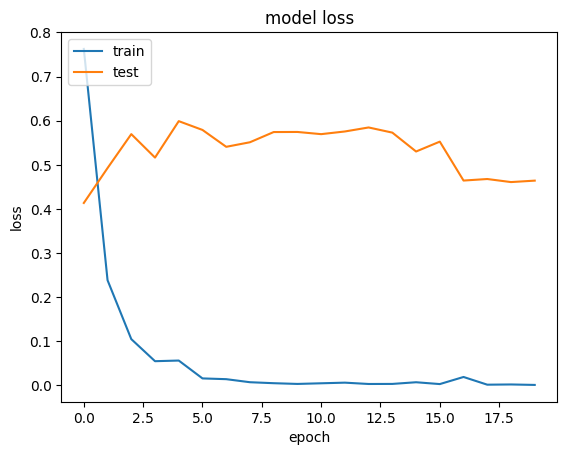

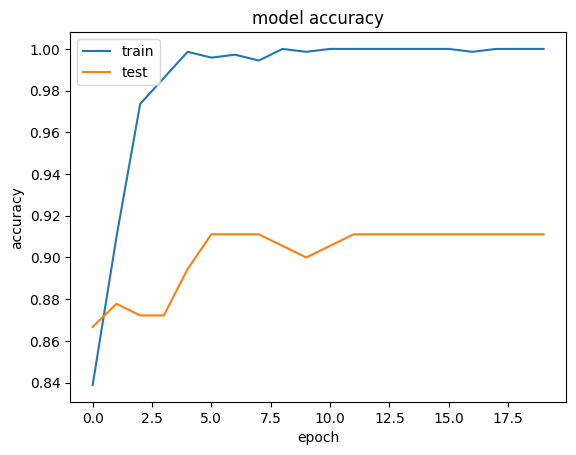

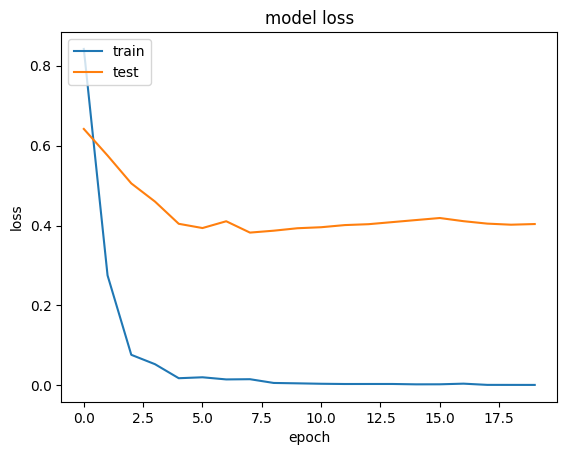

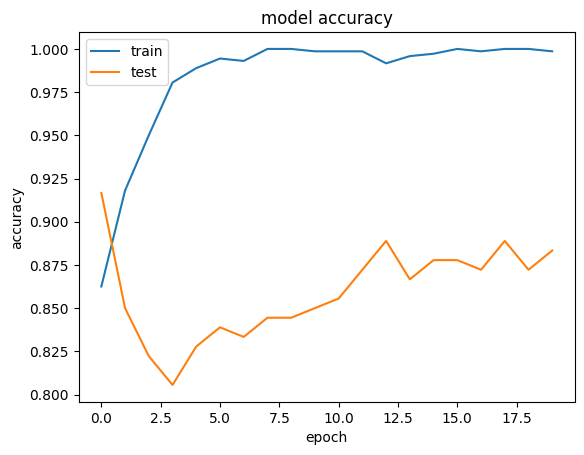

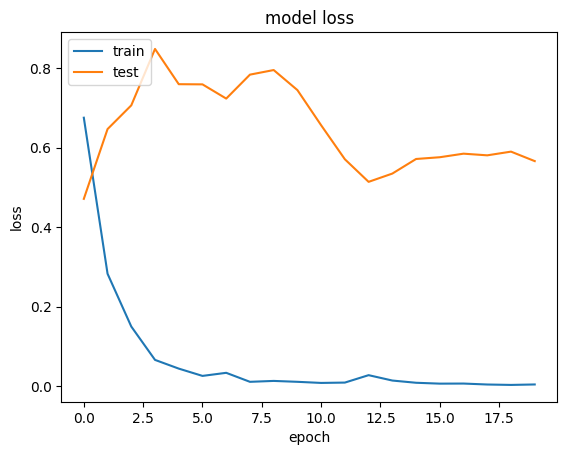

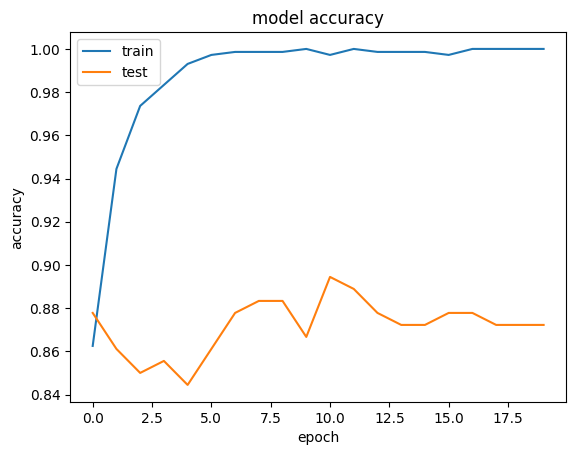

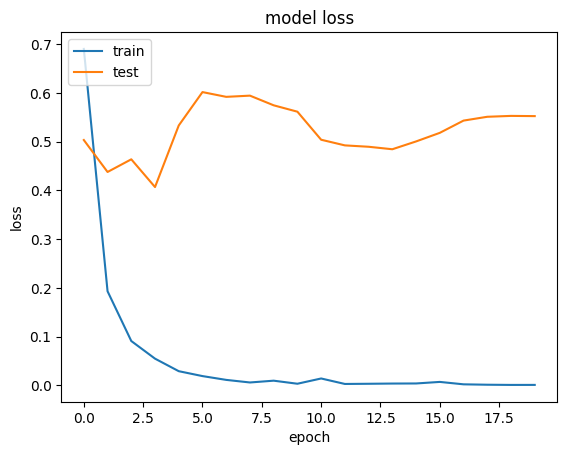

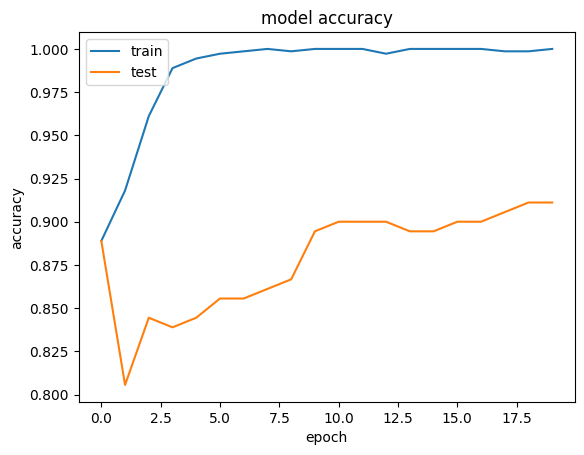

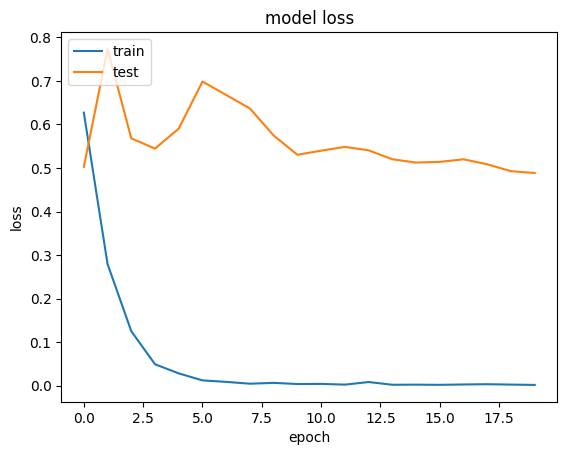

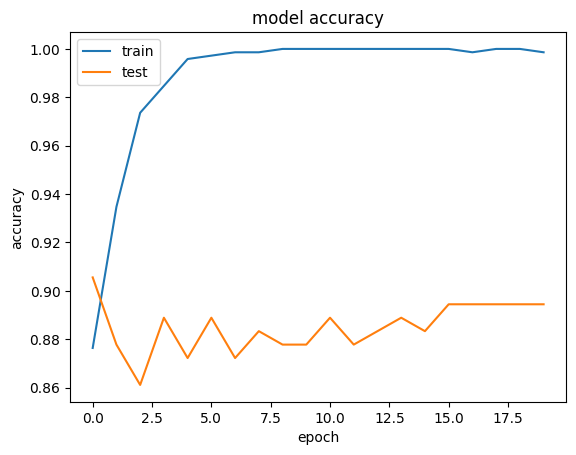

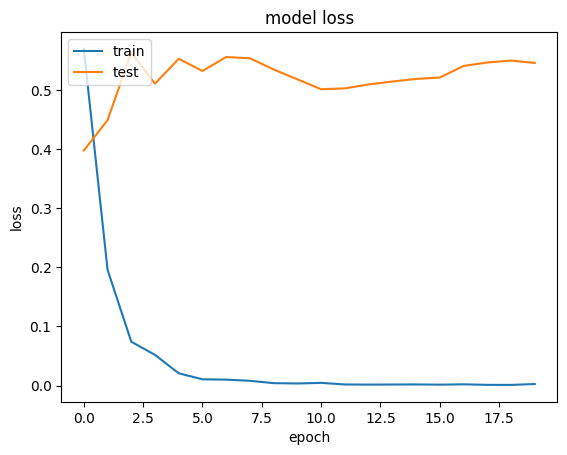

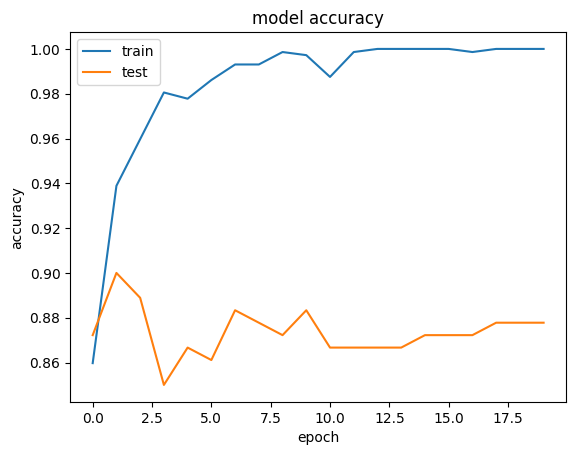

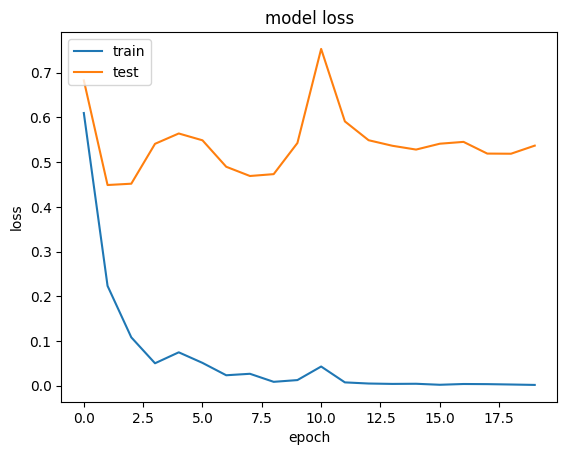

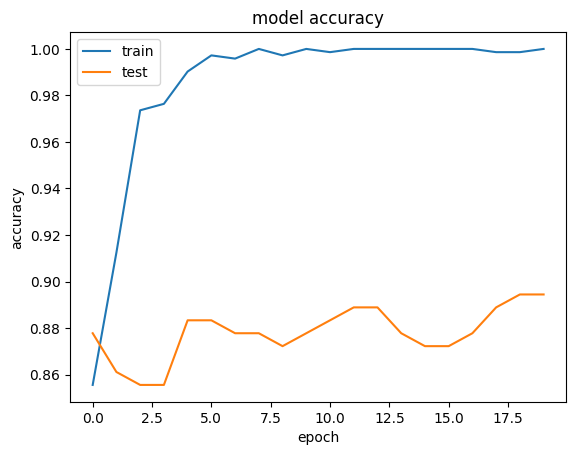

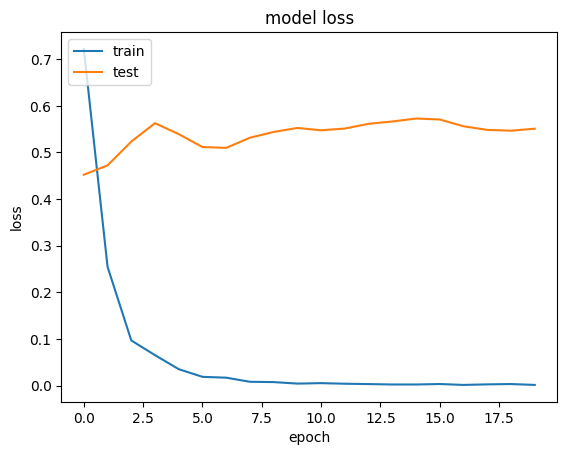

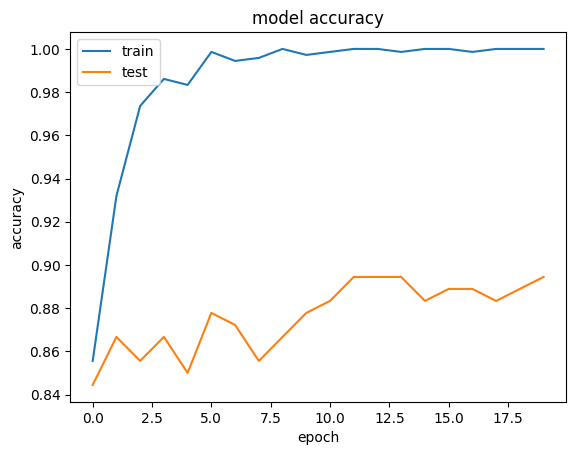

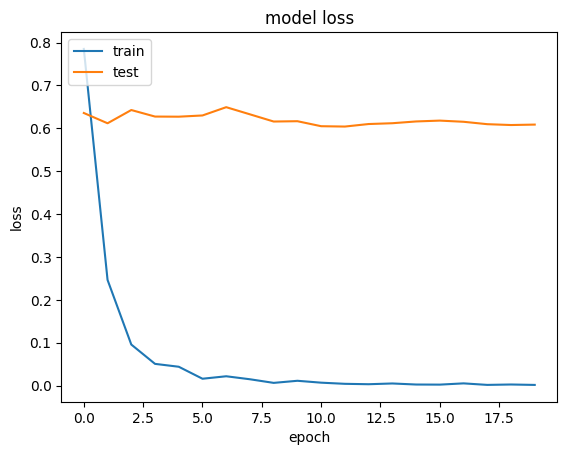

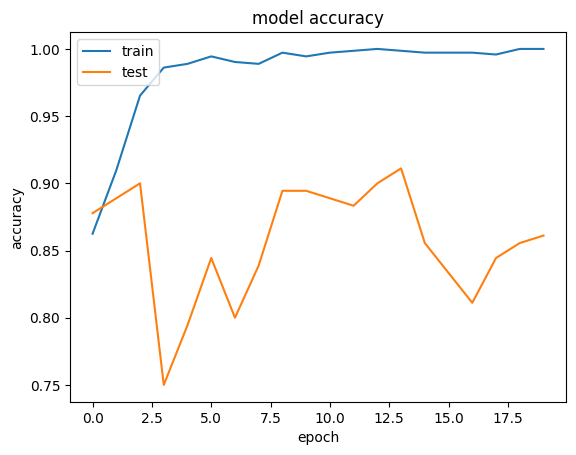

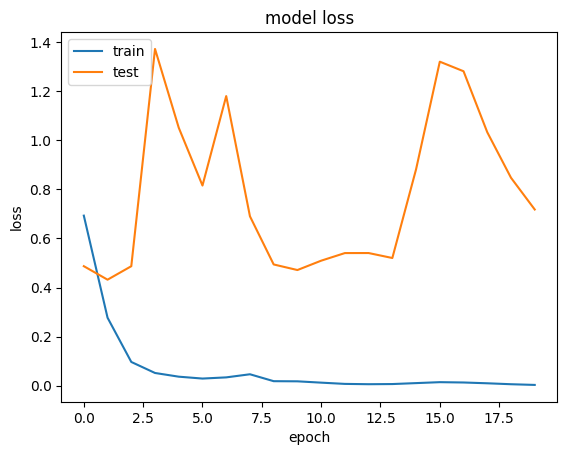

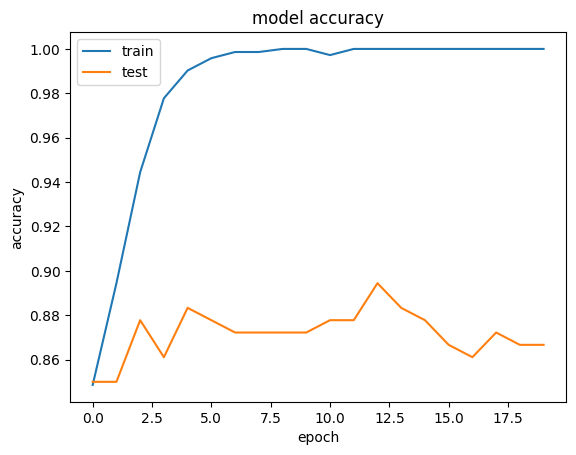

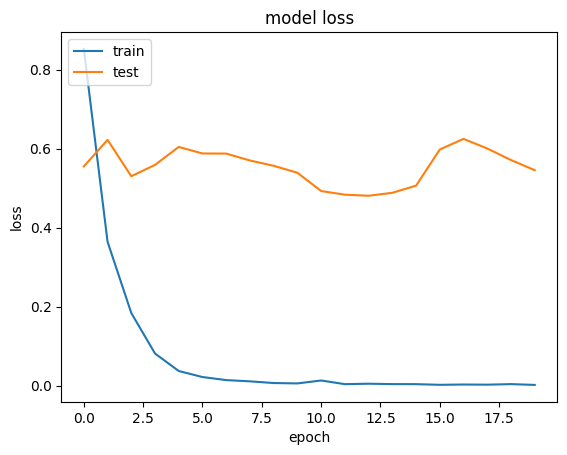

In [45]:
for history in histories:
    # accuracy plot
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # loss plot
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

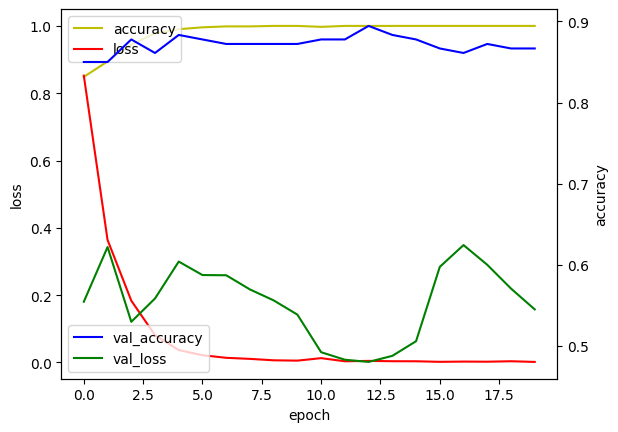

In [46]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(history.history['accuracy'],'y',label='accuracy')
loss_ax.plot(history.history['loss'],'r',label='loss')
acc_ax.plot(history.history['val_accuracy'],'b',label='val_accuracy')
acc_ax.plot(history.history['val_loss'],'g',label='val_loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()


In [47]:
print("accracy      : " + str(history.history['accuracy'][19]))
print("val_accuracy : " + str(history.history['val_accuracy'][19]))
print("loss         : " + str(history.history['loss'][19]))
print("val_loss     : " + str(history.history['val_loss'][19]))

accracy      : 1.0
val_accuracy : 0.8666666746139526
loss         : 0.0015468491474166512
val_loss     : 0.5451626181602478


In [23]:
print("")
print("-- Evaluate --")
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
print("")
print("-- Predict --")
scores = model.predict(x_test)


-- Evaluate --


NameError: name 'x_test' is not defined

In [49]:
model.save_weights("cnnWDI_v3_weight")

In [50]:
model.load_weights("cnnWDI_v3_weight")

In [17]:
from tensorflow import keras

#모델 불러오기
model=keras.models.load_model("cnnWdi_v0.3.h5")

In [18]:
model.load_weights("cnnWDI_v3_weight")

In [ ]:
import pickle

with open(file = 'hist_v3.h5', mode = 'rb') as f :
history = pickle.load(f)

In [22]:
# history
# accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid(True, axis='y', color='red', alpha=0.5, linestyle='--')
plt.show()
# loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True, axis='y', color='red', alpha=0.5, linestyle='--')
plt.show()
print("Wafer 탐지 모델 정확도 : {:5.2f}%".format(100*round(test_acc,2)))

NameError: name 'history' is not defined

In [16]:
import numpy as np
import itertools
import numpy as np
from sklearn.metrics import (confusion_matrix, accuracy_score,
 recall_score, precision_score, f1_score)
import matplotlib.pyplot as plt
# Confusion Matrix 시각화
def plot_confusion_matrix(cm, target_names=None, cmap=None, normalize=True
 accuracy = np.trace(cm) / float(np.sum(cm))
 misclass = 1 - accuracy
 if cmap is None:
 cmap = plt.get_cmap('Blues')
 if normalize:
 cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

 plt.figure(figsize=(8, 6))
 plt.imshow(cm, interpolation='nearest', cmap=cmap)
 plt.title(title)
 plt.colorbar()
 thresh = cm.max() / 1.5 if normalize else cm.max() / 2

 if target_names is not None:
 tick_marks = np.arange(len(target_names))
 plt.xticks(tick_marks, target_names)
 plt.yticks(tick_marks, target_names)

 if labels:
 for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[
 if normalize:
 plt.text(j, i, "{:0.4f}".format(cm[i, j]),
 horizontalalignment="center",
color="white" if cm[i, j] > thresh else "black")
 else:
 plt.text(j, i, "{:,}".format(cm[i, j]),
 horizontalalignment="center",
color="white" if cm[i, j] > thresh else "black")
 plt.tight_layout()
 plt.ylabel('True label')
 plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format
 plt.show()

# Accuracy, Precision, Recall, F-1 Socre 계산
def calculate_cm_metrics(y_pred, y_true):
 # Confusion Matrix 계산
 cm = confusion_matrix(y_true, y_pred) # 매개변수 순서 : y축, x축
 # 클래스별 TP, FN, FP, TN 값 계산
            
 n = cm.shape[0]
 precision = np.zeros(n)
 recall = np.zeros(n)
 f1_score = np.zeros(n)
 for i in range(n):
 tp = tp = cm[i, i]
 fn = cm[i].sum() - tp
 fp = cm[:, i].sum() - tp
 tn = cm.sum() - tp - fn - fp
 precision[i] = tp / (tp + fp)
 recall[i] = tp / (tp + fn)
 f1_score[i] = 2 * precision[i] * recall[i] / (precision[i] + recall
 return accuracy_score(y_pred, y_true), precision, recall, f1_score

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3667470604.py, line 8)